# GNN 

1. Graph Representation
2. Node Embedding
3. Graph Convolution
4. Message Passing
5. Output Generation

In [1]:
!pip install dgl

# Package Installation and Import:

In [ ]:
import networkx as nx
import dgl
import torch
import torch.nn as nn
import dgl.function as fn
import torch.optim as optim
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import networkx as nx
from faker import Faker
from random import sample
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from faker import Faker
from sklearn.model_selection import train_test_split
import numpy as np
import torch
from sklearn.metrics.pairwise import cosine_similarity

I imported the necessary libraries for network analysis and deep learning, including NetworkX for graph manipulation, DGL for graph neural network operations, PyTorch for deep learning, and related modules such as torch.nn and torch.optim for neural network construction and optimization. I also imported utilities for evaluation such as accuracy_score from scikit-learn. Additionally, I imported Faker for generating fake data and numpy for numerical operations. Lastly, I imported cosine_similarity from scikit-learn for computing cosine similarity between vectors. 

Here's a breakdown of each import statement:

1. `import networkx as nx`: This imports the NetworkX library, commonly used for creating, manipulating, and studying complex networks (graphs) in Python.

2. `import dgl`: This imports Deep Graph Library (DGL), a library for deep learning on graphs and graph-structured data.

3. `import torch`: This imports PyTorch, a popular deep learning framework.

4. `import torch.nn as nn`: This imports the neural network module from PyTorch, providing tools for building neural network architectures.

5. `import dgl.function as fn`: This imports functions from the DGL library for graph operations.

6. `import torch.optim as optim`: This imports optimization algorithms from PyTorch for training neural networks.

7. `from sklearn.metrics import accuracy_score`: This imports accuracy_score from scikit-learn, a library for machine learning tasks.

8. `from sklearn.model_selection import train_test_split`: This imports train_test_split from scikit-learn, used for splitting data into training and testing sets.

9. `import matplotlib.pyplot as plt`: This imports the pyplot module from Matplotlib, a plotting library for Python.

10. `from faker import Faker`: This imports the Faker library, which generates fake data for various purposes.

11. `from random import sample`: This imports the sample function from the random module, used for generating random samples from a population.

12. `import torch.nn.functional as F`: This imports the functional interface for PyTorch's neural network operations.

13. `import numpy as np`: This imports the NumPy library, a fundamental package for numerical computing with Python.

14. `from sklearn.metrics.pairwise import cosine_similarity`: This imports the cosine_similarity function from scikit-learn, which computes the cosine similarity between vectors.

# LinkedIn-like Network Creation:

In [3]:
# Create a sample LinkedIn network
G = nx.Graph()

# Add nodes (users) with company and skills information
G.add_nodes_from([
    ('Alice', {'industry': 'Technology', 'company': 'TechCo', 'skills': ['Python', 'Machine Learning']}),
    ('Bob', {'industry': 'Finance', 'company': 'FinTech', 'skills': ['Finance', 'Analytics']}),
    ('Charlie', {'industry': 'Marketing', 'company': 'AdAgency', 'skills': ['Marketing', 'Advertising']}),
    ('David', {'industry': 'Technology', 'company': 'TechCo', 'skills': ['Java', 'Web Development']}),
    ('Eve', {'industry': 'Finance', 'company': 'Banking', 'skills': ['Finance', 'Economics']}),
    ('Frank', {'industry': 'Marketing', 'company': 'AdAgency', 'skills': ['Content Writing', 'Social Media']}),
    ('Grace', {'industry': 'Technology', 'company': 'TechCo', 'skills': ['C++', 'Data Structures']}),
])

# Add edges (connections)
G.add_edges_from([
    ('Alice', 'Bob'),
    ('Alice', 'Charlie'),
    ('Alice', 'David'),
    ('Bob', 'Eve'),
    ('Charlie', 'Frank'),
    ('David', 'Grace'),
])

# Convert the networkx graph to a DGL graph
dgl_G = dgl.DGLGraph(G)

C:\Users\shrig\anaconda3\Lib\site-packages\dgl\heterograph.py:92: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning(


I created a sample LinkedIn network using NetworkX, a library for network analysis. In this network:

- I added nodes representing users, with information about their industry, company, and skills. Each node is a tuple containing the user's name as the first element and a dictionary with 'industry', 'company', and 'skills' as keys, and corresponding information as values.
- I added edges between users to represent connections between them. Each edge represents a relationship between two users.
- After defining the network, I converted it to a DGL (Deep Graph Library) graph, which allows for easier manipulation and analysis of graphs in the context of deep learning.

Here's a breakdown of the steps:

1. Created an empty undirected graph using `nx.Graph()`.
2. Added nodes with user information using `G.add_nodes_from()`, where each node is a tuple containing the user's name and a dictionary with additional information.
3. Added edges between users using `G.add_edges_from()`.
4. Converted the NetworkX graph `G` to a DGL graph `dgl_G` using `dgl.DGLGraph(G)`. This allows us to perform graph neural network operations on the graph.

In [4]:
# Convert DGL graph to NetworkX graph
nx_G = dgl_G.to_networkx()

# Visualize the graph
def visualize_graph(graph):
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(10, 8))
    nx.draw(graph, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray')
    plt.title('LinkedIn-like Graph Visualization')
    plt.show()

I converted the DGL graph `dgl_G` back to a NetworkX graph `nx_G` using the `to_networkx()` method provided by DGL. Then, I defined a function `visualize_graph(graph)` to visualize the graph using Matplotlib and NetworkX.

Here's a summary:

1. Converted the DGL graph `dgl_G` to a NetworkX graph `nx_G` using `dgl_G.to_networkx()`.
2. Defined a visualization function `visualize_graph(graph)` that takes a graph object as input.
3. In the visualization function, computed the layout of the graph using `nx.spring_layout()` for a visually appealing arrangement.
4. Plotted the graph using `nx.draw()` with options for labeling nodes, setting node and edge colors, and adjusting node sizes.
5. Displayed the plot using `plt.show()`.

This function will allow us to visualize the LinkedIn-like graph constructed earlier.

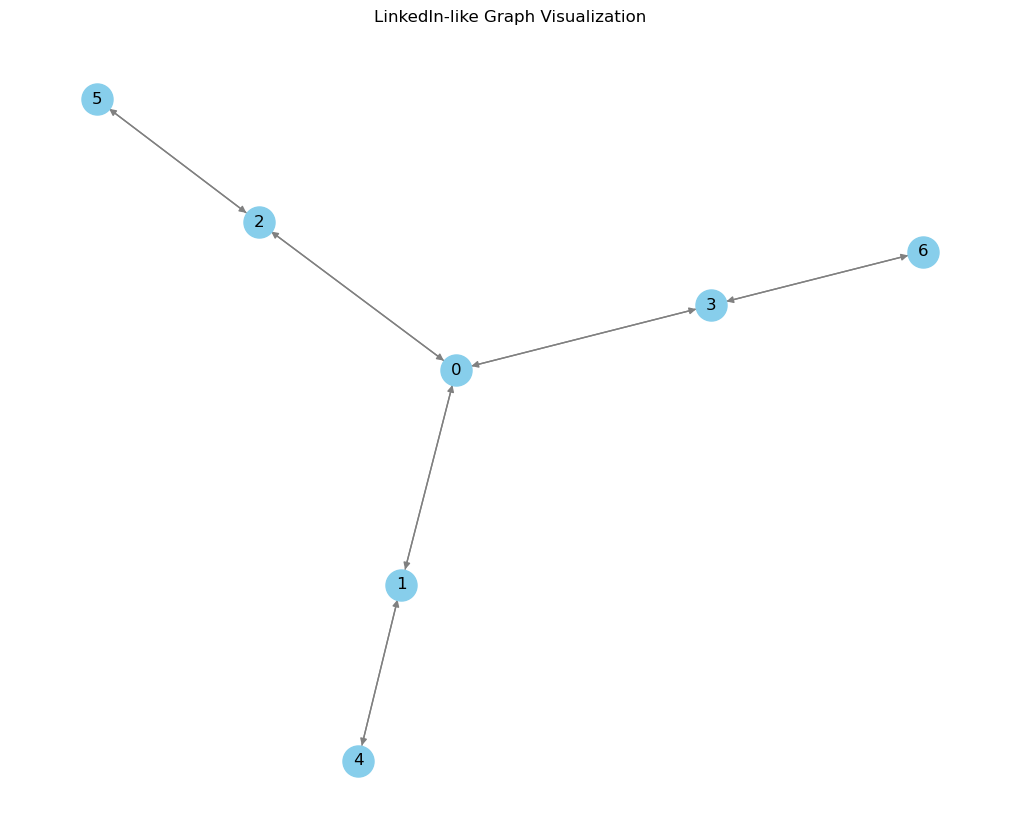

In [5]:
# Display basic graph statistics
def graph_statistics(graph):
    print("Graph Statistics:")
    print(f"Number of nodes: {graph.number_of_nodes()}")
    print(f"Number of edges: {graph.number_of_edges()}")
    print(f"Density: {nx.density(graph)}")

# Visualize the graph
visualize_graph(nx_G)

I defined a function `graph_statistics(graph)` to display basic statistics of the input graph. Then, I called the `visualize_graph()` function to visualize the LinkedIn-like graph created earlier using NetworkX.

Here's what's happening:

1. The `graph_statistics(graph)` function takes a graph object `graph` as input and prints basic statistics of the graph:
   - The number of nodes using `graph.number_of_nodes()`.
   - The number of edges using `graph.number_of_edges()`.
   - The density of the graph using `nx.density(graph)`, which is a measure of how connected the graph is.
   
2. After defining the `graph_statistics()` function, I called the `visualize_graph(nx_G)` function to visualize the LinkedIn-like graph `nx_G` created earlier.

This allows us to both visualize the graph and obtain basic statistics about its structure.

In [6]:
# Display basic statistics
graph_statistics(nx_G)

Graph Statistics:
Number of nodes: 7
Number of edges: 12
Density: 0.2857142857142857


# Graph Convolutional Network (GCN) for Link Prediction:

In [7]:
# Define a Graph Convolutional Network (GCN) for link prediction
class GCN(nn.Module):
    def __init__(self, in_feats, hidden_size, num_classes):
        super(GCN, self).__init__()
        self.conv1 = dgl.nn.pytorch.GraphConv(in_feats, hidden_size)
        self.conv2 = dgl.nn.pytorch.GraphConv(hidden_size, num_classes)
    
    def message_func(self, edges):
        # The message function sends the features of source nodes.
        return {'msg': edges.src['h']}
    
    def reduce_func(self, nodes):
        # The reduce function aggregates the messages by summing them up.
        return {'h': torch.sum(nodes.mailbox['msg'], dim=1)}
    
    def forward(self, graph, inputs):
        h = self.conv1(graph, inputs)
        h = torch.relu(h)
        graph.ndata['h'] = h  # Initialize node features
        graph.update_all(message_func=self.message_func, reduce_func=self.reduce_func)
        h = graph.ndata.pop('h')  # Get updated node features after message passing
        h = self.conv2(graph, h)
        return h

# Feature representation for each node (e.g., industry, company, skills)
features = torch.tensor([
    [1, 0, 0, 1, 0, 0, 0],  # Alice (Technology)
    [0, 1, 0, 0, 1, 0, 0],  # Bob (Finance)
    [0, 0, 1, 0, 0, 1, 0],  # Charlie (Marketing)
    [1, 0, 0, 1, 0, 0, 0],  # David (Technology)
    [0, 1, 0, 0, 0, 0, 1],  # Eve (Finance)
    [0, 0, 1, 0, 0, 1, 0],  # Frank (Marketing)
    [1, 0, 0, 1, 0, 0, 0],  # Grace (Technology)
], dtype=torch.float32)

# Prepare positive and negative edges for link prediction
positive_edges = [(0, 1), (0, 2), (0, 3)]
negative_edges = [(1, 3), (2, 5), (4, 6)]  # Assume these are negative samples

# Label positive edges as 1 and negative edges as 0
labels = torch.tensor([1, 1, 1, 0, 0, 0], dtype=torch.float32)

# Split dataset into train and test sets
train_pos, test_pos, train_neg, test_neg = train_test_split(positive_edges, negative_edges, test_size=0.2)

# Combine positive and negative edges for train and test sets
train_edges = train_pos + train_neg
test_edges = test_pos + test_neg
train_labels = torch.cat([torch.ones(len(train_pos)), torch.zeros(len(train_neg))], dim=0)
test_labels = torch.cat([torch.ones(len(test_pos)), torch.zeros(len(test_neg))], dim=0)

# Train-validation split
train_edges, val_edges, train_labels, val_labels = train_test_split(train_edges, train_labels, test_size=0.1)

# Construct a GCN model
model = GCN(in_feats=7, hidden_size=16, num_classes=1)

I defined a Graph Convolutional Network (GCN) for link prediction. Here's what I did and why:

1. **Definition of GCN class**: I defined a class named `GCN` inheriting from `nn.Module`. This class represents the architecture of the GCN model.

2. **Initialization**: In the constructor (`__init__`), I defined two graph convolutional layers (`conv1` and `conv2`). The first layer takes input features of size `in_feats` and outputs features of size `hidden_size`. The second layer takes the hidden features from the first layer and outputs features of size `num_classes`.

3. **Message and reduce functions**: I defined `message_func` and `reduce_func` methods to specify how messages are passed and aggregated during message passing in the graph convolutional layers.

4. **Forward pass**: The `forward` method defines the forward pass of the GCN model. It takes a graph (`graph`) and node features (`inputs`) as inputs. It applies the first convolutional layer followed by a ReLU activation function. Then, it updates node features by passing messages and aggregating them using the defined functions. Finally, it applies the second convolutional layer and returns the output features.

5. **Feature representation**: I defined feature representations for each node based on their attributes such as industry, company, and skills. These features are represented as a tensor `features`.

6. **Positive and negative edges**: I defined positive and negative edges for link prediction. Positive edges represent existing connections, while negative edges represent non-existent connections.

7. **Labels**: I assigned labels to positive edges as 1 and negative edges as 0.

8. **Train-test split**: I split the dataset into training and testing sets for evaluation.

9. **Validation split**: I further split the training dataset into training and validation sets for model tuning.

10. **Model instantiation**: I instantiated the GCN model with specified input feature size, hidden layer size, and number of classes.

This setup prepares the GCN model for training and evaluation on the provided LinkedIn-like network data.

In [8]:
# Training function
def train(model, graph, features, train_edges, train_labels, val_edges, val_labels, epochs=100000, lr=0.01):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.BCEWithLogitsLoss()
    
    for epoch in range(epochs):
        model.train()
        logits = model(graph, features)
        if isinstance(logits, list):  # Check if logits is a list
            logits = torch.cat(logits, dim=0)  # Convert list of tensors to a single tensor
        pos_pred = logits[[edge[0] for edge in train_edges]]
        neg_pred = logits[[edge[1] for edge in train_edges]]  # Extract embeddings for destination nodes of edges
        pred = torch.sigmoid(pos_pred - neg_pred).squeeze()  # Calculate predictions for the edges
        loss = criterion(pred, train_labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Validation
        model.eval()
        with torch.no_grad():
            val_logits = model(graph, features)
            if isinstance(val_logits, list):  # Check if val_logits is a list
                val_logits = torch.cat(val_logits, dim=0)  # Convert list of tensors to a single tensor
            val_pos_pred = val_logits[[edge[0] for edge in val_edges]]
            val_neg_pred = val_logits[[edge[1] for edge in val_edges]]
            val_pred = torch.sigmoid(val_pos_pred - val_neg_pred).squeeze()
            val_pred = val_pred.view(-1)  # Reshape val_pred to match the shape of val_labels
            val_loss = criterion(val_pred, val_labels)
            print(f'Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

# Train the model
train(model, dgl_G, features, train_edges, train_labels, val_edges, val_labels)

Epoch 1/100000, Train Loss: 0.7781, Val Loss: 0.4490
Epoch 2/100000, Train Loss: 0.7699, Val Loss: 0.4432
Epoch 3/100000, Train Loss: 0.7621, Val Loss: 0.4369
Epoch 4/100000, Train Loss: 0.7548, Val Loss: 0.4309
Epoch 5/100000, Train Loss: 0.7483, Val Loss: 0.4252
Epoch 6/100000, Train Loss: 0.7419, Val Loss: 0.4201
Epoch 7/100000, Train Loss: 0.7360, Val Loss: 0.4153
Epoch 8/100000, Train Loss: 0.7302, Val Loss: 0.4115
Epoch 9/100000, Train Loss: 0.7247, Val Loss: 0.4089
Epoch 10/100000, Train Loss: 0.7195, Val Loss: 0.4072
Epoch 11/100000, Train Loss: 0.7146, Val Loss: 0.4063
Epoch 12/100000, Train Loss: 0.7098, Val Loss: 0.4055
Epoch 13/100000, Train Loss: 0.7049, Val Loss: 0.4049
Epoch 14/100000, Train Loss: 0.7000, Val Loss: 0.4042
Epoch 15/100000, Train Loss: 0.6952, Val Loss: 0.4037
Epoch 16/100000, Train Loss: 0.6903, Val Loss: 0.4033
Epoch 17/100000, Train Loss: 0.6855, Val Loss: 0.4027
Epoch 18/100000, Train Loss: 0.6806, Val Loss: 0.4022
Epoch 19/100000, Train Loss: 0.6758, 

Epoch 156/100000, Train Loss: 0.5678, Val Loss: 0.3397
Epoch 157/100000, Train Loss: 0.5678, Val Loss: 0.3397
Epoch 158/100000, Train Loss: 0.5678, Val Loss: 0.3396
Epoch 159/100000, Train Loss: 0.5678, Val Loss: 0.3394
Epoch 160/100000, Train Loss: 0.5678, Val Loss: 0.3393
Epoch 161/100000, Train Loss: 0.5677, Val Loss: 0.3391
Epoch 162/100000, Train Loss: 0.5677, Val Loss: 0.3390
Epoch 163/100000, Train Loss: 0.5677, Val Loss: 0.3389
Epoch 164/100000, Train Loss: 0.5677, Val Loss: 0.3388
Epoch 165/100000, Train Loss: 0.5677, Val Loss: 0.3387
Epoch 166/100000, Train Loss: 0.5677, Val Loss: 0.3386
Epoch 167/100000, Train Loss: 0.5677, Val Loss: 0.3385
Epoch 168/100000, Train Loss: 0.5676, Val Loss: 0.3384
Epoch 169/100000, Train Loss: 0.5676, Val Loss: 0.3383
Epoch 170/100000, Train Loss: 0.5676, Val Loss: 0.3382
Epoch 171/100000, Train Loss: 0.5676, Val Loss: 0.3380
Epoch 172/100000, Train Loss: 0.5676, Val Loss: 0.3379
Epoch 173/100000, Train Loss: 0.5676, Val Loss: 0.3378
Epoch 174/

Epoch 305/100000, Train Loss: 0.5669, Val Loss: 0.3297
Epoch 306/100000, Train Loss: 0.5669, Val Loss: 0.3296
Epoch 307/100000, Train Loss: 0.5669, Val Loss: 0.3296
Epoch 308/100000, Train Loss: 0.5669, Val Loss: 0.3296
Epoch 309/100000, Train Loss: 0.5669, Val Loss: 0.3295
Epoch 310/100000, Train Loss: 0.5669, Val Loss: 0.3295
Epoch 311/100000, Train Loss: 0.5669, Val Loss: 0.3294
Epoch 312/100000, Train Loss: 0.5669, Val Loss: 0.3294
Epoch 313/100000, Train Loss: 0.5669, Val Loss: 0.3294
Epoch 314/100000, Train Loss: 0.5669, Val Loss: 0.3293
Epoch 315/100000, Train Loss: 0.5669, Val Loss: 0.3293
Epoch 316/100000, Train Loss: 0.5669, Val Loss: 0.3293
Epoch 317/100000, Train Loss: 0.5669, Val Loss: 0.3292
Epoch 318/100000, Train Loss: 0.5669, Val Loss: 0.3292
Epoch 319/100000, Train Loss: 0.5669, Val Loss: 0.3292
Epoch 320/100000, Train Loss: 0.5669, Val Loss: 0.3291
Epoch 321/100000, Train Loss: 0.5669, Val Loss: 0.3291
Epoch 322/100000, Train Loss: 0.5669, Val Loss: 0.3290
Epoch 323/

Epoch 460/100000, Train Loss: 0.5667, Val Loss: 0.3256
Epoch 461/100000, Train Loss: 0.5667, Val Loss: 0.3256
Epoch 462/100000, Train Loss: 0.5667, Val Loss: 0.3256
Epoch 463/100000, Train Loss: 0.5667, Val Loss: 0.3255
Epoch 464/100000, Train Loss: 0.5667, Val Loss: 0.3255
Epoch 465/100000, Train Loss: 0.5667, Val Loss: 0.3255
Epoch 466/100000, Train Loss: 0.5667, Val Loss: 0.3255
Epoch 467/100000, Train Loss: 0.5667, Val Loss: 0.3255
Epoch 468/100000, Train Loss: 0.5667, Val Loss: 0.3254
Epoch 469/100000, Train Loss: 0.5667, Val Loss: 0.3254
Epoch 470/100000, Train Loss: 0.5667, Val Loss: 0.3254
Epoch 471/100000, Train Loss: 0.5667, Val Loss: 0.3254
Epoch 472/100000, Train Loss: 0.5667, Val Loss: 0.3254
Epoch 473/100000, Train Loss: 0.5667, Val Loss: 0.3254
Epoch 474/100000, Train Loss: 0.5667, Val Loss: 0.3253
Epoch 475/100000, Train Loss: 0.5667, Val Loss: 0.3253
Epoch 476/100000, Train Loss: 0.5667, Val Loss: 0.3253
Epoch 477/100000, Train Loss: 0.5667, Val Loss: 0.3253
Epoch 478/

Epoch 609/100000, Train Loss: 0.5666, Val Loss: 0.3234
Epoch 610/100000, Train Loss: 0.5666, Val Loss: 0.3234
Epoch 611/100000, Train Loss: 0.5666, Val Loss: 0.3234
Epoch 612/100000, Train Loss: 0.5666, Val Loss: 0.3234
Epoch 613/100000, Train Loss: 0.5666, Val Loss: 0.3234
Epoch 614/100000, Train Loss: 0.5666, Val Loss: 0.3234
Epoch 615/100000, Train Loss: 0.5666, Val Loss: 0.3233
Epoch 616/100000, Train Loss: 0.5666, Val Loss: 0.3233
Epoch 617/100000, Train Loss: 0.5666, Val Loss: 0.3233
Epoch 618/100000, Train Loss: 0.5666, Val Loss: 0.3233
Epoch 619/100000, Train Loss: 0.5666, Val Loss: 0.3233
Epoch 620/100000, Train Loss: 0.5666, Val Loss: 0.3233
Epoch 621/100000, Train Loss: 0.5666, Val Loss: 0.3233
Epoch 622/100000, Train Loss: 0.5666, Val Loss: 0.3233
Epoch 623/100000, Train Loss: 0.5666, Val Loss: 0.3233
Epoch 624/100000, Train Loss: 0.5666, Val Loss: 0.3232
Epoch 625/100000, Train Loss: 0.5666, Val Loss: 0.3232
Epoch 626/100000, Train Loss: 0.5666, Val Loss: 0.3232
Epoch 627/

Epoch 758/100000, Train Loss: 0.5666, Val Loss: 0.3220
Epoch 759/100000, Train Loss: 0.5666, Val Loss: 0.3220
Epoch 760/100000, Train Loss: 0.5666, Val Loss: 0.3220
Epoch 761/100000, Train Loss: 0.5666, Val Loss: 0.3220
Epoch 762/100000, Train Loss: 0.5666, Val Loss: 0.3220
Epoch 763/100000, Train Loss: 0.5666, Val Loss: 0.3220
Epoch 764/100000, Train Loss: 0.5666, Val Loss: 0.3220
Epoch 765/100000, Train Loss: 0.5666, Val Loss: 0.3219
Epoch 766/100000, Train Loss: 0.5666, Val Loss: 0.3219
Epoch 767/100000, Train Loss: 0.5666, Val Loss: 0.3219
Epoch 768/100000, Train Loss: 0.5666, Val Loss: 0.3219
Epoch 769/100000, Train Loss: 0.5666, Val Loss: 0.3219
Epoch 770/100000, Train Loss: 0.5666, Val Loss: 0.3219
Epoch 771/100000, Train Loss: 0.5666, Val Loss: 0.3219
Epoch 772/100000, Train Loss: 0.5666, Val Loss: 0.3219
Epoch 773/100000, Train Loss: 0.5666, Val Loss: 0.3219
Epoch 774/100000, Train Loss: 0.5666, Val Loss: 0.3219
Epoch 775/100000, Train Loss: 0.5666, Val Loss: 0.3219
Epoch 776/

Epoch 909/100000, Train Loss: 0.5666, Val Loss: 0.3210
Epoch 910/100000, Train Loss: 0.5666, Val Loss: 0.3210
Epoch 911/100000, Train Loss: 0.5666, Val Loss: 0.3210
Epoch 912/100000, Train Loss: 0.5666, Val Loss: 0.3210
Epoch 913/100000, Train Loss: 0.5666, Val Loss: 0.3210
Epoch 914/100000, Train Loss: 0.5666, Val Loss: 0.3210
Epoch 915/100000, Train Loss: 0.5666, Val Loss: 0.3209
Epoch 916/100000, Train Loss: 0.5666, Val Loss: 0.3209
Epoch 917/100000, Train Loss: 0.5666, Val Loss: 0.3209
Epoch 918/100000, Train Loss: 0.5666, Val Loss: 0.3209
Epoch 919/100000, Train Loss: 0.5666, Val Loss: 0.3209
Epoch 920/100000, Train Loss: 0.5666, Val Loss: 0.3209
Epoch 921/100000, Train Loss: 0.5666, Val Loss: 0.3209
Epoch 922/100000, Train Loss: 0.5666, Val Loss: 0.3209
Epoch 923/100000, Train Loss: 0.5666, Val Loss: 0.3209
Epoch 924/100000, Train Loss: 0.5666, Val Loss: 0.3209
Epoch 925/100000, Train Loss: 0.5666, Val Loss: 0.3209
Epoch 926/100000, Train Loss: 0.5666, Val Loss: 0.3209
Epoch 927/

Epoch 1062/100000, Train Loss: 0.5666, Val Loss: 0.3202
Epoch 1063/100000, Train Loss: 0.5666, Val Loss: 0.3202
Epoch 1064/100000, Train Loss: 0.5666, Val Loss: 0.3202
Epoch 1065/100000, Train Loss: 0.5666, Val Loss: 0.3202
Epoch 1066/100000, Train Loss: 0.5666, Val Loss: 0.3202
Epoch 1067/100000, Train Loss: 0.5666, Val Loss: 0.3202
Epoch 1068/100000, Train Loss: 0.5666, Val Loss: 0.3202
Epoch 1069/100000, Train Loss: 0.5666, Val Loss: 0.3202
Epoch 1070/100000, Train Loss: 0.5666, Val Loss: 0.3202
Epoch 1071/100000, Train Loss: 0.5666, Val Loss: 0.3202
Epoch 1072/100000, Train Loss: 0.5666, Val Loss: 0.3202
Epoch 1073/100000, Train Loss: 0.5666, Val Loss: 0.3202
Epoch 1074/100000, Train Loss: 0.5666, Val Loss: 0.3202
Epoch 1075/100000, Train Loss: 0.5666, Val Loss: 0.3201
Epoch 1076/100000, Train Loss: 0.5666, Val Loss: 0.3201
Epoch 1077/100000, Train Loss: 0.5666, Val Loss: 0.3201
Epoch 1078/100000, Train Loss: 0.5666, Val Loss: 0.3201
Epoch 1079/100000, Train Loss: 0.5666, Val Loss:

Epoch 1210/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 1211/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 1212/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 1213/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 1214/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 1215/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 1216/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 1217/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 1218/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 1219/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 1220/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 1221/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 1222/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 1223/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 1224/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 1225/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 1226/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 1227/100000, Train Loss: 0.5665, Val Loss:

Epoch 1359/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 1360/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 1361/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 1362/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 1363/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 1364/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 1365/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 1366/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 1367/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 1368/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 1369/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 1370/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 1371/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 1372/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 1373/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 1374/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 1375/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 1376/100000, Train Loss: 0.5665, Val Loss:

Epoch 1510/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 1511/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 1512/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 1513/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 1514/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 1515/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 1516/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 1517/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 1518/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 1519/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 1520/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 1521/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 1522/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 1523/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 1524/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 1525/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 1526/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 1527/100000, Train Loss: 0.5665, Val Loss:

Epoch 1658/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 1659/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 1660/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 1661/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 1662/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 1663/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 1664/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 1665/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 1666/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 1667/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 1668/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 1669/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 1670/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 1671/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 1672/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 1673/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 1674/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 1675/100000, Train Loss: 0.5665, Val Loss:

Epoch 1807/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 1808/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 1809/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 1810/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 1811/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 1812/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 1813/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 1814/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 1815/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 1816/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 1817/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 1818/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 1819/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 1820/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 1821/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 1822/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 1823/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 1824/100000, Train Loss: 0.5665, Val Loss:

Epoch 1960/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 1961/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 1962/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 1963/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 1964/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 1965/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 1966/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 1967/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 1968/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 1969/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 1970/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 1971/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 1972/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 1973/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 1974/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 1975/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 1976/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 1977/100000, Train Loss: 0.5665, Val Loss:

Epoch 2107/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 2108/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 2109/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 2110/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 2111/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 2112/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 2113/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 2114/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 2115/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 2116/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 2117/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 2118/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 2119/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 2120/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 2121/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 2122/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 2123/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 2124/100000, Train Loss: 0.5665, Val Loss:

Epoch 2260/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 2261/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 2262/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 2263/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 2264/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 2265/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 2266/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 2267/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 2268/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 2269/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 2270/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 2271/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 2272/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 2273/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 2274/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 2275/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 2276/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 2277/100000, Train Loss: 0.5665, Val Loss:

Epoch 2407/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 2408/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 2409/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 2410/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 2411/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 2412/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 2413/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 2414/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 2415/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 2416/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 2417/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 2418/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 2419/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 2420/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 2421/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 2422/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 2423/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 2424/100000, Train Loss: 0.5665, Val Loss:

Epoch 2559/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 2560/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 2561/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 2562/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 2563/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 2564/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 2565/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 2566/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 2567/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 2568/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 2569/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 2570/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 2571/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 2572/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 2573/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 2574/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 2575/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 2576/100000, Train Loss: 0.5665, Val Loss:

Epoch 2710/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 2711/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 2712/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 2713/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 2714/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 2715/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 2716/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 2717/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 2718/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 2719/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 2720/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 2721/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 2722/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 2723/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 2724/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 2725/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 2726/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 2727/100000, Train Loss: 0.5665, Val Loss:

Epoch 2860/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 2861/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 2862/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 2863/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 2864/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 2865/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 2866/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 2867/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 2868/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 2869/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 2870/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 2871/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 2872/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 2873/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 2874/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 2875/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 2876/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 2877/100000, Train Loss: 0.5665, Val Loss:

Epoch 3008/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 3009/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 3010/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 3011/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 3012/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 3013/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 3014/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 3015/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 3016/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 3017/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 3018/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 3019/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 3020/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 3021/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 3022/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 3023/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 3024/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 3025/100000, Train Loss: 0.5665, Val Loss:

Epoch 3162/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 3163/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 3164/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 3165/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 3166/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 3167/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 3168/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 3169/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 3170/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 3171/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 3172/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 3173/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 3174/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 3175/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 3176/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 3177/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 3178/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 3179/100000, Train Loss: 0.5665, Val Loss:

Epoch 3309/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 3310/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 3311/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 3312/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 3313/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 3314/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 3315/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 3316/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 3317/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 3318/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 3319/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 3320/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 3321/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 3322/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 3323/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 3324/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 3325/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 3326/100000, Train Loss: 0.5665, Val Loss:

Epoch 3463/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 3464/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 3465/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 3466/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 3467/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 3468/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 3469/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 3470/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 3471/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 3472/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 3473/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 3474/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 3475/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 3476/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 3477/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 3478/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 3479/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 3480/100000, Train Loss: 0.5665, Val Loss:

Epoch 3616/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 3617/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 3618/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 3619/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 3620/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 3621/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 3622/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 3623/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 3624/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 3625/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 3626/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 3627/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 3628/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 3629/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 3630/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 3631/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 3632/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 3633/100000, Train Loss: 0.5665, Val Loss:

Epoch 3765/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 3766/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 3767/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 3768/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 3769/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 3770/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 3771/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 3772/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 3773/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 3774/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 3775/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 3776/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 3777/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 3778/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 3779/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 3780/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 3781/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 3782/100000, Train Loss: 0.5665, Val Loss:

Epoch 3912/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 3913/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 3914/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 3915/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 3916/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 3917/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 3918/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 3919/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 3920/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 3921/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 3922/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 3923/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 3924/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 3925/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 3926/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 3927/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 3928/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 3929/100000, Train Loss: 0.5665, Val Loss:

Epoch 4061/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4062/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4063/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4064/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4065/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4066/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4067/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4068/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4069/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4070/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4071/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4072/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4073/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4074/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4075/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4076/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4077/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4078/100000, Train Loss: 0.5665, Val Loss:

Epoch 4213/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4214/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4215/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4216/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4217/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4218/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4219/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4220/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4221/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4222/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4223/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4224/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4225/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4226/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4227/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4228/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4229/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 4230/100000, Train Loss: 0.5665, Val Loss:

Epoch 4363/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 4364/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 4365/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 4366/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 4367/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 4368/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 4369/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 4370/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 4371/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 4372/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 4373/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 4374/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 4375/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 4376/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 4377/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 4378/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 4379/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 4380/100000, Train Loss: 0.5665, Val Loss:

Epoch 4514/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4515/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4516/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4517/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4518/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4519/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4520/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4521/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4522/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4523/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4524/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4525/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4526/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4527/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4528/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4529/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4530/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4531/100000, Train Loss: 0.5665, Val Loss:

Epoch 4666/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4667/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4668/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4669/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4670/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4671/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4672/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4673/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4674/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4675/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4676/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4677/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4678/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4679/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4680/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4681/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4682/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 4683/100000, Train Loss: 0.5665, Val Loss:

Epoch 4818/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 4819/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 4820/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 4821/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 4822/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 4823/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 4824/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 4825/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 4826/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 4827/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 4828/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 4829/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 4830/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 4831/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 4832/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 4833/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 4834/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 4835/100000, Train Loss: 0.5665, Val Loss:

Epoch 4970/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 4971/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 4972/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 4973/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 4974/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 4975/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 4976/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 4977/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 4978/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 4979/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 4980/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 4981/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 4982/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 4983/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 4984/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 4985/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 4986/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 4987/100000, Train Loss: 0.5665, Val Loss:

Epoch 5125/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 5126/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 5127/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 5128/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 5129/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 5130/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 5131/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 5132/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 5133/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 5134/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 5135/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 5136/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 5137/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 5138/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 5139/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 5140/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 5141/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 5142/100000, Train Loss: 0.5665, Val Loss:

Epoch 5274/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5275/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5276/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5277/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5278/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5279/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5280/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5281/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5282/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5283/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5284/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5285/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5286/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5287/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5288/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5289/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5290/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5291/100000, Train Loss: 0.5665, Val Loss:

Epoch 5426/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5427/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5428/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5429/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5430/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5431/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5432/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5433/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5434/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5435/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5436/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5437/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5438/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5439/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5440/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5441/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5442/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 5443/100000, Train Loss: 0.5665, Val Loss:

Epoch 5573/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5574/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5575/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5576/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5577/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5578/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5579/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5580/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5581/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5582/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5583/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5584/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5585/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5586/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5587/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5588/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5589/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5590/100000, Train Loss: 0.5665, Val Loss:

Epoch 5725/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5726/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5727/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5728/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5729/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5730/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5731/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5732/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5733/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5734/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5735/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5736/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5737/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5738/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5739/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5740/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5741/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 5742/100000, Train Loss: 0.5665, Val Loss:

Epoch 5874/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 5875/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 5876/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 5877/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 5878/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 5879/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 5880/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 5881/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 5882/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 5883/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 5884/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 5885/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 5886/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 5887/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 5888/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 5889/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 5890/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 5891/100000, Train Loss: 0.5665, Val Loss:

Epoch 6024/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 6025/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 6026/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 6027/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 6028/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 6029/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 6030/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 6031/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 6032/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 6033/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 6034/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 6035/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 6036/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 6037/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 6038/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 6039/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 6040/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 6041/100000, Train Loss: 0.5665, Val Loss:

Epoch 6179/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6180/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6181/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6182/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6183/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6184/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6185/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6186/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6187/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6188/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6189/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6190/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6191/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6192/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6193/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6194/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6195/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6196/100000, Train Loss: 0.5665, Val Loss:

Epoch 6332/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6333/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6334/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6335/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6336/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6337/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6338/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6339/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6340/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6341/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6342/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6343/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6344/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6345/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6346/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6347/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6348/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6349/100000, Train Loss: 0.5665, Val Loss:

Epoch 6480/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6481/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6482/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6483/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6484/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6485/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6486/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6487/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6488/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6489/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6490/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6491/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6492/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6493/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6494/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6495/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6496/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 6497/100000, Train Loss: 0.5665, Val Loss:

Epoch 6627/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6628/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6629/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6630/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6631/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6632/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6633/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6634/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6635/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6636/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6637/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6638/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6639/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6640/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6641/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6642/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6643/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6644/100000, Train Loss: 0.5665, Val Loss:

Epoch 6774/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6775/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6776/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6777/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6778/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6779/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6780/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6781/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6782/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6783/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6784/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6785/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6786/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6787/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6788/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6789/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6790/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6791/100000, Train Loss: 0.5665, Val Loss:

Epoch 6928/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6929/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6930/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6931/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6932/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6933/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6934/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6935/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6936/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6937/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6938/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6939/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6940/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6941/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6942/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6943/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6944/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 6945/100000, Train Loss: 0.5665, Val Loss:

Epoch 7077/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7078/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7079/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7080/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7081/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7082/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7083/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7084/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7085/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7086/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7087/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7088/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7089/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7090/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7091/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7092/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7093/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7094/100000, Train Loss: 0.5665, Val Loss:

Epoch 7228/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7229/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7230/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7231/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7232/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7233/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7234/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7235/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7236/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7237/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7238/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7239/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7240/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7241/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7242/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7243/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7244/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7245/100000, Train Loss: 0.5665, Val Loss:

Epoch 7381/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7382/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7383/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7384/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7385/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7386/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7387/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7388/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7389/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7390/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7391/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7392/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7393/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 7394/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7395/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7396/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7397/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7398/100000, Train Loss: 0.5665, Val Loss:

Epoch 7533/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7534/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7535/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7536/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7537/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7538/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7539/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7540/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7541/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7542/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7543/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7544/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7545/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7546/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7547/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7548/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7549/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7550/100000, Train Loss: 0.5665, Val Loss:

Epoch 7682/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7683/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7684/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7685/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7686/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7687/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7688/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7689/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7690/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7691/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7692/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7693/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7694/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7695/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7696/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7697/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7698/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7699/100000, Train Loss: 0.5665, Val Loss:

Epoch 7837/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7838/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7839/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7840/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7841/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7842/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7843/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7844/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7845/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7846/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7847/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7848/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7849/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7850/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7851/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7852/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7853/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 7854/100000, Train Loss: 0.5665, Val Loss:

Epoch 7990/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 7991/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 7992/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 7993/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 7994/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 7995/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 7996/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 7997/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 7998/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 7999/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8000/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8001/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8002/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8003/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8004/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8005/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8006/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8007/100000, Train Loss: 0.5665, Val Loss:

Epoch 8137/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8138/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8139/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8140/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8141/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8142/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8143/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8144/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8145/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8146/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8147/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8148/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8149/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8150/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8151/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8152/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8153/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8154/100000, Train Loss: 0.5665, Val Loss:

Epoch 8287/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8288/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8289/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8290/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8291/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8292/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8293/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8294/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8295/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8296/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8297/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8298/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8299/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8300/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8301/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8302/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8303/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8304/100000, Train Loss: 0.5665, Val Loss:

Epoch 8436/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8437/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8438/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8439/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8440/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8441/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8442/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8443/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8444/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8445/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8446/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8447/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8448/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8449/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8450/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8451/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8452/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 8453/100000, Train Loss: 0.5665, Val Loss:

Epoch 8589/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8590/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8591/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8592/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8593/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8594/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8595/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8596/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8597/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8598/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8599/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8600/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8601/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8602/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8603/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8604/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8605/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8606/100000, Train Loss: 0.5665, Val Loss:

Epoch 8736/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8737/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8738/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8739/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8740/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8741/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8742/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8743/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8744/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8745/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8746/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8747/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8748/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8749/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8750/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8751/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8752/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 8753/100000, Train Loss: 0.5665, Val Loss:

Epoch 8890/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 8891/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 8892/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 8893/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 8894/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 8895/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 8896/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 8897/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 8898/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 8899/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 8900/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 8901/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 8902/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 8903/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 8904/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 8905/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 8906/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 8907/100000, Train Loss: 0.5665, Val Loss:

Epoch 9040/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9041/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9042/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9043/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9044/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9045/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9046/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9047/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9048/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9049/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9050/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9051/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9052/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9053/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9054/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9055/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9056/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9057/100000, Train Loss: 0.5665, Val Loss:

Epoch 9187/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9188/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9189/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9190/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9191/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9192/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9193/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9194/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9195/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9196/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9197/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9198/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9199/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9200/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9201/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9202/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9203/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9204/100000, Train Loss: 0.5665, Val Loss:

Epoch 9339/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9340/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9341/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9342/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9343/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9344/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9345/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9346/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9347/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9348/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9349/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9350/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9351/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9352/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9353/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9354/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9355/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9356/100000, Train Loss: 0.5665, Val Loss:

Epoch 9490/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9491/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9492/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9493/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9494/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9495/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9496/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9497/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9498/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9499/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9500/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9501/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9502/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9503/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9504/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9505/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9506/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 9507/100000, Train Loss: 0.5665, Val Loss:

Epoch 9643/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9644/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9645/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9646/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9647/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9648/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9649/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9650/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9651/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9652/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9653/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9654/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9655/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9656/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9657/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9658/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9659/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9660/100000, Train Loss: 0.5665, Val Loss:

Epoch 9794/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9795/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9796/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9797/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9798/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9799/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9800/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9801/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9802/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9803/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9804/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9805/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9806/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9807/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9808/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9809/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9810/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 9811/100000, Train Loss: 0.5665, Val Loss:

Epoch 9941/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 9942/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 9943/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 9944/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 9945/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 9946/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 9947/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 9948/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 9949/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 9950/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 9951/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 9952/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 9953/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 9954/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 9955/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 9956/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 9957/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 9958/100000, Train Loss: 0.5665, Val Loss:

Epoch 10090/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 10091/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 10092/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 10093/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 10094/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 10095/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 10096/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 10097/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 10098/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 10099/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 10100/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 10101/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 10102/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 10103/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 10104/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 10105/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 10106/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 10107/100000, Train Loss:

Epoch 10238/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10239/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10240/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10241/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10242/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10243/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10244/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10245/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10246/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10247/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10248/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10249/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10250/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10251/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10252/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10253/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10254/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10255/100000, Train Loss:

Epoch 10389/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10390/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10391/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10392/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10393/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10394/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10395/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10396/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10397/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10398/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10399/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10400/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10401/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10402/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10403/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10404/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10405/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10406/100000, Train Loss:

Epoch 10540/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10541/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10542/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10543/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10544/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10545/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10546/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10547/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10548/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10549/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10550/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10551/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10552/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10553/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10554/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10555/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10556/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10557/100000, Train Loss:

Epoch 10684/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10685/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10686/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10687/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10688/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10689/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10690/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10691/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10692/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10693/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10694/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10695/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10696/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10697/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10698/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10699/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10700/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10701/100000, Train Loss:

Epoch 10828/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10829/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10830/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10831/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10832/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10833/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10834/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10835/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10836/100000, Train Loss: 0.5665, Val Loss: 0.3142
Epoch 10837/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10838/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10839/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10840/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10841/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10842/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10843/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10844/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10845/100000, Train Loss:

Epoch 10976/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10977/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10978/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10979/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10980/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10981/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10982/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10983/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10984/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10985/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10986/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10987/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10988/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10989/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10990/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10991/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10992/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 10993/100000, Train Loss:

Epoch 11122/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11123/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11124/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11125/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11126/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11127/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11128/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11129/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11130/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11131/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11132/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11133/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11134/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11135/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11136/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11137/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11138/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11139/100000, Train Loss:

Epoch 11268/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11269/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11270/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11271/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11272/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11273/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11274/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11275/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11276/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11277/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11278/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11279/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11280/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11281/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11282/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11283/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11284/100000, Train Loss: 0.5665, Val Loss: 0.3143
Epoch 11285/100000, Train Loss:

Epoch 11418/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11419/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11420/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11421/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11422/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11423/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11424/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11425/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11426/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11427/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11428/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11429/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11430/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11431/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11432/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11433/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11434/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11435/100000, Train Loss:

Epoch 11568/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11569/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11570/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11571/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11572/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11573/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11574/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11575/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11576/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11577/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11578/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11579/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11580/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11581/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11582/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11583/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11584/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11585/100000, Train Loss:

Epoch 11714/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11715/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11716/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11717/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11718/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11719/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11720/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11721/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11722/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11723/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11724/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11725/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11726/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11727/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11728/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11729/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11730/100000, Train Loss: 0.5665, Val Loss: 0.3144
Epoch 11731/100000, Train Loss:

Epoch 11860/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 11861/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 11862/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 11863/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 11864/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 11865/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 11866/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 11867/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 11868/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 11869/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 11870/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 11871/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 11872/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 11873/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 11874/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 11875/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 11876/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 11877/100000, Train Loss:

Epoch 12005/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 12006/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 12007/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 12008/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 12009/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 12010/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 12011/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 12012/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 12013/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 12014/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 12015/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 12016/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 12017/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 12018/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 12019/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 12020/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 12021/100000, Train Loss: 0.5665, Val Loss: 0.3145
Epoch 12022/100000, Train Loss:

Epoch 12156/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12157/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12158/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12159/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12160/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12161/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12162/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12163/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12164/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12165/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12166/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12167/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12168/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12169/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12170/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12171/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12172/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12173/100000, Train Loss:

Epoch 12307/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12308/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12309/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12310/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12311/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12312/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12313/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12314/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12315/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12316/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12317/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12318/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12319/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12320/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12321/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12322/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12323/100000, Train Loss: 0.5665, Val Loss: 0.3146
Epoch 12324/100000, Train Loss:

Epoch 12453/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12454/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12455/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12456/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12457/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12458/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12459/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12460/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12461/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12462/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12463/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12464/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12465/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12466/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12467/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12468/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12469/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12470/100000, Train Loss:

Epoch 12599/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12600/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12601/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12602/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12603/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12604/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12605/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12606/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12607/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12608/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12609/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12610/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12611/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12612/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12613/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12614/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12615/100000, Train Loss: 0.5665, Val Loss: 0.3147
Epoch 12616/100000, Train Loss:

Epoch 12750/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12751/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12752/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12753/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12754/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12755/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12756/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12757/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12758/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12759/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12760/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12761/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12762/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12763/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12764/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12765/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12766/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12767/100000, Train Loss:

Epoch 12898/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12899/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12900/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12901/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12902/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12903/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12904/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12905/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12906/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12907/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12908/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12909/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12910/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12911/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12912/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12913/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12914/100000, Train Loss: 0.5665, Val Loss: 0.3148
Epoch 12915/100000, Train Loss:

Epoch 13047/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13048/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13049/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13050/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13051/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13052/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13053/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13054/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13055/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13056/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13057/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13058/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13059/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13060/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13061/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13062/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13063/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13064/100000, Train Loss:

Epoch 13194/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13195/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13196/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13197/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13198/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13199/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13200/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13201/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13202/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13203/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13204/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13205/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13206/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13207/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13208/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13209/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13210/100000, Train Loss: 0.5665, Val Loss: 0.3149
Epoch 13211/100000, Train Loss:

Epoch 13341/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 13342/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 13343/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 13344/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 13345/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 13346/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 13347/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 13348/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 13349/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 13350/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 13351/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 13352/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 13353/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 13354/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 13355/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 13356/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 13357/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 13358/100000, Train Loss:

Epoch 13488/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 13489/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 13490/100000, Train Loss: 0.5665, Val Loss: 0.3150
Epoch 13491/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 13492/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 13493/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 13494/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 13495/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 13496/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 13497/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 13498/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 13499/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 13500/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 13501/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 13502/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 13503/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 13504/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 13505/100000, Train Loss:

Epoch 13633/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 13634/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 13635/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 13636/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 13637/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 13638/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 13639/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 13640/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 13641/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 13642/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 13643/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 13644/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 13645/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 13646/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 13647/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 13648/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 13649/100000, Train Loss: 0.5665, Val Loss: 0.3151
Epoch 13650/100000, Train Loss:

Epoch 13778/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 13779/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 13780/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 13781/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 13782/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 13783/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 13784/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 13785/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 13786/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 13787/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 13788/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 13789/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 13790/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 13791/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 13792/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 13793/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 13794/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 13795/100000, Train Loss:

Epoch 13927/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 13928/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 13929/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 13930/100000, Train Loss: 0.5665, Val Loss: 0.3152
Epoch 13931/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 13932/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 13933/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 13934/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 13935/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 13936/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 13937/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 13938/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 13939/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 13940/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 13941/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 13942/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 13943/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 13944/100000, Train Loss:

Epoch 14078/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 14079/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 14080/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 14081/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 14082/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 14083/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 14084/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 14085/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 14086/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 14087/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 14088/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 14089/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 14090/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 14091/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 14092/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 14093/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 14094/100000, Train Loss: 0.5665, Val Loss: 0.3153
Epoch 14095/100000, Train Loss:

Epoch 14226/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14227/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14228/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14229/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14230/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14231/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14232/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14233/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14234/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14235/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14236/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14237/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14238/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14239/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14240/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14241/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14242/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14243/100000, Train Loss:

Epoch 14375/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14376/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14377/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14378/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14379/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14380/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14381/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14382/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14383/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14384/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14385/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14386/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14387/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14388/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14389/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14390/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14391/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14392/100000, Train Loss:

Epoch 14522/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14523/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14524/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14525/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14526/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14527/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14528/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14529/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14530/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14531/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14532/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14533/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14534/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14535/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14536/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14537/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14538/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14539/100000, Train Loss:

Epoch 14672/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14673/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14674/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14675/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14676/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14677/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14678/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14679/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14680/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14681/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14682/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14683/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14684/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14685/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14686/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14687/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14688/100000, Train Loss: 0.5665, Val Loss: 0.3154
Epoch 14689/100000, Train Loss:

Epoch 14818/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14819/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14820/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14821/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14822/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14823/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14824/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14825/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14826/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14827/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14828/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14829/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14830/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14831/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14832/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14833/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14834/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14835/100000, Train Loss:

Epoch 14968/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14969/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14970/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14971/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14972/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14973/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14974/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14975/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14976/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14977/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14978/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14979/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14980/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14981/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14982/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14983/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14984/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 14985/100000, Train Loss:

Epoch 15113/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 15114/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 15115/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 15116/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 15117/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 15118/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 15119/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 15120/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 15121/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 15122/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 15123/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 15124/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 15125/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 15126/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 15127/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 15128/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 15129/100000, Train Loss: 0.5665, Val Loss: 0.3155
Epoch 15130/100000, Train Loss:

Epoch 15259/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15260/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15261/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15262/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15263/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15264/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15265/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15266/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15267/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15268/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15269/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15270/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15271/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15272/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15273/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15274/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15275/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15276/100000, Train Loss:

Epoch 15409/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15410/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15411/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15412/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15413/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15414/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15415/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15416/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15417/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15418/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15419/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15420/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15421/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15422/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15423/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15424/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15425/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15426/100000, Train Loss:

Epoch 15554/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15555/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15556/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15557/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15558/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15559/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15560/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15561/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15562/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15563/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15564/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15565/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15566/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15567/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15568/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15569/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15570/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15571/100000, Train Loss:

Epoch 15698/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15699/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15700/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15701/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15702/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15703/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15704/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15705/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15706/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15707/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15708/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15709/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15710/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15711/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15712/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15713/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15714/100000, Train Loss: 0.5665, Val Loss: 0.3156
Epoch 15715/100000, Train Loss:

Epoch 15845/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 15846/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 15847/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 15848/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 15849/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 15850/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 15851/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 15852/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 15853/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 15854/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 15855/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 15856/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 15857/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 15858/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 15859/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 15860/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 15861/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 15862/100000, Train Loss:

Epoch 15994/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 15995/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 15996/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 15997/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 15998/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 15999/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 16000/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 16001/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 16002/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 16003/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 16004/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 16005/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 16006/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 16007/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 16008/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 16009/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 16010/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 16011/100000, Train Loss:

Epoch 16138/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 16139/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 16140/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 16141/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 16142/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 16143/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 16144/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 16145/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 16146/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 16147/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 16148/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 16149/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 16150/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 16151/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 16152/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 16153/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 16154/100000, Train Loss: 0.5665, Val Loss: 0.3157
Epoch 16155/100000, Train Loss:

Epoch 16288/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16289/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16290/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16291/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16292/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16293/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16294/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16295/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16296/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16297/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16298/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16299/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16300/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16301/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16302/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16303/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16304/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16305/100000, Train Loss:

Epoch 16434/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16435/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16436/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16437/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16438/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16439/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16440/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16441/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16442/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16443/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16444/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16445/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16446/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16447/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16448/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16449/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16450/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16451/100000, Train Loss:

Epoch 16579/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16580/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16581/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16582/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16583/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16584/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16585/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16586/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16587/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16588/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16589/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16590/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16591/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16592/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16593/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16594/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16595/100000, Train Loss: 0.5665, Val Loss: 0.3158
Epoch 16596/100000, Train Loss:

Epoch 16725/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16726/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16727/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16728/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16729/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16730/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16731/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16732/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16733/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16734/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16735/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16736/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16737/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16738/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16739/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16740/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16741/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16742/100000, Train Loss:

Epoch 16874/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16875/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16876/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16877/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16878/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16879/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16880/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16881/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16882/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16883/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16884/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16885/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16886/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16887/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16888/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16889/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16890/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 16891/100000, Train Loss:

Epoch 17024/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 17025/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 17026/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 17027/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 17028/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 17029/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 17030/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 17031/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 17032/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 17033/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 17034/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 17035/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 17036/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 17037/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 17038/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 17039/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 17040/100000, Train Loss: 0.5665, Val Loss: 0.3159
Epoch 17041/100000, Train Loss:

Epoch 17175/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17176/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17177/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17178/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17179/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17180/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17181/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17182/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17183/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17184/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17185/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17186/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17187/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17188/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17189/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17190/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17191/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17192/100000, Train Loss:

Epoch 17324/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17325/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17326/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17327/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17328/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17329/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17330/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17331/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17332/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17333/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17334/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17335/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17336/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17337/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17338/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17339/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17340/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17341/100000, Train Loss:

Epoch 17473/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17474/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17475/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17476/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17477/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17478/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17479/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17480/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17481/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17482/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17483/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17484/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17485/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17486/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17487/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17488/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17489/100000, Train Loss: 0.5665, Val Loss: 0.3160
Epoch 17490/100000, Train Loss:

Epoch 17621/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17622/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17623/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17624/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17625/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17626/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17627/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17628/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17629/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17630/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17631/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17632/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17633/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17634/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17635/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17636/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17637/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17638/100000, Train Loss:

Epoch 17772/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17773/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17774/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17775/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17776/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17777/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17778/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17779/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17780/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17781/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17782/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17783/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17784/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17785/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17786/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17787/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17788/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17789/100000, Train Loss:

Epoch 17918/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17919/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17920/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17921/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17922/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17923/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17924/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17925/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17926/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17927/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17928/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17929/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17930/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17931/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17932/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17933/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17934/100000, Train Loss: 0.5665, Val Loss: 0.3161
Epoch 17935/100000, Train Loss:

Epoch 18064/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18065/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18066/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18067/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18068/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18069/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18070/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18071/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18072/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18073/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18074/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18075/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18076/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18077/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18078/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18079/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18080/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18081/100000, Train Loss:

Epoch 18214/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18215/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18216/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18217/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18218/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18219/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18220/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18221/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18222/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18223/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18224/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18225/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18226/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18227/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18228/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18229/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18230/100000, Train Loss: 0.5665, Val Loss: 0.3162
Epoch 18231/100000, Train Loss:

Epoch 18359/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18360/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18361/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18362/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18363/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18364/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18365/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18366/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18367/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18368/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18369/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18370/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18371/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18372/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18373/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18374/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18375/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18376/100000, Train Loss:

Epoch 18510/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18511/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18512/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18513/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18514/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18515/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18516/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18517/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18518/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18519/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18520/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18521/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18522/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18523/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18524/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18525/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18526/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18527/100000, Train Loss:

Epoch 18657/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18658/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18659/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18660/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18661/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18662/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18663/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18664/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18665/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18666/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18667/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18668/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18669/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18670/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18671/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18672/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18673/100000, Train Loss: 0.5665, Val Loss: 0.3163
Epoch 18674/100000, Train Loss:

Epoch 18803/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18804/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18805/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18806/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18807/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18808/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18809/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18810/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18811/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18812/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18813/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18814/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18815/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18816/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18817/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18818/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18819/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18820/100000, Train Loss:

Epoch 18954/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18955/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18956/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18957/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18958/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18959/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18960/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18961/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18962/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18963/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18964/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18965/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18966/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18967/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18968/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18969/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18970/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 18971/100000, Train Loss:

Epoch 19103/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 19104/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 19105/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 19106/100000, Train Loss: 0.5665, Val Loss: 0.3164
Epoch 19107/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19108/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19109/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19110/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19111/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19112/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19113/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19114/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19115/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19116/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19117/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19118/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19119/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19120/100000, Train Loss:

Epoch 19252/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19253/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19254/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19255/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19256/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19257/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19258/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19259/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19260/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19261/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19262/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19263/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19264/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19265/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19266/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19267/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19268/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19269/100000, Train Loss:

Epoch 19401/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19402/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19403/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19404/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19405/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19406/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19407/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19408/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19409/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19410/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19411/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19412/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19413/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19414/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19415/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19416/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19417/100000, Train Loss: 0.5665, Val Loss: 0.3165
Epoch 19418/100000, Train Loss:

Epoch 19546/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19547/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19548/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19549/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19550/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19551/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19552/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19553/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19554/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19555/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19556/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19557/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19558/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19559/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19560/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19561/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19562/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19563/100000, Train Loss:

Epoch 19697/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19698/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19699/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19700/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19701/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19702/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19703/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19704/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19705/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19706/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19707/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19708/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19709/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19710/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19711/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19712/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19713/100000, Train Loss: 0.5665, Val Loss: 0.3166
Epoch 19714/100000, Train Loss:

Epoch 19842/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 19843/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 19844/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 19845/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 19846/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 19847/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 19848/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 19849/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 19850/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 19851/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 19852/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 19853/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 19854/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 19855/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 19856/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 19857/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 19858/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 19859/100000, Train Loss:

Epoch 19989/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 19990/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 19991/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 19992/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 19993/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 19994/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 19995/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 19996/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 19997/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 19998/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 19999/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 20000/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 20001/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 20002/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 20003/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 20004/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 20005/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 20006/100000, Train Loss:

Epoch 20140/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 20141/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 20142/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 20143/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 20144/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 20145/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 20146/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 20147/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 20148/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 20149/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 20150/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 20151/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 20152/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 20153/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 20154/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 20155/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 20156/100000, Train Loss: 0.5665, Val Loss: 0.3167
Epoch 20157/100000, Train Loss:

Epoch 20289/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20290/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20291/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20292/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20293/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20294/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20295/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20296/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20297/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20298/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20299/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20300/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20301/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20302/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20303/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20304/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20305/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20306/100000, Train Loss:

Epoch 20437/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20438/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20439/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20440/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20441/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20442/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20443/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20444/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20445/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20446/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20447/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20448/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20449/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20450/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20451/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20452/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20453/100000, Train Loss: 0.5665, Val Loss: 0.3168
Epoch 20454/100000, Train Loss:

Epoch 20585/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20586/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20587/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20588/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20589/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20590/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20591/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20592/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20593/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20594/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20595/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20596/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20597/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20598/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20599/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20600/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20601/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20602/100000, Train Loss:

Epoch 20736/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20737/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20738/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20739/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20740/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20741/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20742/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20743/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20744/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20745/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20746/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20747/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20748/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20749/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20750/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20751/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20752/100000, Train Loss: 0.5665, Val Loss: 0.3169
Epoch 20753/100000, Train Loss:

Epoch 20882/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 20883/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 20884/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 20885/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 20886/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 20887/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 20888/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 20889/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 20890/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 20891/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 20892/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 20893/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 20894/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 20895/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 20896/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 20897/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 20898/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 20899/100000, Train Loss:

Epoch 21029/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 21030/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 21031/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 21032/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 21033/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 21034/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 21035/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 21036/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 21037/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 21038/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 21039/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 21040/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 21041/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 21042/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 21043/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 21044/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 21045/100000, Train Loss: 0.5665, Val Loss: 0.3170
Epoch 21046/100000, Train Loss:

Epoch 21178/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21179/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21180/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21181/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21182/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21183/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21184/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21185/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21186/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21187/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21188/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21189/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21190/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21191/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21192/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21193/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21194/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21195/100000, Train Loss:

Epoch 21325/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21326/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21327/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21328/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21329/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21330/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21331/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21332/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21333/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21334/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21335/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21336/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21337/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21338/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21339/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21340/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21341/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21342/100000, Train Loss:

Epoch 21475/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21476/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21477/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21478/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21479/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21480/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21481/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21482/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21483/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21484/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21485/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21486/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21487/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21488/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21489/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21490/100000, Train Loss: 0.5665, Val Loss: 0.3171
Epoch 21491/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21492/100000, Train Loss:

Epoch 21622/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21623/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21624/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21625/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21626/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21627/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21628/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21629/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21630/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21631/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21632/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21633/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21634/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21635/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21636/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21637/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21638/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21639/100000, Train Loss:

Epoch 21770/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21771/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21772/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21773/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21774/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21775/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21776/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21777/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21778/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21779/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21780/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21781/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21782/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21783/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21784/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21785/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21786/100000, Train Loss: 0.5665, Val Loss: 0.3172
Epoch 21787/100000, Train Loss:

Epoch 21921/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 21922/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 21923/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 21924/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 21925/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 21926/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 21927/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 21928/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 21929/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 21930/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 21931/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 21932/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 21933/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 21934/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 21935/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 21936/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 21937/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 21938/100000, Train Loss:

Epoch 22068/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 22069/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 22070/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 22071/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 22072/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 22073/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 22074/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 22075/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 22076/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 22077/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 22078/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 22079/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 22080/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 22081/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 22082/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 22083/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 22084/100000, Train Loss: 0.5665, Val Loss: 0.3173
Epoch 22085/100000, Train Loss:

Epoch 22216/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22217/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22218/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22219/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22220/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22221/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22222/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22223/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22224/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22225/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22226/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22227/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22228/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22229/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22230/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22231/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22232/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22233/100000, Train Loss:

Epoch 22365/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22366/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22367/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22368/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22369/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22370/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22371/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22372/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22373/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22374/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22375/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22376/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22377/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22378/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22379/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22380/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22381/100000, Train Loss: 0.5665, Val Loss: 0.3174
Epoch 22382/100000, Train Loss:

Epoch 22511/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22512/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22513/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22514/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22515/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22516/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22517/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22518/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22519/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22520/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22521/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22522/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22523/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22524/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22525/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22526/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22527/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22528/100000, Train Loss:

Epoch 22656/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22657/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22658/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22659/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22660/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22661/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22662/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22663/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22664/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22665/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22666/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22667/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22668/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22669/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22670/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22671/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22672/100000, Train Loss: 0.5665, Val Loss: 0.3175
Epoch 22673/100000, Train Loss:

Epoch 22808/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22809/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22810/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22811/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22812/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22813/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22814/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22815/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22816/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22817/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22818/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22819/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22820/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22821/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22822/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22823/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22824/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22825/100000, Train Loss:

Epoch 22952/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22953/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22954/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22955/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22956/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22957/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22958/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22959/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22960/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22961/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22962/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22963/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22964/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22965/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22966/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22967/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22968/100000, Train Loss: 0.5665, Val Loss: 0.3176
Epoch 22969/100000, Train Loss:

Epoch 23100/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23101/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23102/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23103/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23104/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23105/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23106/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23107/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23108/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23109/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23110/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23111/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23112/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23113/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23114/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23115/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23116/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23117/100000, Train Loss:

Epoch 23249/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23250/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23251/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23252/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23253/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23254/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23255/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23256/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23257/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23258/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23259/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23260/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23261/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23262/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23263/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23264/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23265/100000, Train Loss: 0.5665, Val Loss: 0.3177
Epoch 23266/100000, Train Loss:

Epoch 23398/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23399/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23400/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23401/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23402/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23403/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23404/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23405/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23406/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23407/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23408/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23409/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23410/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23411/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23412/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23413/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23414/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23415/100000, Train Loss:

Epoch 23546/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23547/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23548/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23549/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23550/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23551/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23552/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23553/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23554/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23555/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23556/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23557/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23558/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23559/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23560/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23561/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23562/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23563/100000, Train Loss:

Epoch 23696/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23697/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23698/100000, Train Loss: 0.5665, Val Loss: 0.3178
Epoch 23699/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23700/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23701/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23702/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23703/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23704/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23705/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23706/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23707/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23708/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23709/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23710/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23711/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23712/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23713/100000, Train Loss:

Epoch 23848/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23849/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23850/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23851/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23852/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23853/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23854/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23855/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23856/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23857/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23858/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23859/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23860/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23861/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23862/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23863/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23864/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23865/100000, Train Loss:

Epoch 23995/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23996/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23997/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23998/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 23999/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 24000/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 24001/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 24002/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 24003/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 24004/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 24005/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 24006/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 24007/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 24008/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 24009/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 24010/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 24011/100000, Train Loss: 0.5665, Val Loss: 0.3179
Epoch 24012/100000, Train Loss:

Epoch 24146/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24147/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24148/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24149/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24150/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24151/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24152/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24153/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24154/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24155/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24156/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24157/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24158/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24159/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24160/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24161/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24162/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24163/100000, Train Loss:

Epoch 24296/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24297/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24298/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24299/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24300/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24301/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24302/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24303/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24304/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24305/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24306/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24307/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24308/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24309/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24310/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24311/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24312/100000, Train Loss: 0.5665, Val Loss: 0.3180
Epoch 24313/100000, Train Loss:

Epoch 24447/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24448/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24449/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24450/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24451/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24452/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24453/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24454/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24455/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24456/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24457/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24458/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24459/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24460/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24461/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24462/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24463/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24464/100000, Train Loss:

Epoch 24593/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24594/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24595/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24596/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24597/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24598/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24599/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24600/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24601/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24602/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24603/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24604/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24605/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24606/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24607/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24608/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24609/100000, Train Loss: 0.5665, Val Loss: 0.3181
Epoch 24610/100000, Train Loss:

Epoch 24743/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24744/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24745/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24746/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24747/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24748/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24749/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24750/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24751/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24752/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24753/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24754/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24755/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24756/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24757/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24758/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24759/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24760/100000, Train Loss:

Epoch 24894/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24895/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24896/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24897/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24898/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24899/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24900/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24901/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24902/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24903/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24904/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24905/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24906/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24907/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24908/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24909/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24910/100000, Train Loss: 0.5665, Val Loss: 0.3182
Epoch 24911/100000, Train Loss:

Epoch 25040/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25041/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25042/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25043/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25044/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25045/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25046/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25047/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25048/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25049/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25050/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25051/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25052/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25053/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25054/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25055/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25056/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25057/100000, Train Loss:

Epoch 25189/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25190/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25191/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25192/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25193/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25194/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25195/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25196/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25197/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25198/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25199/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25200/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25201/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25202/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25203/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25204/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25205/100000, Train Loss: 0.5665, Val Loss: 0.3183
Epoch 25206/100000, Train Loss:

Epoch 25336/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25337/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25338/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25339/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25340/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25341/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25342/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25343/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25344/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25345/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25346/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25347/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25348/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25349/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25350/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25351/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25352/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25353/100000, Train Loss:

Epoch 25488/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25489/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25490/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25491/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25492/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25493/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25494/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25495/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25496/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25497/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25498/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25499/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25500/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25501/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25502/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25503/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25504/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25505/100000, Train Loss:

Epoch 25635/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25636/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25637/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25638/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25639/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25640/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25641/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25642/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25643/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25644/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25645/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25646/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25647/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25648/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25649/100000, Train Loss: 0.5665, Val Loss: 0.3184
Epoch 25650/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25651/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25652/100000, Train Loss:

Epoch 25785/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25786/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25787/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25788/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25789/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25790/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25791/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25792/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25793/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25794/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25795/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25796/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25797/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25798/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25799/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25800/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25801/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25802/100000, Train Loss:

Epoch 25936/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25937/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25938/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25939/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25940/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25941/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25942/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25943/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25944/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25945/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25946/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25947/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25948/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25949/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25950/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25951/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25952/100000, Train Loss: 0.5665, Val Loss: 0.3185
Epoch 25953/100000, Train Loss:

Epoch 26086/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26087/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26088/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26089/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26090/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26091/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26092/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26093/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26094/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26095/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26096/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26097/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26098/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26099/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26100/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26101/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26102/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26103/100000, Train Loss:

Epoch 26237/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26238/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26239/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26240/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26241/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26242/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26243/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26244/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26245/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26246/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26247/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26248/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26249/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26250/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26251/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26252/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26253/100000, Train Loss: 0.5665, Val Loss: 0.3186
Epoch 26254/100000, Train Loss:

Epoch 26382/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26383/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26384/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26385/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26386/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26387/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26388/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26389/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26390/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26391/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26392/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26393/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26394/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26395/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26396/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26397/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26398/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26399/100000, Train Loss:

Epoch 26530/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26531/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26532/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26533/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26534/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26535/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26536/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26537/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26538/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26539/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26540/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26541/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26542/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26543/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26544/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26545/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26546/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26547/100000, Train Loss:

Epoch 26681/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26682/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26683/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26684/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26685/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26686/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26687/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26688/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26689/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26690/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26691/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26692/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26693/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26694/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26695/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26696/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26697/100000, Train Loss: 0.5665, Val Loss: 0.3187
Epoch 26698/100000, Train Loss:

Epoch 26825/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26826/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26827/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26828/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26829/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26830/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26831/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26832/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26833/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26834/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26835/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26836/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26837/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26838/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26839/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26840/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26841/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26842/100000, Train Loss:

Epoch 26974/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26975/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26976/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26977/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26978/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26979/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26980/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26981/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26982/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26983/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26984/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26985/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26986/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26987/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26988/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26989/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26990/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 26991/100000, Train Loss:

Epoch 27125/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 27126/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 27127/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 27128/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 27129/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 27130/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 27131/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 27132/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 27133/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 27134/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 27135/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 27136/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 27137/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 27138/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 27139/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 27140/100000, Train Loss: 0.5665, Val Loss: 0.3188
Epoch 27141/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27142/100000, Train Loss:

Epoch 27273/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27274/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27275/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27276/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27277/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27278/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27279/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27280/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27281/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27282/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27283/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27284/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27285/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27286/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27287/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27288/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27289/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27290/100000, Train Loss:

Epoch 27420/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27421/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27422/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27423/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27424/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27425/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27426/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27427/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27428/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27429/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27430/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27431/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27432/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27433/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27434/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27435/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27436/100000, Train Loss: 0.5665, Val Loss: 0.3189
Epoch 27437/100000, Train Loss:

Epoch 27569/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27570/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27571/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27572/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27573/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27574/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27575/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27576/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27577/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27578/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27579/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27580/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27581/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27582/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27583/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27584/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27585/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27586/100000, Train Loss:

Epoch 27717/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27718/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27719/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27720/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27721/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27722/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27723/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27724/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27725/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27726/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27727/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27728/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27729/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27730/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27731/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27732/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27733/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27734/100000, Train Loss:

Epoch 27863/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27864/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27865/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27866/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27867/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27868/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27869/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27870/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27871/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27872/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27873/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27874/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27875/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27876/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27877/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27878/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27879/100000, Train Loss: 0.5665, Val Loss: 0.3190
Epoch 27880/100000, Train Loss:

Epoch 28012/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28013/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28014/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28015/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28016/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28017/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28018/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28019/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28020/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28021/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28022/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28023/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28024/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28025/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28026/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28027/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28028/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28029/100000, Train Loss:

Epoch 28161/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28162/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28163/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28164/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28165/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28166/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28167/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28168/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28169/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28170/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28171/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28172/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28173/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28174/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28175/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28176/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28177/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28178/100000, Train Loss:

Epoch 28306/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28307/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28308/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28309/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28310/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28311/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28312/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28313/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28314/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28315/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28316/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28317/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28318/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28319/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28320/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28321/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28322/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28323/100000, Train Loss:

Epoch 28453/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28454/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28455/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28456/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28457/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28458/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28459/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28460/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28461/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28462/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28463/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28464/100000, Train Loss: 0.5665, Val Loss: 0.3191
Epoch 28465/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28466/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28467/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28468/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28469/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28470/100000, Train Loss:

Epoch 28600/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28601/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28602/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28603/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28604/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28605/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28606/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28607/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28608/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28609/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28610/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28611/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28612/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28613/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28614/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28615/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28616/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28617/100000, Train Loss:

Epoch 28744/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28745/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28746/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28747/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28748/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28749/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28750/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28751/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28752/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28753/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28754/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28755/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28756/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28757/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28758/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28759/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28760/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28761/100000, Train Loss:

Epoch 28890/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28891/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28892/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28893/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28894/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28895/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28896/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28897/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28898/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28899/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28900/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28901/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28902/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28903/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28904/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28905/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28906/100000, Train Loss: 0.5665, Val Loss: 0.3192
Epoch 28907/100000, Train Loss:

Epoch 29039/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29040/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29041/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29042/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29043/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29044/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29045/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29046/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29047/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29048/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29049/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29050/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29051/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29052/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29053/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29054/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29055/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29056/100000, Train Loss:

Epoch 29189/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29190/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29191/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29192/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29193/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29194/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29195/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29196/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29197/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29198/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29199/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29200/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29201/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29202/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29203/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29204/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29205/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29206/100000, Train Loss:

Epoch 29334/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29335/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29336/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29337/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29338/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29339/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29340/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29341/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29342/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29343/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29344/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29345/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29346/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29347/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29348/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29349/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29350/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29351/100000, Train Loss:

Epoch 29485/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29486/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29487/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29488/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29489/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29490/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29491/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29492/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29493/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29494/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29495/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29496/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29497/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29498/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29499/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29500/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29501/100000, Train Loss: 0.5665, Val Loss: 0.3193
Epoch 29502/100000, Train Loss:

Epoch 29632/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29633/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29634/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29635/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29636/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29637/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29638/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29639/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29640/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29641/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29642/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29643/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29644/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29645/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29646/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29647/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29648/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29649/100000, Train Loss:

Epoch 29779/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29780/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29781/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29782/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29783/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29784/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29785/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29786/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29787/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29788/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29789/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29790/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29791/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29792/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29793/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29794/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29795/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29796/100000, Train Loss:

Epoch 29927/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29928/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29929/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29930/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29931/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29932/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29933/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29934/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29935/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29936/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29937/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29938/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29939/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29940/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29941/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29942/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29943/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 29944/100000, Train Loss:

Epoch 30075/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 30076/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 30077/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 30078/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 30079/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 30080/100000, Train Loss: 0.5665, Val Loss: 0.3194
Epoch 30081/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30082/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30083/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30084/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30085/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30086/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30087/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30088/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30089/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30090/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30091/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30092/100000, Train Loss:

Epoch 30221/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30222/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30223/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30224/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30225/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30226/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30227/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30228/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30229/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30230/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30231/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30232/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30233/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30234/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30235/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30236/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30237/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30238/100000, Train Loss:

Epoch 30368/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30369/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30370/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30371/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30372/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30373/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30374/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30375/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30376/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30377/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30378/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30379/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30380/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30381/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30382/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30383/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30384/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30385/100000, Train Loss:

Epoch 30517/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30518/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30519/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30520/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30521/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30522/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30523/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30524/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30525/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30526/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30527/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30528/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30529/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30530/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30531/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30532/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30533/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30534/100000, Train Loss:

Epoch 30666/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30667/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30668/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30669/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30670/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30671/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30672/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30673/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30674/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30675/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30676/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30677/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30678/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30679/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30680/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30681/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30682/100000, Train Loss: 0.5665, Val Loss: 0.3195
Epoch 30683/100000, Train Loss:

Epoch 30811/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30812/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30813/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30814/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30815/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30816/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30817/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30818/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30819/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30820/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30821/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30822/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30823/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30824/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30825/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30826/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30827/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30828/100000, Train Loss:

Epoch 30958/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30959/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30960/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30961/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30962/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30963/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30964/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30965/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30966/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30967/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30968/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30969/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30970/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30971/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30972/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30973/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30974/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 30975/100000, Train Loss:

Epoch 31110/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31111/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31112/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31113/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31114/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31115/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31116/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31117/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31118/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31119/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31120/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31121/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31122/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31123/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31124/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31125/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31126/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31127/100000, Train Loss:

Epoch 31261/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31262/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31263/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31264/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31265/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31266/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31267/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31268/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31269/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31270/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31271/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31272/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31273/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31274/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31275/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31276/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31277/100000, Train Loss: 0.5665, Val Loss: 0.3196
Epoch 31278/100000, Train Loss:

Epoch 31410/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31411/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31412/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31413/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31414/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31415/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31416/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31417/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31418/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31419/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31420/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31421/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31422/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31423/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31424/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31425/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31426/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31427/100000, Train Loss:

Epoch 31560/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31561/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31562/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31563/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31564/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31565/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31566/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31567/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31568/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31569/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31570/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31571/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31572/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31573/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31574/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31575/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31576/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31577/100000, Train Loss:

Epoch 31704/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31705/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31706/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31707/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31708/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31709/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31710/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31711/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31712/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31713/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31714/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31715/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31716/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31717/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31718/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31719/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31720/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31721/100000, Train Loss:

Epoch 31851/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31852/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31853/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31854/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31855/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31856/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31857/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31858/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31859/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31860/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31861/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31862/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31863/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31864/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31865/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31866/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31867/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31868/100000, Train Loss:

Epoch 31995/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31996/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31997/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31998/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 31999/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 32000/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 32001/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 32002/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 32003/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 32004/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 32005/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 32006/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 32007/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 32008/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 32009/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 32010/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 32011/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 32012/100000, Train Loss:

Epoch 32144/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 32145/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 32146/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 32147/100000, Train Loss: 0.5665, Val Loss: 0.3197
Epoch 32148/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32149/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32150/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32151/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32152/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32153/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32154/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32155/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32156/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32157/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32158/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32159/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32160/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32161/100000, Train Loss:

Epoch 32290/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32291/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32292/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32293/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32294/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32295/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32296/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32297/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32298/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32299/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32300/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32301/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32302/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32303/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32304/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32305/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32306/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32307/100000, Train Loss:

Epoch 32440/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32441/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32442/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32443/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32444/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32445/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32446/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32447/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32448/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32449/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32450/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32451/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32452/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32453/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32454/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32455/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32456/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32457/100000, Train Loss:

Epoch 32592/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32593/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32594/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32595/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32596/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32597/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32598/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32599/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32600/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32601/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32602/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32603/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32604/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32605/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32606/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32607/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32608/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32609/100000, Train Loss:

Epoch 32737/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32738/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32739/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32740/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32741/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32742/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32743/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32744/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32745/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32746/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32747/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32748/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32749/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32750/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32751/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32752/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32753/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32754/100000, Train Loss:

Epoch 32887/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32888/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32889/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32890/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32891/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32892/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32893/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32894/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32895/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32896/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32897/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32898/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32899/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32900/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32901/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32902/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32903/100000, Train Loss: 0.5665, Val Loss: 0.3198
Epoch 32904/100000, Train Loss:

Epoch 33031/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33032/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33033/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33034/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33035/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33036/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33037/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33038/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33039/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33040/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33041/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33042/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33043/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33044/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33045/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33046/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33047/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33048/100000, Train Loss:

Epoch 33175/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33176/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33177/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33178/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33179/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33180/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33181/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33182/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33183/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33184/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33185/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33186/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33187/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33188/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33189/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33190/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33191/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33192/100000, Train Loss:

Epoch 33322/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33323/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33324/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33325/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33326/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33327/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33328/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33329/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33330/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33331/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33332/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33333/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33334/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33335/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33336/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33337/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33338/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33339/100000, Train Loss:

Epoch 33473/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33474/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33475/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33476/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33477/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33478/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33479/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33480/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33481/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33482/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33483/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33484/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33485/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33486/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33487/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33488/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33489/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33490/100000, Train Loss:

Epoch 33622/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33623/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33624/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33625/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33626/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33627/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33628/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33629/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33630/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33631/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33632/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33633/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33634/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33635/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33636/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33637/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33638/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33639/100000, Train Loss:

Epoch 33771/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33772/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33773/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33774/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33775/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33776/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33777/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33778/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33779/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33780/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33781/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33782/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33783/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33784/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33785/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33786/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33787/100000, Train Loss: 0.5665, Val Loss: 0.3199
Epoch 33788/100000, Train Loss:

Epoch 33920/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 33921/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 33922/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 33923/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 33924/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 33925/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 33926/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 33927/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 33928/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 33929/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 33930/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 33931/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 33932/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 33933/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 33934/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 33935/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 33936/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 33937/100000, Train Loss:

Epoch 34068/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34069/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34070/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34071/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34072/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34073/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34074/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34075/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34076/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34077/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34078/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34079/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34080/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34081/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34082/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34083/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34084/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34085/100000, Train Loss:

Epoch 34216/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34217/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34218/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34219/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34220/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34221/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34222/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34223/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34224/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34225/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34226/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34227/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34228/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34229/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34230/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34231/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34232/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34233/100000, Train Loss:

Epoch 34367/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34368/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34369/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34370/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34371/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34372/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34373/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34374/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34375/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34376/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34377/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34378/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34379/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34380/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34381/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34382/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34383/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34384/100000, Train Loss:

Epoch 34516/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34517/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34518/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34519/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34520/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34521/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34522/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34523/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34524/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34525/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34526/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34527/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34528/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34529/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34530/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34531/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34532/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34533/100000, Train Loss:

Epoch 34665/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34666/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34667/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34668/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34669/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34670/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34671/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34672/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34673/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34674/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34675/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34676/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34677/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34678/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34679/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34680/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34681/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34682/100000, Train Loss:

Epoch 34816/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34817/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34818/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34819/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34820/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34821/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34822/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34823/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34824/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34825/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34826/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34827/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34828/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34829/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34830/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34831/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34832/100000, Train Loss: 0.5665, Val Loss: 0.3200
Epoch 34833/100000, Train Loss:

Epoch 34960/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 34961/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 34962/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 34963/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 34964/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 34965/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 34966/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 34967/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 34968/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 34969/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 34970/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 34971/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 34972/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 34973/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 34974/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 34975/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 34976/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 34977/100000, Train Loss:

Epoch 35105/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35106/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35107/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35108/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35109/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35110/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35111/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35112/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35113/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35114/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35115/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35116/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35117/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35118/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35119/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35120/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35121/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35122/100000, Train Loss:

Epoch 35255/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35256/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35257/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35258/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35259/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35260/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35261/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35262/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35263/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35264/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35265/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35266/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35267/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35268/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35269/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35270/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35271/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35272/100000, Train Loss:

Epoch 35399/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35400/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35401/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35402/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35403/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35404/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35405/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35406/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35407/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35408/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35409/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35410/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35411/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35412/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35413/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35414/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35415/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35416/100000, Train Loss:

Epoch 35550/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35551/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35552/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35553/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35554/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35555/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35556/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35557/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35558/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35559/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35560/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35561/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35562/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35563/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35564/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35565/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35566/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35567/100000, Train Loss:

Epoch 35695/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35696/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35697/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35698/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35699/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35700/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35701/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35702/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35703/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35704/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35705/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35706/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35707/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35708/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35709/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35710/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35711/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35712/100000, Train Loss:

Epoch 35839/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35840/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35841/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35842/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35843/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35844/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35845/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35846/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35847/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35848/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35849/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35850/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35851/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35852/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35853/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35854/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35855/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35856/100000, Train Loss:

Epoch 35986/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35987/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35988/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35989/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35990/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35991/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35992/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35993/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35994/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35995/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35996/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35997/100000, Train Loss: 0.5665, Val Loss: 0.3201
Epoch 35998/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 35999/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36000/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36001/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36002/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36003/100000, Train Loss:

Epoch 36132/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36133/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36134/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36135/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36136/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36137/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36138/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36139/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36140/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36141/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36142/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36143/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36144/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36145/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36146/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36147/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36148/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36149/100000, Train Loss:

Epoch 36276/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36277/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36278/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36279/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36280/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36281/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36282/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36283/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36284/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36285/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36286/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36287/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36288/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36289/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36290/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36291/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36292/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36293/100000, Train Loss:

Epoch 36423/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36424/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36425/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36426/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36427/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36428/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36429/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36430/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36431/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36432/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36433/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36434/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36435/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36436/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36437/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36438/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36439/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36440/100000, Train Loss:

Epoch 36573/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36574/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36575/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36576/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36577/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36578/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36579/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36580/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36581/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36582/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36583/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36584/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36585/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36586/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36587/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36588/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36589/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36590/100000, Train Loss:

Epoch 36719/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36720/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36721/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36722/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36723/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36724/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36725/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36726/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36727/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36728/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36729/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36730/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36731/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36732/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36733/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36734/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36735/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36736/100000, Train Loss:

Epoch 36863/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36864/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36865/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36866/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36867/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36868/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36869/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36870/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36871/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36872/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36873/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36874/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36875/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36876/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36877/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36878/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36879/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 36880/100000, Train Loss:

Epoch 37010/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37011/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37012/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37013/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37014/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37015/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37016/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37017/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37018/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37019/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37020/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37021/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37022/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37023/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37024/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37025/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37026/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37027/100000, Train Loss:

Epoch 37157/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37158/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37159/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37160/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37161/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37162/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37163/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37164/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37165/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37166/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37167/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37168/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37169/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37170/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37171/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37172/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37173/100000, Train Loss: 0.5665, Val Loss: 0.3202
Epoch 37174/100000, Train Loss:

Epoch 37306/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37307/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37308/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37309/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37310/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37311/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37312/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37313/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37314/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37315/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37316/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37317/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37318/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37319/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37320/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37321/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37322/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37323/100000, Train Loss:

Epoch 37458/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37459/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37460/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37461/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37462/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37463/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37464/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37465/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37466/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37467/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37468/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37469/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37470/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37471/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37472/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37473/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37474/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37475/100000, Train Loss:

Epoch 37607/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37608/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37609/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37610/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37611/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37612/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37613/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37614/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37615/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37616/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37617/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37618/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37619/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37620/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37621/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37622/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37623/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37624/100000, Train Loss:

Epoch 37755/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37756/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37757/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37758/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37759/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37760/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37761/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37762/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37763/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37764/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37765/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37766/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37767/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37768/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37769/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37770/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37771/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37772/100000, Train Loss:

Epoch 37903/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37904/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37905/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37906/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37907/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37908/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37909/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37910/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37911/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37912/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37913/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37914/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37915/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37916/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37917/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37918/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37919/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 37920/100000, Train Loss:

Epoch 38054/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38055/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38056/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38057/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38058/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38059/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38060/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38061/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38062/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38063/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38064/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38065/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38066/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38067/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38068/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38069/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38070/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38071/100000, Train Loss:

Epoch 38200/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38201/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38202/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38203/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38204/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38205/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38206/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38207/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38208/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38209/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38210/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38211/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38212/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38213/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38214/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38215/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38216/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38217/100000, Train Loss:

Epoch 38347/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38348/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38349/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38350/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38351/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38352/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38353/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38354/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38355/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38356/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38357/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38358/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38359/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38360/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38361/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38362/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38363/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38364/100000, Train Loss:

Epoch 38495/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38496/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38497/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38498/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38499/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38500/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38501/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38502/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38503/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38504/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38505/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38506/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38507/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38508/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38509/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38510/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38511/100000, Train Loss: 0.5665, Val Loss: 0.3203
Epoch 38512/100000, Train Loss:

Epoch 38640/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38641/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38642/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38643/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38644/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38645/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38646/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38647/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38648/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38649/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38650/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38651/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38652/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38653/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38654/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38655/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38656/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38657/100000, Train Loss:

Epoch 38784/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38785/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38786/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38787/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38788/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38789/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38790/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38791/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38792/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38793/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38794/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38795/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38796/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38797/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38798/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38799/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38800/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38801/100000, Train Loss:

Epoch 38932/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38933/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38934/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38935/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38936/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38937/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38938/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38939/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38940/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38941/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38942/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38943/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38944/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38945/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38946/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38947/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38948/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 38949/100000, Train Loss:

Epoch 39082/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39083/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39084/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39085/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39086/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39087/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39088/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39089/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39090/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39091/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39092/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39093/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39094/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39095/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39096/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39097/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39098/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39099/100000, Train Loss:

Epoch 39226/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39227/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39228/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39229/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39230/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39231/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39232/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39233/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39234/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39235/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39236/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39237/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39238/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39239/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39240/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39241/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39242/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39243/100000, Train Loss:

Epoch 39377/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39378/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39379/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39380/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39381/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39382/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39383/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39384/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39385/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39386/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39387/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39388/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39389/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39390/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39391/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39392/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39393/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39394/100000, Train Loss:

Epoch 39521/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39522/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39523/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39524/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39525/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39526/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39527/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39528/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39529/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39530/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39531/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39532/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39533/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39534/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39535/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39536/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39537/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39538/100000, Train Loss:

Epoch 39665/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39666/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39667/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39668/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39669/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39670/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39671/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39672/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39673/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39674/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39675/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39676/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39677/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39678/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39679/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39680/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39681/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39682/100000, Train Loss:

Epoch 39811/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39812/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39813/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39814/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39815/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39816/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39817/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39818/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39819/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39820/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39821/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39822/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39823/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39824/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39825/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39826/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39827/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39828/100000, Train Loss:

Epoch 39962/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39963/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39964/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39965/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39966/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39967/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39968/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39969/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39970/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39971/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39972/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39973/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39974/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39975/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39976/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39977/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39978/100000, Train Loss: 0.5665, Val Loss: 0.3204
Epoch 39979/100000, Train Loss:

Epoch 40110/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40111/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40112/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40113/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40114/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40115/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40116/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40117/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40118/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40119/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40120/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40121/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40122/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40123/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40124/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40125/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40126/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40127/100000, Train Loss:

Epoch 40258/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40259/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40260/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40261/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40262/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40263/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40264/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40265/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40266/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40267/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40268/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40269/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40270/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40271/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40272/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40273/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40274/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40275/100000, Train Loss:

Epoch 40402/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40403/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40404/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40405/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40406/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40407/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40408/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40409/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40410/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40411/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40412/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40413/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40414/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40415/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40416/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40417/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40418/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40419/100000, Train Loss:

Epoch 40550/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40551/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40552/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40553/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40554/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40555/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40556/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40557/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40558/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40559/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40560/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40561/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40562/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40563/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40564/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40565/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40566/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40567/100000, Train Loss:

Epoch 40698/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40699/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40700/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40701/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40702/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40703/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40704/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40705/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40706/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40707/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40708/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40709/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40710/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40711/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40712/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40713/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40714/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40715/100000, Train Loss:

Epoch 40846/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40847/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40848/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40849/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40850/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40851/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40852/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40853/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40854/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40855/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40856/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40857/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40858/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40859/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40860/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40861/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40862/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40863/100000, Train Loss:

Epoch 40991/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40992/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40993/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40994/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40995/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40996/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40997/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40998/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 40999/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41000/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41001/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41002/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41003/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41004/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41005/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41006/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41007/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41008/100000, Train Loss:

Epoch 41142/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41143/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41144/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41145/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41146/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41147/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41148/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41149/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41150/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41151/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41152/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41153/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41154/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41155/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41156/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41157/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41158/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41159/100000, Train Loss:

Epoch 41292/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41293/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41294/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41295/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41296/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41297/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41298/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41299/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41300/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41301/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41302/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41303/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41304/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41305/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41306/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41307/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41308/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41309/100000, Train Loss:

Epoch 41439/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41440/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41441/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41442/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41443/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41444/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41445/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41446/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41447/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41448/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41449/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41450/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41451/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41452/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41453/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41454/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41455/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41456/100000, Train Loss:

Epoch 41585/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41586/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41587/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41588/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41589/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41590/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41591/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41592/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41593/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41594/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41595/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41596/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41597/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41598/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41599/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41600/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41601/100000, Train Loss: 0.5665, Val Loss: 0.3205
Epoch 41602/100000, Train Loss:

Epoch 41734/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41735/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41736/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41737/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41738/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41739/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41740/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41741/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41742/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41743/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41744/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41745/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41746/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41747/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41748/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41749/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41750/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41751/100000, Train Loss:

Epoch 41880/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41881/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41882/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41883/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41884/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41885/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41886/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41887/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41888/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41889/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41890/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41891/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41892/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41893/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41894/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41895/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41896/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 41897/100000, Train Loss:

Epoch 42028/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42029/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42030/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42031/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42032/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42033/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42034/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42035/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42036/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42037/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42038/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42039/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42040/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42041/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42042/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42043/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42044/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42045/100000, Train Loss:

Epoch 42180/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42181/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42182/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42183/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42184/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42185/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42186/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42187/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42188/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42189/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42190/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42191/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42192/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42193/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42194/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42195/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42196/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42197/100000, Train Loss:

Epoch 42328/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42329/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42330/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42331/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42332/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42333/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42334/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42335/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42336/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42337/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42338/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42339/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42340/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42341/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42342/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42343/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42344/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42345/100000, Train Loss:

Epoch 42472/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42473/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42474/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42475/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42476/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42477/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42478/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42479/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42480/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42481/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42482/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42483/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42484/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42485/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42486/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42487/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42488/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42489/100000, Train Loss:

Epoch 42619/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42620/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42621/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42622/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42623/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42624/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42625/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42626/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42627/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42628/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42629/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42630/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42631/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42632/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42633/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42634/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42635/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42636/100000, Train Loss:

Epoch 42764/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42765/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42766/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42767/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42768/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42769/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42770/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42771/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42772/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42773/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42774/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42775/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42776/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42777/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42778/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42779/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42780/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42781/100000, Train Loss:

Epoch 42914/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42915/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42916/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42917/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42918/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42919/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42920/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42921/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42922/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42923/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42924/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42925/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42926/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42927/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42928/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42929/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42930/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 42931/100000, Train Loss:

Epoch 43058/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43059/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43060/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43061/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43062/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43063/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43064/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43065/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43066/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43067/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43068/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43069/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43070/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43071/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43072/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43073/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43074/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43075/100000, Train Loss:

Epoch 43204/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43205/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43206/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43207/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43208/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43209/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43210/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43211/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43212/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43213/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43214/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43215/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43216/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43217/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43218/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43219/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43220/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43221/100000, Train Loss:

Epoch 43356/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43357/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43358/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43359/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43360/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43361/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43362/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43363/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43364/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43365/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43366/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43367/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43368/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43369/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43370/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43371/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43372/100000, Train Loss: 0.5665, Val Loss: 0.3206
Epoch 43373/100000, Train Loss:

Epoch 43507/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43508/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43509/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43510/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43511/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43512/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43513/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43514/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43515/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43516/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43517/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43518/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43519/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43520/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43521/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43522/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43523/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43524/100000, Train Loss:

Epoch 43656/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43657/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43658/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43659/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43660/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43661/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43662/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43663/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43664/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43665/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43666/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43667/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43668/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43669/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43670/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43671/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43672/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43673/100000, Train Loss:

Epoch 43806/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43807/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43808/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43809/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43810/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43811/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43812/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43813/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43814/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43815/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43816/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43817/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43818/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43819/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43820/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43821/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43822/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43823/100000, Train Loss:

Epoch 43957/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43958/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43959/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43960/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43961/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43962/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43963/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43964/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43965/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43966/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43967/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43968/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43969/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43970/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43971/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43972/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43973/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 43974/100000, Train Loss:

Epoch 44104/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44105/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44106/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44107/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44108/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44109/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44110/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44111/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44112/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44113/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44114/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44115/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44116/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44117/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44118/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44119/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44120/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44121/100000, Train Loss:

Epoch 44251/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44252/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44253/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44254/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44255/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44256/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44257/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44258/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44259/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44260/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44261/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44262/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44263/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44264/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44265/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44266/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44267/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44268/100000, Train Loss:

Epoch 44398/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44399/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44400/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44401/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44402/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44403/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44404/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44405/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44406/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44407/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44408/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44409/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44410/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44411/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44412/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44413/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44414/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44415/100000, Train Loss:

Epoch 44548/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44549/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44550/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44551/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44552/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44553/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44554/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44555/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44556/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44557/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44558/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44559/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44560/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44561/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44562/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44563/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44564/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44565/100000, Train Loss:

Epoch 44696/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44697/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44698/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44699/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44700/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44701/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44702/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44703/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44704/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44705/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44706/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44707/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44708/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44709/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44710/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44711/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44712/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44713/100000, Train Loss:

Epoch 44846/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44847/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44848/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44849/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44850/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44851/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44852/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44853/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44854/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44855/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44856/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44857/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44858/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44859/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44860/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44861/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44862/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44863/100000, Train Loss:

Epoch 44997/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44998/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 44999/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45000/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45001/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45002/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45003/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45004/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45005/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45006/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45007/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45008/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45009/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45010/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45011/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45012/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45013/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45014/100000, Train Loss:

Epoch 45146/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45147/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45148/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45149/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45150/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45151/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45152/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45153/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45154/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45155/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45156/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45157/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45158/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45159/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45160/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45161/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45162/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45163/100000, Train Loss:

Epoch 45296/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45297/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45298/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45299/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45300/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45301/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45302/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45303/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45304/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45305/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45306/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45307/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45308/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45309/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45310/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45311/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45312/100000, Train Loss: 0.5665, Val Loss: 0.3207
Epoch 45313/100000, Train Loss:

Epoch 45442/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45443/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45444/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45445/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45446/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45447/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45448/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45449/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45450/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45451/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45452/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45453/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45454/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45455/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45456/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45457/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45458/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45459/100000, Train Loss:

Epoch 45592/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45593/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45594/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45595/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45596/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45597/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45598/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45599/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45600/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45601/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45602/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45603/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45604/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45605/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45606/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45607/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45608/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45609/100000, Train Loss:

Epoch 45737/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45738/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45739/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45740/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45741/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45742/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45743/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45744/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45745/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45746/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45747/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45748/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45749/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45750/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45751/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45752/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45753/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45754/100000, Train Loss:

Epoch 45887/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45888/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45889/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45890/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45891/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45892/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45893/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45894/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45895/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45896/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45897/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45898/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45899/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45900/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45901/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45902/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45903/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 45904/100000, Train Loss:

Epoch 46035/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46036/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46037/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46038/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46039/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46040/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46041/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46042/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46043/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46044/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46045/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46046/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46047/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46048/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46049/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46050/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46051/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46052/100000, Train Loss:

Epoch 46185/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46186/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46187/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46188/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46189/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46190/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46191/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46192/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46193/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46194/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46195/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46196/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46197/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46198/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46199/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46200/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46201/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46202/100000, Train Loss:

Epoch 46332/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46333/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46334/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46335/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46336/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46337/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46338/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46339/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46340/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46341/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46342/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46343/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46344/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46345/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46346/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46347/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46348/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46349/100000, Train Loss:

Epoch 46477/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46478/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46479/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46480/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46481/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46482/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46483/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46484/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46485/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46486/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46487/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46488/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46489/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46490/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46491/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46492/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46493/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46494/100000, Train Loss:

Epoch 46625/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46626/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46627/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46628/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46629/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46630/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46631/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46632/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46633/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46634/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46635/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46636/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46637/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46638/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46639/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46640/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46641/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46642/100000, Train Loss:

Epoch 46774/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46775/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46776/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46777/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46778/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46779/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46780/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46781/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46782/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46783/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46784/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46785/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46786/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46787/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46788/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46789/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46790/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46791/100000, Train Loss:

Epoch 46918/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46919/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46920/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46921/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46922/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46923/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46924/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46925/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46926/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46927/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46928/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46929/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46930/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46931/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46932/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46933/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46934/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 46935/100000, Train Loss:

Epoch 47062/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47063/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47064/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47065/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47066/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47067/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47068/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47069/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47070/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47071/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47072/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47073/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47074/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47075/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47076/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47077/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47078/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47079/100000, Train Loss:

Epoch 47209/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47210/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47211/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47212/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47213/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47214/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47215/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47216/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47217/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47218/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47219/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47220/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47221/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47222/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47223/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47224/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47225/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47226/100000, Train Loss:

Epoch 47355/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47356/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47357/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47358/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47359/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47360/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47361/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47362/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47363/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47364/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47365/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47366/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47367/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47368/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47369/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47370/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47371/100000, Train Loss: 0.5665, Val Loss: 0.3208
Epoch 47372/100000, Train Loss:

Epoch 47505/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47506/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47507/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47508/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47509/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47510/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47511/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47512/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47513/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47514/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47515/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47516/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47517/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47518/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47519/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47520/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47521/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47522/100000, Train Loss:

Epoch 47654/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47655/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47656/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47657/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47658/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47659/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47660/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47661/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47662/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47663/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47664/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47665/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47666/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47667/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47668/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47669/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47670/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47671/100000, Train Loss:

Epoch 47802/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47803/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47804/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47805/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47806/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47807/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47808/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47809/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47810/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47811/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47812/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47813/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47814/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47815/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47816/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47817/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47818/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47819/100000, Train Loss:

Epoch 47948/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47949/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47950/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47951/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47952/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47953/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47954/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47955/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47956/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47957/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47958/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47959/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47960/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47961/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47962/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47963/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47964/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 47965/100000, Train Loss:

Epoch 48098/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48099/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48100/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48101/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48102/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48103/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48104/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48105/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48106/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48107/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48108/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48109/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48110/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48111/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48112/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48113/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48114/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48115/100000, Train Loss:

Epoch 48246/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48247/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48248/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48249/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48250/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48251/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48252/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48253/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48254/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48255/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48256/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48257/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48258/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48259/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48260/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48261/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48262/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48263/100000, Train Loss:

Epoch 48396/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48397/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48398/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48399/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48400/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48401/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48402/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48403/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48404/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48405/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48406/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48407/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48408/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48409/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48410/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48411/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48412/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48413/100000, Train Loss:

Epoch 48547/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48548/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48549/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48550/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48551/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48552/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48553/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48554/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48555/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48556/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48557/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48558/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48559/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48560/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48561/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48562/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48563/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48564/100000, Train Loss:

Epoch 48694/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48695/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48696/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48697/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48698/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48699/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48700/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48701/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48702/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48703/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48704/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48705/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48706/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48707/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48708/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48709/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48710/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48711/100000, Train Loss:

Epoch 48839/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48840/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48841/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48842/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48843/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48844/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48845/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48846/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48847/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48848/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48849/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48850/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48851/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48852/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48853/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48854/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48855/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48856/100000, Train Loss:

Epoch 48989/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48990/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48991/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48992/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48993/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48994/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48995/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48996/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48997/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48998/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 48999/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49000/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49001/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49002/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49003/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49004/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49005/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49006/100000, Train Loss:

Epoch 49137/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49138/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49139/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49140/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49141/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49142/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49143/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49144/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49145/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49146/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49147/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49148/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49149/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49150/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49151/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49152/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49153/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49154/100000, Train Loss:

Epoch 49287/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49288/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49289/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49290/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49291/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49292/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49293/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49294/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49295/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49296/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49297/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49298/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49299/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49300/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49301/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49302/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49303/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49304/100000, Train Loss:

Epoch 49436/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49437/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49438/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49439/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49440/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49441/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49442/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49443/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49444/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49445/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49446/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49447/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49448/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49449/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49450/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49451/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49452/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49453/100000, Train Loss:

Epoch 49585/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49586/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49587/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49588/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49589/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49590/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49591/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49592/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49593/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49594/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49595/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49596/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49597/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49598/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49599/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49600/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49601/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49602/100000, Train Loss:

Epoch 49733/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49734/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49735/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49736/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49737/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49738/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49739/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49740/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49741/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49742/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49743/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49744/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49745/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49746/100000, Train Loss: 0.5665, Val Loss: 0.3209
Epoch 49747/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 49748/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 49749/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 49750/100000, Train Loss:

Epoch 49884/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 49885/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 49886/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 49887/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 49888/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 49889/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 49890/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 49891/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 49892/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 49893/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 49894/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 49895/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 49896/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 49897/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 49898/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 49899/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 49900/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 49901/100000, Train Loss:

Epoch 50032/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50033/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50034/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50035/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50036/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50037/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50038/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50039/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50040/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50041/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50042/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50043/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50044/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50045/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50046/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50047/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50048/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50049/100000, Train Loss:

Epoch 50183/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50184/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50185/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50186/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50187/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50188/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50189/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50190/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50191/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50192/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50193/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50194/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50195/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50196/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50197/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50198/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50199/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50200/100000, Train Loss:

Epoch 50333/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50334/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50335/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50336/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50337/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50338/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50339/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50340/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50341/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50342/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50343/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50344/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50345/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50346/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50347/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50348/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50349/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50350/100000, Train Loss:

Epoch 50484/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50485/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50486/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50487/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50488/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50489/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50490/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50491/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50492/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50493/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50494/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50495/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50496/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50497/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50498/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50499/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50500/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50501/100000, Train Loss:

Epoch 50628/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50629/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50630/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50631/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50632/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50633/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50634/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50635/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50636/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50637/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50638/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50639/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50640/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50641/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50642/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50643/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50644/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50645/100000, Train Loss:

Epoch 50775/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50776/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50777/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50778/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50779/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50780/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50781/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50782/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50783/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50784/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50785/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50786/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50787/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50788/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50789/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50790/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50791/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50792/100000, Train Loss:

Epoch 50924/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50925/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50926/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50927/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50928/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50929/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50930/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50931/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50932/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50933/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50934/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50935/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50936/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50937/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50938/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50939/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50940/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 50941/100000, Train Loss:

Epoch 51069/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51070/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51071/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51072/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51073/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51074/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51075/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51076/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51077/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51078/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51079/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51080/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51081/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51082/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51083/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51084/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51085/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51086/100000, Train Loss:

Epoch 51213/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51214/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51215/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51216/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51217/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51218/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51219/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51220/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51221/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51222/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51223/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51224/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51225/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51226/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51227/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51228/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51229/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51230/100000, Train Loss:

Epoch 51362/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51363/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51364/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51365/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51366/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51367/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51368/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51369/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51370/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51371/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51372/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51373/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51374/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51375/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51376/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51377/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51378/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51379/100000, Train Loss:

Epoch 51507/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51508/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51509/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51510/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51511/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51512/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51513/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51514/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51515/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51516/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51517/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51518/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51519/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51520/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51521/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51522/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51523/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51524/100000, Train Loss:

Epoch 51655/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51656/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51657/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51658/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51659/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51660/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51661/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51662/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51663/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51664/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51665/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51666/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51667/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51668/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51669/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51670/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51671/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51672/100000, Train Loss:

Epoch 51805/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51806/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51807/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51808/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51809/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51810/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51811/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51812/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51813/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51814/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51815/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51816/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51817/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51818/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51819/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51820/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51821/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51822/100000, Train Loss:

Epoch 51952/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51953/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51954/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51955/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51956/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51957/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51958/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51959/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51960/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51961/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51962/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51963/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51964/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51965/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51966/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51967/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51968/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 51969/100000, Train Loss:

Epoch 52101/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 52102/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 52103/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 52104/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 52105/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 52106/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 52107/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 52108/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 52109/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 52110/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 52111/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 52112/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 52113/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 52114/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 52115/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 52116/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 52117/100000, Train Loss: 0.5665, Val Loss: 0.3210
Epoch 52118/100000, Train Loss:

Epoch 52250/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52251/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52252/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52253/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52254/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52255/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52256/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52257/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52258/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52259/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52260/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52261/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52262/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52263/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52264/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52265/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52266/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52267/100000, Train Loss:

Epoch 52402/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52403/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52404/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52405/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52406/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52407/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52408/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52409/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52410/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52411/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52412/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52413/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52414/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52415/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52416/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52417/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52418/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52419/100000, Train Loss:

Epoch 52550/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52551/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52552/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52553/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52554/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52555/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52556/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52557/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52558/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52559/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52560/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52561/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52562/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52563/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52564/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52565/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52566/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52567/100000, Train Loss:

Epoch 52701/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52702/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52703/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52704/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52705/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52706/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52707/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52708/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52709/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52710/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52711/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52712/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52713/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52714/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52715/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52716/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52717/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52718/100000, Train Loss:

Epoch 52848/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52849/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52850/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52851/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52852/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52853/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52854/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52855/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52856/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52857/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52858/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52859/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52860/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52861/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52862/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52863/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52864/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52865/100000, Train Loss:

Epoch 52998/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 52999/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53000/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53001/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53002/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53003/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53004/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53005/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53006/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53007/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53008/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53009/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53010/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53011/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53012/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53013/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53014/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53015/100000, Train Loss:

Epoch 53143/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53144/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53145/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53146/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53147/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53148/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53149/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53150/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53151/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53152/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53153/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53154/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53155/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53156/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53157/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53158/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53159/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53160/100000, Train Loss:

Epoch 53295/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53296/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53297/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53298/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53299/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53300/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53301/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53302/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53303/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53304/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53305/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53306/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53307/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53308/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53309/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53310/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53311/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53312/100000, Train Loss:

Epoch 53444/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53445/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53446/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53447/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53448/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53449/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53450/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53451/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53452/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53453/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53454/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53455/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53456/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53457/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53458/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53459/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53460/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53461/100000, Train Loss:

Epoch 53589/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53590/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53591/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53592/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53593/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53594/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53595/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53596/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53597/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53598/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53599/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53600/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53601/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53602/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53603/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53604/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53605/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53606/100000, Train Loss:

Epoch 53735/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53736/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53737/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53738/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53739/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53740/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53741/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53742/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53743/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53744/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53745/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53746/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53747/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53748/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53749/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53750/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53751/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53752/100000, Train Loss:

Epoch 53885/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53886/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53887/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53888/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53889/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53890/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53891/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53892/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53893/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53894/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53895/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53896/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53897/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53898/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53899/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53900/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53901/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 53902/100000, Train Loss:

Epoch 54032/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54033/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54034/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54035/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54036/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54037/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54038/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54039/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54040/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54041/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54042/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54043/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54044/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54045/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54046/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54047/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54048/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54049/100000, Train Loss:

Epoch 54176/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54177/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54178/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54179/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54180/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54181/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54182/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54183/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54184/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54185/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54186/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54187/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54188/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54189/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54190/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54191/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54192/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54193/100000, Train Loss:

Epoch 54327/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54328/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54329/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54330/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54331/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54332/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54333/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54334/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54335/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54336/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54337/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54338/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54339/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54340/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54341/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54342/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54343/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54344/100000, Train Loss:

Epoch 54475/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54476/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54477/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54478/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54479/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54480/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54481/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54482/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54483/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54484/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54485/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54486/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54487/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54488/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54489/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54490/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54491/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54492/100000, Train Loss:

Epoch 54625/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54626/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54627/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54628/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54629/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54630/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54631/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54632/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54633/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54634/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54635/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54636/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54637/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54638/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54639/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54640/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54641/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54642/100000, Train Loss:

Epoch 54773/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54774/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54775/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54776/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54777/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54778/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54779/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54780/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54781/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54782/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54783/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54784/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54785/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54786/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54787/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54788/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54789/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54790/100000, Train Loss:

Epoch 54924/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54925/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54926/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54927/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54928/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54929/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54930/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54931/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54932/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54933/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54934/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54935/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54936/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54937/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54938/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54939/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54940/100000, Train Loss: 0.5665, Val Loss: 0.3211
Epoch 54941/100000, Train Loss:

Epoch 55073/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55074/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55075/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55076/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55077/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55078/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55079/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55080/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55081/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55082/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55083/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55084/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55085/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55086/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55087/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55088/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55089/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55090/100000, Train Loss:

Epoch 55223/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55224/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55225/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55226/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55227/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55228/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55229/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55230/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55231/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55232/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55233/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55234/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55235/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55236/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55237/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55238/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55239/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55240/100000, Train Loss:

Epoch 55373/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55374/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55375/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55376/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55377/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55378/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55379/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55380/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55381/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55382/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55383/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55384/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55385/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55386/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55387/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55388/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55389/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55390/100000, Train Loss:

Epoch 55517/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55518/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55519/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55520/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55521/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55522/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55523/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55524/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55525/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55526/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55527/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55528/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55529/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55530/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55531/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55532/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55533/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55534/100000, Train Loss:

Epoch 55661/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55662/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55663/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55664/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55665/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55666/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55667/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55668/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55669/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55670/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55671/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55672/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55673/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55674/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55675/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55676/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55677/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55678/100000, Train Loss:

Epoch 55810/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55811/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55812/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55813/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55814/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55815/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55816/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55817/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55818/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55819/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55820/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55821/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55822/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55823/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55824/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55825/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55826/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55827/100000, Train Loss:

Epoch 55955/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55956/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55957/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55958/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55959/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55960/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55961/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55962/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55963/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55964/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55965/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55966/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55967/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55968/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55969/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55970/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55971/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 55972/100000, Train Loss:

Epoch 56106/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56107/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56108/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56109/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56110/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56111/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56112/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56113/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56114/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56115/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56116/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56117/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56118/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56119/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56120/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56121/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56122/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56123/100000, Train Loss:

Epoch 56252/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56253/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56254/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56255/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56256/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56257/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56258/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56259/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56260/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56261/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56262/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56263/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56264/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56265/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56266/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56267/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56268/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56269/100000, Train Loss:

Epoch 56398/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56399/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56400/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56401/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56402/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56403/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56404/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56405/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56406/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56407/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56408/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56409/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56410/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56411/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56412/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56413/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56414/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56415/100000, Train Loss:

Epoch 56544/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56545/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56546/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56547/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56548/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56549/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56550/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56551/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56552/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56553/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56554/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56555/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56556/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56557/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56558/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56559/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56560/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56561/100000, Train Loss:

Epoch 56692/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56693/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56694/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56695/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56696/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56697/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56698/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56699/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56700/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56701/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56702/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56703/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56704/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56705/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56706/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56707/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56708/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56709/100000, Train Loss:

Epoch 56836/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56837/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56838/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56839/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56840/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56841/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56842/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56843/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56844/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56845/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56846/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56847/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56848/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56849/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56850/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56851/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56852/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56853/100000, Train Loss:

Epoch 56987/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56988/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56989/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56990/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56991/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56992/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56993/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56994/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56995/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56996/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56997/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56998/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 56999/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57000/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57001/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57002/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57003/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57004/100000, Train Loss:

Epoch 57132/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57133/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57134/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57135/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57136/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57137/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57138/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57139/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57140/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57141/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57142/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57143/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57144/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57145/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57146/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57147/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57148/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57149/100000, Train Loss:

Epoch 57284/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57285/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57286/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57287/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57288/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57289/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57290/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57291/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57292/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57293/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57294/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57295/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57296/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57297/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57298/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57299/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57300/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57301/100000, Train Loss:

Epoch 57435/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57436/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57437/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57438/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57439/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57440/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57441/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57442/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57443/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57444/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57445/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57446/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57447/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57448/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57449/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57450/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57451/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57452/100000, Train Loss:

Epoch 57580/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57581/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57582/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57583/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57584/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57585/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57586/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57587/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57588/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57589/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57590/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57591/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57592/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57593/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57594/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57595/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57596/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57597/100000, Train Loss:

Epoch 57730/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57731/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57732/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57733/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57734/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57735/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57736/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57737/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57738/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57739/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57740/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57741/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57742/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57743/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57744/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57745/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57746/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57747/100000, Train Loss:

Epoch 57881/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57882/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57883/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57884/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57885/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57886/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57887/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57888/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57889/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57890/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57891/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57892/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57893/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57894/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57895/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57896/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57897/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 57898/100000, Train Loss:

Epoch 58032/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 58033/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 58034/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 58035/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 58036/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 58037/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 58038/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 58039/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 58040/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 58041/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 58042/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 58043/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 58044/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 58045/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 58046/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 58047/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 58048/100000, Train Loss: 0.5665, Val Loss: 0.3212
Epoch 58049/100000, Train Loss:

Epoch 58180/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58181/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58182/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58183/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58184/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58185/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58186/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58187/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58188/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58189/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58190/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58191/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58192/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58193/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58194/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58195/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58196/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58197/100000, Train Loss:

Epoch 58328/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58329/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58330/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58331/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58332/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58333/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58334/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58335/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58336/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58337/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58338/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58339/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58340/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58341/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58342/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58343/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58344/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58345/100000, Train Loss:

Epoch 58477/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58478/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58479/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58480/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58481/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58482/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58483/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58484/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58485/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58486/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58487/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58488/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58489/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58490/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58491/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58492/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58493/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58494/100000, Train Loss:

Epoch 58626/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58627/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58628/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58629/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58630/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58631/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58632/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58633/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58634/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58635/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58636/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58637/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58638/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58639/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58640/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58641/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58642/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58643/100000, Train Loss:

Epoch 58772/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58773/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58774/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58775/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58776/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58777/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58778/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58779/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58780/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58781/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58782/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58783/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58784/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58785/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58786/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58787/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58788/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58789/100000, Train Loss:

Epoch 58922/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58923/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58924/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58925/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58926/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58927/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58928/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58929/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58930/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58931/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58932/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58933/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58934/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58935/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58936/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58937/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58938/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 58939/100000, Train Loss:

Epoch 59071/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59072/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59073/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59074/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59075/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59076/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59077/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59078/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59079/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59080/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59081/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59082/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59083/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59084/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59085/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59086/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59087/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59088/100000, Train Loss:

Epoch 59221/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59222/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59223/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59224/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59225/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59226/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59227/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59228/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59229/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59230/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59231/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59232/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59233/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59234/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59235/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59236/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59237/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59238/100000, Train Loss:

Epoch 59369/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59370/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59371/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59372/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59373/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59374/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59375/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59376/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59377/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59378/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59379/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59380/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59381/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59382/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59383/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59384/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59385/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59386/100000, Train Loss:

Epoch 59517/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59518/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59519/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59520/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59521/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59522/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59523/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59524/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59525/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59526/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59527/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59528/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59529/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59530/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59531/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59532/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59533/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59534/100000, Train Loss:

Epoch 59664/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59665/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59666/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59667/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59668/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59669/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59670/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59671/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59672/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59673/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59674/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59675/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59676/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59677/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59678/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59679/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59680/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59681/100000, Train Loss:

Epoch 59809/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59810/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59811/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59812/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59813/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59814/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59815/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59816/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59817/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59818/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59819/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59820/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59821/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59822/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59823/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59824/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59825/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59826/100000, Train Loss:

Epoch 59960/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59961/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59962/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59963/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59964/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59965/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59966/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59967/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59968/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59969/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59970/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59971/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59972/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59973/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59974/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59975/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59976/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 59977/100000, Train Loss:

Epoch 60109/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60110/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60111/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60112/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60113/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60114/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60115/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60116/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60117/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60118/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60119/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60120/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60121/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60122/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60123/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60124/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60125/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60126/100000, Train Loss:

Epoch 60254/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60255/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60256/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60257/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60258/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60259/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60260/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60261/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60262/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60263/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60264/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60265/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60266/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60267/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60268/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60269/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60270/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60271/100000, Train Loss:

Epoch 60404/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60405/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60406/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60407/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60408/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60409/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60410/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60411/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60412/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60413/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60414/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60415/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60416/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60417/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60418/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60419/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60420/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60421/100000, Train Loss:

Epoch 60554/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60555/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60556/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60557/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60558/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60559/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60560/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60561/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60562/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60563/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60564/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60565/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60566/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60567/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60568/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60569/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60570/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60571/100000, Train Loss:

Epoch 60701/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60702/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60703/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60704/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60705/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60706/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60707/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60708/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60709/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60710/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60711/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60712/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60713/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60714/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60715/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60716/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60717/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60718/100000, Train Loss:

Epoch 60847/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60848/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60849/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60850/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60851/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60852/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60853/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60854/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60855/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60856/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60857/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60858/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60859/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60860/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60861/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60862/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60863/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60864/100000, Train Loss:

Epoch 60997/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60998/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 60999/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 61000/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 61001/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 61002/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 61003/100000, Train Loss: 0.5665, Val Loss: 0.3213
Epoch 61004/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61005/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61006/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61007/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61008/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61009/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61010/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61011/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61012/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61013/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61014/100000, Train Loss:

Epoch 61148/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61149/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61150/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61151/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61152/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61153/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61154/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61155/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61156/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61157/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61158/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61159/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61160/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61161/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61162/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61163/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61164/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61165/100000, Train Loss:

Epoch 61293/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61294/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61295/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61296/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61297/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61298/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61299/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61300/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61301/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61302/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61303/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61304/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61305/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61306/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61307/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61308/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61309/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61310/100000, Train Loss:

Epoch 61441/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61442/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61443/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61444/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61445/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61446/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61447/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61448/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61449/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61450/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61451/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61452/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61453/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61454/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61455/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61456/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61457/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61458/100000, Train Loss:

Epoch 61587/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61588/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61589/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61590/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61591/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61592/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61593/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61594/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61595/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61596/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61597/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61598/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61599/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61600/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61601/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61602/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61603/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61604/100000, Train Loss:

Epoch 61734/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61735/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61736/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61737/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61738/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61739/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61740/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61741/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61742/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61743/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61744/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61745/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61746/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61747/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61748/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61749/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61750/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61751/100000, Train Loss:

Epoch 61881/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61882/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61883/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61884/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61885/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61886/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61887/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61888/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61889/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61890/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61891/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61892/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61893/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61894/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61895/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61896/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61897/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 61898/100000, Train Loss:

Epoch 62027/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62028/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62029/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62030/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62031/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62032/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62033/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62034/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62035/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62036/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62037/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62038/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62039/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62040/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62041/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62042/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62043/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62044/100000, Train Loss:

Epoch 62175/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62176/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62177/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62178/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62179/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62180/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62181/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62182/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62183/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62184/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62185/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62186/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62187/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62188/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62189/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62190/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62191/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62192/100000, Train Loss:

Epoch 62324/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62325/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62326/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62327/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62328/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62329/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62330/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62331/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62332/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62333/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62334/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62335/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62336/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62337/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62338/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62339/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62340/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62341/100000, Train Loss:

Epoch 62472/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62473/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62474/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62475/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62476/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62477/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62478/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62479/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62480/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62481/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62482/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62483/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62484/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62485/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62486/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62487/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62488/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62489/100000, Train Loss:

Epoch 62619/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62620/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62621/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62622/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62623/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62624/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62625/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62626/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62627/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62628/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62629/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62630/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62631/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62632/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62633/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62634/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62635/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62636/100000, Train Loss:

Epoch 62767/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62768/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62769/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62770/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62771/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62772/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62773/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62774/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62775/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62776/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62777/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62778/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62779/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62780/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62781/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62782/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62783/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62784/100000, Train Loss:

Epoch 62917/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62918/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62919/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62920/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62921/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62922/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62923/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62924/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62925/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62926/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62927/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62928/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62929/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62930/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62931/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62932/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62933/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 62934/100000, Train Loss:

Epoch 63069/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63070/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63071/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63072/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63073/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63074/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63075/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63076/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63077/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63078/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63079/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63080/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63081/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63082/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63083/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63084/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63085/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63086/100000, Train Loss:

Epoch 63220/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63221/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63222/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63223/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63224/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63225/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63226/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63227/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63228/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63229/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63230/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63231/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63232/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63233/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63234/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63235/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63236/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63237/100000, Train Loss:

Epoch 63367/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63368/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63369/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63370/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63371/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63372/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63373/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63374/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63375/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63376/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63377/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63378/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63379/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63380/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63381/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63382/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63383/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63384/100000, Train Loss:

Epoch 63511/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63512/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63513/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63514/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63515/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63516/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63517/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63518/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63519/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63520/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63521/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63522/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63523/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63524/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63525/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63526/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63527/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63528/100000, Train Loss:

Epoch 63661/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63662/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63663/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63664/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63665/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63666/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63667/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63668/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63669/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63670/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63671/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63672/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63673/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63674/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63675/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63676/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63677/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63678/100000, Train Loss:

Epoch 63808/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63809/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63810/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63811/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63812/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63813/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63814/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63815/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63816/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63817/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63818/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63819/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63820/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63821/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63822/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63823/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63824/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63825/100000, Train Loss:

Epoch 63955/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63956/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63957/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63958/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63959/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63960/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63961/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63962/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63963/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63964/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63965/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63966/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63967/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63968/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63969/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63970/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63971/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 63972/100000, Train Loss:

Epoch 64106/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64107/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64108/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64109/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64110/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64111/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64112/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64113/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64114/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64115/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64116/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64117/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64118/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64119/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64120/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64121/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64122/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64123/100000, Train Loss:

Epoch 64256/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64257/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64258/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64259/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64260/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64261/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64262/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64263/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64264/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64265/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64266/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64267/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64268/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64269/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64270/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64271/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64272/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64273/100000, Train Loss:

Epoch 64404/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64405/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64406/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64407/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64408/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64409/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64410/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64411/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64412/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64413/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64414/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64415/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64416/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64417/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64418/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64419/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64420/100000, Train Loss: 0.5665, Val Loss: 0.3214
Epoch 64421/100000, Train Loss:

Epoch 64551/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64552/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64553/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64554/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64555/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64556/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64557/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64558/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64559/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64560/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64561/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64562/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64563/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64564/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64565/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64566/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64567/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64568/100000, Train Loss:

Epoch 64697/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64698/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64699/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64700/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64701/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64702/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64703/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64704/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64705/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64706/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64707/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64708/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64709/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64710/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64711/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64712/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64713/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64714/100000, Train Loss:

Epoch 64848/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64849/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64850/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64851/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64852/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64853/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64854/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64855/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64856/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64857/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64858/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64859/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64860/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64861/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64862/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64863/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64864/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64865/100000, Train Loss:

Epoch 64995/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64996/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64997/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64998/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 64999/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65000/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65001/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65002/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65003/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65004/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65005/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65006/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65007/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65008/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65009/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65010/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65011/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65012/100000, Train Loss:

Epoch 65144/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65145/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65146/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65147/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65148/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65149/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65150/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65151/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65152/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65153/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65154/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65155/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65156/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65157/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65158/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65159/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65160/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65161/100000, Train Loss:

Epoch 65292/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65293/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65294/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65295/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65296/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65297/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65298/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65299/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65300/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65301/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65302/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65303/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65304/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65305/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65306/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65307/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65308/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65309/100000, Train Loss:

Epoch 65441/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65442/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65443/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65444/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65445/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65446/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65447/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65448/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65449/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65450/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65451/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65452/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65453/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65454/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65455/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65456/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65457/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65458/100000, Train Loss:

Epoch 65588/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65589/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65590/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65591/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65592/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65593/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65594/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65595/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65596/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65597/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65598/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65599/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65600/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65601/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65602/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65603/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65604/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65605/100000, Train Loss:

Epoch 65733/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65734/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65735/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65736/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65737/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65738/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65739/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65740/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65741/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65742/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65743/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65744/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65745/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65746/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65747/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65748/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65749/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65750/100000, Train Loss:

Epoch 65879/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65880/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65881/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65882/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65883/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65884/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65885/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65886/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65887/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65888/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65889/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65890/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65891/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65892/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65893/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65894/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65895/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 65896/100000, Train Loss:

Epoch 66030/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66031/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66032/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66033/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66034/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66035/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66036/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66037/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66038/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66039/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66040/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66041/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66042/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66043/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66044/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66045/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66046/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66047/100000, Train Loss:

Epoch 66176/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66177/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66178/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66179/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66180/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66181/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66182/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66183/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66184/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66185/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66186/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66187/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66188/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66189/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66190/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66191/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66192/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66193/100000, Train Loss:

Epoch 66323/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66324/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66325/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66326/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66327/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66328/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66329/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66330/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66331/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66332/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66333/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66334/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66335/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66336/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66337/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66338/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66339/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66340/100000, Train Loss:

Epoch 66470/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66471/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66472/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66473/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66474/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66475/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66476/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66477/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66478/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66479/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66480/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66481/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66482/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66483/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66484/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66485/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66486/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66487/100000, Train Loss:

Epoch 66621/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66622/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66623/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66624/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66625/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66626/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66627/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66628/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66629/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66630/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66631/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66632/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66633/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66634/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66635/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66636/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66637/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66638/100000, Train Loss:

Epoch 66766/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66767/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66768/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66769/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66770/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66771/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66772/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66773/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66774/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66775/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66776/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66777/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66778/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66779/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66780/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66781/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66782/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66783/100000, Train Loss:

Epoch 66915/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66916/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66917/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66918/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66919/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66920/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66921/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66922/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66923/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66924/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66925/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66926/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66927/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66928/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66929/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66930/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66931/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 66932/100000, Train Loss:

Epoch 67063/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67064/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67065/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67066/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67067/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67068/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67069/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67070/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67071/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67072/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67073/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67074/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67075/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67076/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67077/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67078/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67079/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67080/100000, Train Loss:

Epoch 67214/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67215/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67216/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67217/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67218/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67219/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67220/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67221/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67222/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67223/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67224/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67225/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67226/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67227/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67228/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67229/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67230/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67231/100000, Train Loss:

Epoch 67366/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67367/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67368/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67369/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67370/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67371/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67372/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67373/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67374/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67375/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67376/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67377/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67378/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67379/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67380/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67381/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67382/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67383/100000, Train Loss:

Epoch 67515/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67516/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67517/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67518/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67519/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67520/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67521/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67522/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67523/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67524/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67525/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67526/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67527/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67528/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67529/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67530/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67531/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67532/100000, Train Loss:

Epoch 67663/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67664/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67665/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67666/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67667/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67668/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67669/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67670/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67671/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67672/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67673/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67674/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67675/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67676/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67677/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67678/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67679/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67680/100000, Train Loss:

Epoch 67809/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67810/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67811/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67812/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67813/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67814/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67815/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67816/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67817/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67818/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67819/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67820/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67821/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67822/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67823/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67824/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67825/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67826/100000, Train Loss:

Epoch 67960/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67961/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67962/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67963/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67964/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67965/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67966/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67967/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67968/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67969/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67970/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67971/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67972/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67973/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67974/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67975/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67976/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 67977/100000, Train Loss:

Epoch 68105/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68106/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68107/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68108/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68109/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68110/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68111/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68112/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68113/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68114/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68115/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68116/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68117/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68118/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68119/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68120/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68121/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68122/100000, Train Loss:

Epoch 68252/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68253/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68254/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68255/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68256/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68257/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68258/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68259/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68260/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68261/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68262/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68263/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68264/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68265/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68266/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68267/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68268/100000, Train Loss: 0.5665, Val Loss: 0.3215
Epoch 68269/100000, Train Loss:

Epoch 68402/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68403/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68404/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68405/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68406/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68407/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68408/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68409/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68410/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68411/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68412/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68413/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68414/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68415/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68416/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68417/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68418/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68419/100000, Train Loss:

Epoch 68552/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68553/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68554/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68555/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68556/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68557/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68558/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68559/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68560/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68561/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68562/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68563/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68564/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68565/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68566/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68567/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68568/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68569/100000, Train Loss:

Epoch 68699/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68700/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68701/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68702/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68703/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68704/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68705/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68706/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68707/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68708/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68709/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68710/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68711/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68712/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68713/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68714/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68715/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68716/100000, Train Loss:

Epoch 68847/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68848/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68849/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68850/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68851/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68852/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68853/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68854/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68855/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68856/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68857/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68858/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68859/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68860/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68861/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68862/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68863/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68864/100000, Train Loss:

Epoch 68995/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68996/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68997/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68998/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 68999/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69000/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69001/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69002/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69003/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69004/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69005/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69006/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69007/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69008/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69009/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69010/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69011/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69012/100000, Train Loss:

Epoch 69147/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69148/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69149/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69150/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69151/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69152/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69153/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69154/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69155/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69156/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69157/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69158/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69159/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69160/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69161/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69162/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69163/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69164/100000, Train Loss:

Epoch 69295/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69296/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69297/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69298/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69299/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69300/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69301/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69302/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69303/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69304/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69305/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69306/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69307/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69308/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69309/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69310/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69311/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69312/100000, Train Loss:

Epoch 69441/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69442/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69443/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69444/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69445/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69446/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69447/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69448/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69449/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69450/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69451/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69452/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69453/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69454/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69455/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69456/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69457/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69458/100000, Train Loss:

Epoch 69590/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69591/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69592/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69593/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69594/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69595/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69596/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69597/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69598/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69599/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69600/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69601/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69602/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69603/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69604/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69605/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69606/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69607/100000, Train Loss:

Epoch 69742/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69743/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69744/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69745/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69746/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69747/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69748/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69749/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69750/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69751/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69752/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69753/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69754/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69755/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69756/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69757/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69758/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69759/100000, Train Loss:

Epoch 69892/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69893/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69894/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69895/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69896/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69897/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69898/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69899/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69900/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69901/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69902/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69903/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69904/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69905/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69906/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69907/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69908/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 69909/100000, Train Loss:

Epoch 70039/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70040/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70041/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70042/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70043/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70044/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70045/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70046/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70047/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70048/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70049/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70050/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70051/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70052/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70053/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70054/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70055/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70056/100000, Train Loss:

Epoch 70186/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70187/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70188/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70189/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70190/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70191/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70192/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70193/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70194/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70195/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70196/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70197/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70198/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70199/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70200/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70201/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70202/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70203/100000, Train Loss:

Epoch 70330/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70331/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70332/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70333/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70334/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70335/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70336/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70337/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70338/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70339/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70340/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70341/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70342/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70343/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70344/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70345/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70346/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70347/100000, Train Loss:

Epoch 70477/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70478/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70479/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70480/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70481/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70482/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70483/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70484/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70485/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70486/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70487/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70488/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70489/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70490/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70491/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70492/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70493/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70494/100000, Train Loss:

Epoch 70627/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70628/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70629/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70630/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70631/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70632/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70633/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70634/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70635/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70636/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70637/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70638/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70639/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70640/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70641/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70642/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70643/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70644/100000, Train Loss:

Epoch 70775/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70776/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70777/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70778/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70779/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70780/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70781/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70782/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70783/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70784/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70785/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70786/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70787/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70788/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70789/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70790/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70791/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70792/100000, Train Loss:

Epoch 70920/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70921/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70922/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70923/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70924/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70925/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70926/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70927/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70928/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70929/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70930/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70931/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70932/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70933/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70934/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70935/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70936/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 70937/100000, Train Loss:

Epoch 71064/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71065/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71066/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71067/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71068/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71069/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71070/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71071/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71072/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71073/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71074/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71075/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71076/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71077/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71078/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71079/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71080/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71081/100000, Train Loss:

Epoch 71213/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71214/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71215/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71216/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71217/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71218/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71219/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71220/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71221/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71222/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71223/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71224/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71225/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71226/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71227/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71228/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71229/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71230/100000, Train Loss:

Epoch 71362/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71363/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71364/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71365/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71366/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71367/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71368/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71369/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71370/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71371/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71372/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71373/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71374/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71375/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71376/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71377/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71378/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71379/100000, Train Loss:

Epoch 71511/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71512/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71513/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71514/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71515/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71516/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71517/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71518/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71519/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71520/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71521/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71522/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71523/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71524/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71525/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71526/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71527/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71528/100000, Train Loss:

Epoch 71655/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71656/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71657/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71658/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71659/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71660/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71661/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71662/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71663/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71664/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71665/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71666/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71667/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71668/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71669/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71670/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71671/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71672/100000, Train Loss:

Epoch 71803/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71804/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71805/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71806/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71807/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71808/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71809/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71810/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71811/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71812/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71813/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71814/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71815/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71816/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71817/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71818/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71819/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71820/100000, Train Loss:

Epoch 71949/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71950/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71951/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71952/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71953/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71954/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71955/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71956/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71957/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71958/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71959/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71960/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71961/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71962/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71963/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71964/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71965/100000, Train Loss: 0.5665, Val Loss: 0.3216
Epoch 71966/100000, Train Loss:

Epoch 72094/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72095/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72096/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72097/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72098/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72099/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72100/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72101/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72102/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72103/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72104/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72105/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72106/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72107/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72108/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72109/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72110/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72111/100000, Train Loss:

Epoch 72241/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72242/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72243/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72244/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72245/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72246/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72247/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72248/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72249/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72250/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72251/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72252/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72253/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72254/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72255/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72256/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72257/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72258/100000, Train Loss:

Epoch 72388/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72389/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72390/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72391/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72392/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72393/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72394/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72395/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72396/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72397/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72398/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72399/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72400/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72401/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72402/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72403/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72404/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72405/100000, Train Loss:

Epoch 72538/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72539/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72540/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72541/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72542/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72543/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72544/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72545/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72546/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72547/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72548/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72549/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72550/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72551/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72552/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72553/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72554/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72555/100000, Train Loss:

Epoch 72684/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72685/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72686/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72687/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72688/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72689/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72690/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72691/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72692/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72693/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72694/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72695/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72696/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72697/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72698/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72699/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72700/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72701/100000, Train Loss:

Epoch 72834/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72835/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72836/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72837/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72838/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72839/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72840/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72841/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72842/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72843/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72844/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72845/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72846/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72847/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72848/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72849/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72850/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72851/100000, Train Loss:

Epoch 72983/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72984/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72985/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72986/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72987/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72988/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72989/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72990/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72991/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72992/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72993/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72994/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72995/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72996/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72997/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72998/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 72999/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73000/100000, Train Loss:

Epoch 73134/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73135/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73136/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73137/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73138/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73139/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73140/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73141/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73142/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73143/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73144/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73145/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73146/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73147/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73148/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73149/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73150/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73151/100000, Train Loss:

Epoch 73286/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73287/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73288/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73289/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73290/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73291/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73292/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73293/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73294/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73295/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73296/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73297/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73298/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73299/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73300/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73301/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73302/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73303/100000, Train Loss:

Epoch 73436/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73437/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73438/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73439/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73440/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73441/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73442/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73443/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73444/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73445/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73446/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73447/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73448/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73449/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73450/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73451/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73452/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73453/100000, Train Loss:

Epoch 73581/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73582/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73583/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73584/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73585/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73586/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73587/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73588/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73589/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73590/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73591/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73592/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73593/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73594/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73595/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73596/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73597/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73598/100000, Train Loss:

Epoch 73729/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73730/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73731/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73732/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73733/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73734/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73735/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73736/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73737/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73738/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73739/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73740/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73741/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73742/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73743/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73744/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73745/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73746/100000, Train Loss:

Epoch 73881/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73882/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73883/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73884/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73885/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73886/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73887/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73888/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73889/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73890/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73891/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73892/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73893/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73894/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73895/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73896/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73897/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 73898/100000, Train Loss:

Epoch 74030/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74031/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74032/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74033/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74034/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74035/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74036/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74037/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74038/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74039/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74040/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74041/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74042/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74043/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74044/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74045/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74046/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74047/100000, Train Loss:

Epoch 74179/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74180/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74181/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74182/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74183/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74184/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74185/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74186/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74187/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74188/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74189/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74190/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74191/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74192/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74193/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74194/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74195/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74196/100000, Train Loss:

Epoch 74327/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74328/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74329/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74330/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74331/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74332/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74333/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74334/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74335/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74336/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74337/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74338/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74339/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74340/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74341/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74342/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74343/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74344/100000, Train Loss:

Epoch 74478/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74479/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74480/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74481/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74482/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74483/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74484/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74485/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74486/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74487/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74488/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74489/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74490/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74491/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74492/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74493/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74494/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74495/100000, Train Loss:

Epoch 74628/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74629/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74630/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74631/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74632/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74633/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74634/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74635/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74636/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74637/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74638/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74639/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74640/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74641/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74642/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74643/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74644/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74645/100000, Train Loss:

Epoch 74774/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74775/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74776/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74777/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74778/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74779/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74780/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74781/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74782/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74783/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74784/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74785/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74786/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74787/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74788/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74789/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74790/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74791/100000, Train Loss:

Epoch 74923/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74924/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74925/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74926/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74927/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74928/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74929/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74930/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74931/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74932/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74933/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74934/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74935/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74936/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74937/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74938/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74939/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 74940/100000, Train Loss:

Epoch 75071/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75072/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75073/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75074/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75075/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75076/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75077/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75078/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75079/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75080/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75081/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75082/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75083/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75084/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75085/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75086/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75087/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75088/100000, Train Loss:

Epoch 75218/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75219/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75220/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75221/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75222/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75223/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75224/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75225/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75226/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75227/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75228/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75229/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75230/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75231/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75232/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75233/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75234/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75235/100000, Train Loss:

Epoch 75368/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75369/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75370/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75371/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75372/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75373/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75374/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75375/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75376/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75377/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75378/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75379/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75380/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75381/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75382/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75383/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75384/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75385/100000, Train Loss:

Epoch 75512/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75513/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75514/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75515/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75516/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75517/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75518/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75519/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75520/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75521/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75522/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75523/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75524/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75525/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75526/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75527/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75528/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75529/100000, Train Loss:

Epoch 75664/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75665/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75666/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75667/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75668/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75669/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75670/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75671/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75672/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75673/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75674/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75675/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75676/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75677/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75678/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75679/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75680/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75681/100000, Train Loss:

Epoch 75813/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75814/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75815/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75816/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75817/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75818/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75819/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75820/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75821/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75822/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75823/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75824/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75825/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75826/100000, Train Loss: 0.5665, Val Loss: 0.3217
Epoch 75827/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 75828/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 75829/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 75830/100000, Train Loss:

Epoch 75964/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 75965/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 75966/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 75967/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 75968/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 75969/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 75970/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 75971/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 75972/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 75973/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 75974/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 75975/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 75976/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 75977/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 75978/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 75979/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 75980/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 75981/100000, Train Loss:

Epoch 76112/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76113/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76114/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76115/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76116/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76117/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76118/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76119/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76120/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76121/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76122/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76123/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76124/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76125/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76126/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76127/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76128/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76129/100000, Train Loss:

Epoch 76263/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76264/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76265/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76266/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76267/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76268/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76269/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76270/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76271/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76272/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76273/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76274/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76275/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76276/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76277/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76278/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76279/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76280/100000, Train Loss:

Epoch 76408/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76409/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76410/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76411/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76412/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76413/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76414/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76415/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76416/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76417/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76418/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76419/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76420/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76421/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76422/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76423/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76424/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76425/100000, Train Loss:

Epoch 76559/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76560/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76561/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76562/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76563/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76564/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76565/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76566/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76567/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76568/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76569/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76570/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76571/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76572/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76573/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76574/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76575/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76576/100000, Train Loss:

Epoch 76709/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76710/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76711/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76712/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76713/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76714/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76715/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76716/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76717/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76718/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76719/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76720/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76721/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76722/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76723/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76724/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76725/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76726/100000, Train Loss:

Epoch 76855/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76856/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76857/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76858/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76859/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76860/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76861/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76862/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76863/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76864/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76865/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76866/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76867/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76868/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76869/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76870/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76871/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 76872/100000, Train Loss:

Epoch 77005/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77006/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77007/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77008/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77009/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77010/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77011/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77012/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77013/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77014/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77015/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77016/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77017/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77018/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77019/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77020/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77021/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77022/100000, Train Loss:

Epoch 77156/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77157/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77158/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77159/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77160/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77161/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77162/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77163/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77164/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77165/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77166/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77167/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77168/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77169/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77170/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77171/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77172/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77173/100000, Train Loss:

Epoch 77304/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77305/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77306/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77307/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77308/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77309/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77310/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77311/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77312/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77313/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77314/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77315/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77316/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77317/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77318/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77319/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77320/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77321/100000, Train Loss:

Epoch 77453/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77454/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77455/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77456/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77457/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77458/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77459/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77460/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77461/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77462/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77463/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77464/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77465/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77466/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77467/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77468/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77469/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77470/100000, Train Loss:

Epoch 77605/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77606/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77607/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77608/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77609/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77610/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77611/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77612/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77613/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77614/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77615/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77616/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77617/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77618/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77619/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77620/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77621/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77622/100000, Train Loss:

Epoch 77756/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77757/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77758/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77759/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77760/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77761/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77762/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77763/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77764/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77765/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77766/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77767/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77768/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77769/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77770/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77771/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77772/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77773/100000, Train Loss:

Epoch 77906/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77907/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77908/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77909/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77910/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77911/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77912/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77913/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77914/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77915/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77916/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77917/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77918/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77919/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77920/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77921/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77922/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 77923/100000, Train Loss:

Epoch 78056/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78057/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78058/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78059/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78060/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78061/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78062/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78063/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78064/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78065/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78066/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78067/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78068/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78069/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78070/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78071/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78072/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78073/100000, Train Loss:

Epoch 78207/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78208/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78209/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78210/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78211/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78212/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78213/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78214/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78215/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78216/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78217/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78218/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78219/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78220/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78221/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78222/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78223/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78224/100000, Train Loss:

Epoch 78357/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78358/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78359/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78360/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78361/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78362/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78363/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78364/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78365/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78366/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78367/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78368/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78369/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78370/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78371/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78372/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78373/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78374/100000, Train Loss:

Epoch 78502/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78503/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78504/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78505/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78506/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78507/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78508/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78509/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78510/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78511/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78512/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78513/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78514/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78515/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78516/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78517/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78518/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78519/100000, Train Loss:

Epoch 78652/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78653/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78654/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78655/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78656/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78657/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78658/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78659/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78660/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78661/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78662/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78663/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78664/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78665/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78666/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78667/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78668/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78669/100000, Train Loss:

Epoch 78801/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78802/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78803/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78804/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78805/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78806/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78807/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78808/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78809/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78810/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78811/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78812/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78813/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78814/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78815/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78816/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78817/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78818/100000, Train Loss:

Epoch 78950/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78951/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78952/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78953/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78954/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78955/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78956/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78957/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78958/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78959/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78960/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78961/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78962/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78963/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78964/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78965/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78966/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 78967/100000, Train Loss:

Epoch 79099/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79100/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79101/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79102/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79103/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79104/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79105/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79106/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79107/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79108/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79109/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79110/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79111/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79112/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79113/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79114/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79115/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79116/100000, Train Loss:

Epoch 79250/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79251/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79252/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79253/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79254/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79255/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79256/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79257/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79258/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79259/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79260/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79261/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79262/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79263/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79264/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79265/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79266/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79267/100000, Train Loss:

Epoch 79400/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79401/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79402/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79403/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79404/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79405/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79406/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79407/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79408/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79409/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79410/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79411/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79412/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79413/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79414/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79415/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79416/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79417/100000, Train Loss:

Epoch 79552/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79553/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79554/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79555/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79556/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79557/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79558/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79559/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79560/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79561/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79562/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79563/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79564/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79565/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79566/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79567/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79568/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79569/100000, Train Loss:

Epoch 79704/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79705/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79706/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79707/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79708/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79709/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79710/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79711/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79712/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79713/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79714/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79715/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79716/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79717/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79718/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79719/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79720/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79721/100000, Train Loss:

Epoch 79854/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79855/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79856/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79857/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79858/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79859/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79860/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79861/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79862/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79863/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79864/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79865/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79866/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79867/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79868/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79869/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79870/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 79871/100000, Train Loss:

Epoch 80000/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80001/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80002/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80003/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80004/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80005/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80006/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80007/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80008/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80009/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80010/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80011/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80012/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80013/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80014/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80015/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80016/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80017/100000, Train Loss:

Epoch 80149/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80150/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80151/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80152/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80153/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80154/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80155/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80156/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80157/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80158/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80159/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80160/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80161/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80162/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80163/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80164/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80165/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80166/100000, Train Loss:

Epoch 80293/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80294/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80295/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80296/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80297/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80298/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80299/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80300/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80301/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80302/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80303/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80304/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80305/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80306/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80307/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80308/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80309/100000, Train Loss: 0.5665, Val Loss: 0.3218
Epoch 80310/100000, Train Loss:

Epoch 80438/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80439/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80440/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80441/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80442/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80443/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80444/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80445/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80446/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80447/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80448/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80449/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80450/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80451/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80452/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80453/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80454/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80455/100000, Train Loss:

Epoch 80582/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80583/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80584/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80585/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80586/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80587/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80588/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80589/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80590/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80591/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80592/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80593/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80594/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80595/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80596/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80597/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80598/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80599/100000, Train Loss:

Epoch 80730/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80731/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80732/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80733/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80734/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80735/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80736/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80737/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80738/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80739/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80740/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80741/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80742/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80743/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80744/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80745/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80746/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80747/100000, Train Loss:

Epoch 80877/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80878/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80879/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80880/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80881/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80882/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80883/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80884/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80885/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80886/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80887/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80888/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80889/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80890/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80891/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80892/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80893/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 80894/100000, Train Loss:

Epoch 81024/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81025/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81026/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81027/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81028/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81029/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81030/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81031/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81032/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81033/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81034/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81035/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81036/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81037/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81038/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81039/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81040/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81041/100000, Train Loss:

Epoch 81170/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81171/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81172/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81173/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81174/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81175/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81176/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81177/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81178/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81179/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81180/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81181/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81182/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81183/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81184/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81185/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81186/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81187/100000, Train Loss:

Epoch 81320/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81321/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81322/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81323/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81324/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81325/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81326/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81327/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81328/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81329/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81330/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81331/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81332/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81333/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81334/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81335/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81336/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81337/100000, Train Loss:

Epoch 81468/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81469/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81470/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81471/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81472/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81473/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81474/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81475/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81476/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81477/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81478/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81479/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81480/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81481/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81482/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81483/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81484/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81485/100000, Train Loss:

Epoch 81615/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81616/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81617/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81618/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81619/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81620/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81621/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81622/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81623/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81624/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81625/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81626/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81627/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81628/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81629/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81630/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81631/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81632/100000, Train Loss:

Epoch 81761/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81762/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81763/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81764/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81765/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81766/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81767/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81768/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81769/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81770/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81771/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81772/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81773/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81774/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81775/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81776/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81777/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81778/100000, Train Loss:

Epoch 81909/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81910/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81911/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81912/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81913/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81914/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81915/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81916/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81917/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81918/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81919/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81920/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81921/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81922/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81923/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81924/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81925/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 81926/100000, Train Loss:

Epoch 82059/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82060/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82061/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82062/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82063/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82064/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82065/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82066/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82067/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82068/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82069/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82070/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82071/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82072/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82073/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82074/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82075/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82076/100000, Train Loss:

Epoch 82206/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82207/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82208/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82209/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82210/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82211/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82212/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82213/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82214/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82215/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82216/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82217/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82218/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82219/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82220/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82221/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82222/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82223/100000, Train Loss:

Epoch 82350/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82351/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82352/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82353/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82354/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82355/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82356/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82357/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82358/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82359/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82360/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82361/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82362/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82363/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82364/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82365/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82366/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82367/100000, Train Loss:

Epoch 82502/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82503/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82504/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82505/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82506/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82507/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82508/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82509/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82510/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82511/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82512/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82513/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82514/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82515/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82516/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82517/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82518/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82519/100000, Train Loss:

Epoch 82650/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82651/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82652/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82653/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82654/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82655/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82656/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82657/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82658/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82659/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82660/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82661/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82662/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82663/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82664/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82665/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82666/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82667/100000, Train Loss:

Epoch 82797/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82798/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82799/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82800/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82801/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82802/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82803/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82804/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82805/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82806/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82807/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82808/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82809/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82810/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82811/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82812/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82813/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82814/100000, Train Loss:

Epoch 82944/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82945/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82946/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82947/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82948/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82949/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82950/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82951/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82952/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82953/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82954/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82955/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82956/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82957/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82958/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82959/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82960/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 82961/100000, Train Loss:

Epoch 83096/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83097/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83098/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83099/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83100/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83101/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83102/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83103/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83104/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83105/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83106/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83107/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83108/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83109/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83110/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83111/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83112/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83113/100000, Train Loss:

Epoch 83240/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83241/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83242/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83243/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83244/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83245/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83246/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83247/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83248/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83249/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83250/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83251/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83252/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83253/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83254/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83255/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83256/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83257/100000, Train Loss:

Epoch 83387/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83388/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83389/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83390/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83391/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83392/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83393/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83394/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83395/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83396/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83397/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83398/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83399/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83400/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83401/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83402/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83403/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83404/100000, Train Loss:

Epoch 83534/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83535/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83536/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83537/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83538/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83539/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83540/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83541/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83542/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83543/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83544/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83545/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83546/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83547/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83548/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83549/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83550/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83551/100000, Train Loss:

Epoch 83678/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83679/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83680/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83681/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83682/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83683/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83684/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83685/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83686/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83687/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83688/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83689/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83690/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83691/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83692/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83693/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83694/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83695/100000, Train Loss:

Epoch 83824/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83825/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83826/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83827/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83828/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83829/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83830/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83831/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83832/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83833/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83834/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83835/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83836/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83837/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83838/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83839/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83840/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83841/100000, Train Loss:

Epoch 83971/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83972/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83973/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83974/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83975/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83976/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83977/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83978/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83979/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83980/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83981/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83982/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83983/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83984/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83985/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83986/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83987/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 83988/100000, Train Loss:

Epoch 84122/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84123/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84124/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84125/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84126/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84127/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84128/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84129/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84130/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84131/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84132/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84133/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84134/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84135/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84136/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84137/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84138/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84139/100000, Train Loss:

Epoch 84269/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84270/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84271/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84272/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84273/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84274/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84275/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84276/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84277/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84278/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84279/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84280/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84281/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84282/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84283/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84284/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84285/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84286/100000, Train Loss:

Epoch 84419/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84420/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84421/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84422/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84423/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84424/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84425/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84426/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84427/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84428/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84429/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84430/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84431/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84432/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84433/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84434/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84435/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84436/100000, Train Loss:

Epoch 84564/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84565/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84566/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84567/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84568/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84569/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84570/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84571/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84572/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84573/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84574/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84575/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84576/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84577/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84578/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84579/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84580/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84581/100000, Train Loss:

Epoch 84716/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84717/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84718/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84719/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84720/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84721/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84722/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84723/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84724/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84725/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84726/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84727/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84728/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84729/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84730/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84731/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84732/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84733/100000, Train Loss:

Epoch 84864/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84865/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84866/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84867/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84868/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84869/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84870/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84871/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84872/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84873/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84874/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84875/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84876/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84877/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84878/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84879/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84880/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 84881/100000, Train Loss:

Epoch 85013/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85014/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85015/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85016/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85017/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85018/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85019/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85020/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85021/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85022/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85023/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85024/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85025/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85026/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85027/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85028/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85029/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85030/100000, Train Loss:

Epoch 85163/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85164/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85165/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85166/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85167/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85168/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85169/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85170/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85171/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85172/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85173/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85174/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85175/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85176/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85177/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85178/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85179/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85180/100000, Train Loss:

Epoch 85311/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85312/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85313/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85314/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85315/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85316/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85317/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85318/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85319/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85320/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85321/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85322/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85323/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85324/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85325/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85326/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85327/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85328/100000, Train Loss:

Epoch 85460/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85461/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85462/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85463/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85464/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85465/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85466/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85467/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85468/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85469/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85470/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85471/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85472/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85473/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85474/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85475/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85476/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85477/100000, Train Loss:

Epoch 85611/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85612/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85613/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85614/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85615/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85616/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85617/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85618/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85619/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85620/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85621/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85622/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85623/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85624/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85625/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85626/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85627/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85628/100000, Train Loss:

Epoch 85756/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85757/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85758/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85759/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85760/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85761/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85762/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85763/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85764/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85765/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85766/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85767/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85768/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85769/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85770/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85771/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85772/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85773/100000, Train Loss:

Epoch 85901/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85902/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85903/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85904/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85905/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85906/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85907/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85908/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85909/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85910/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85911/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85912/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85913/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85914/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85915/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85916/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85917/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 85918/100000, Train Loss:

Epoch 86051/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86052/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86053/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86054/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86055/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86056/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86057/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86058/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86059/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86060/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86061/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86062/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86063/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86064/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86065/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86066/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86067/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86068/100000, Train Loss:

Epoch 86202/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86203/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86204/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86205/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86206/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86207/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86208/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86209/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86210/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86211/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86212/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86213/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86214/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86215/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86216/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86217/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86218/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86219/100000, Train Loss:

Epoch 86352/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86353/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86354/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86355/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86356/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86357/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86358/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86359/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86360/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86361/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86362/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86363/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86364/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86365/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86366/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86367/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86368/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86369/100000, Train Loss:

Epoch 86502/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86503/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86504/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86505/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86506/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86507/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86508/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86509/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86510/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86511/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86512/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86513/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86514/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86515/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86516/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86517/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86518/100000, Train Loss: 0.5665, Val Loss: 0.3219
Epoch 86519/100000, Train Loss:

Epoch 86653/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86654/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86655/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86656/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86657/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86658/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86659/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86660/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86661/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86662/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86663/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86664/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86665/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86666/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86667/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86668/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86669/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86670/100000, Train Loss:

Epoch 86797/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86798/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86799/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86800/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86801/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86802/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86803/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86804/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86805/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86806/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86807/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86808/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86809/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86810/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86811/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86812/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86813/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86814/100000, Train Loss:

Epoch 86948/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86949/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86950/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86951/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86952/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86953/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86954/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86955/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86956/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86957/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86958/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86959/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86960/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86961/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86962/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86963/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86964/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 86965/100000, Train Loss:

Epoch 87098/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87099/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87100/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87101/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87102/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87103/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87104/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87105/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87106/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87107/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87108/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87109/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87110/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87111/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87112/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87113/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87114/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87115/100000, Train Loss:

Epoch 87247/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87248/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87249/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87250/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87251/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87252/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87253/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87254/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87255/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87256/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87257/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87258/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87259/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87260/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87261/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87262/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87263/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87264/100000, Train Loss:

Epoch 87391/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87392/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87393/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87394/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87395/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87396/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87397/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87398/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87399/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87400/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87401/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87402/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87403/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87404/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87405/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87406/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87407/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87408/100000, Train Loss:

Epoch 87541/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87542/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87543/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87544/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87545/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87546/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87547/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87548/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87549/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87550/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87551/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87552/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87553/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87554/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87555/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87556/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87557/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87558/100000, Train Loss:

Epoch 87685/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87686/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87687/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87688/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87689/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87690/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87691/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87692/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87693/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87694/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87695/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87696/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87697/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87698/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87699/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87700/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87701/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87702/100000, Train Loss:

Epoch 87830/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87831/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87832/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87833/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87834/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87835/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87836/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87837/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87838/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87839/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87840/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87841/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87842/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87843/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87844/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87845/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87846/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87847/100000, Train Loss:

Epoch 87974/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87975/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87976/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87977/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87978/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87979/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87980/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87981/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87982/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87983/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87984/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87985/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87986/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87987/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87988/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87989/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87990/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 87991/100000, Train Loss:

Epoch 88119/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88120/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88121/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88122/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88123/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88124/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88125/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88126/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88127/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88128/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88129/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88130/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88131/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88132/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88133/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88134/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88135/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88136/100000, Train Loss:

Epoch 88266/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88267/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88268/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88269/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88270/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88271/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88272/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88273/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88274/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88275/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88276/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88277/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88278/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88279/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88280/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88281/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88282/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88283/100000, Train Loss:

Epoch 88415/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88416/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88417/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88418/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88419/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88420/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88421/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88422/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88423/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88424/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88425/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88426/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88427/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88428/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88429/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88430/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88431/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88432/100000, Train Loss:

Epoch 88565/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88566/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88567/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88568/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88569/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88570/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88571/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88572/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88573/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88574/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88575/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88576/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88577/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88578/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88579/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88580/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88581/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88582/100000, Train Loss:

Epoch 88715/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88716/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88717/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88718/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88719/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88720/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88721/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88722/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88723/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88724/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88725/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88726/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88727/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88728/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88729/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88730/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88731/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88732/100000, Train Loss:

Epoch 88864/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88865/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88866/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88867/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88868/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88869/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88870/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88871/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88872/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88873/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88874/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88875/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88876/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88877/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88878/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88879/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88880/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 88881/100000, Train Loss:

Epoch 89014/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89015/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89016/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89017/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89018/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89019/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89020/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89021/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89022/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89023/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89024/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89025/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89026/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89027/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89028/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89029/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89030/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89031/100000, Train Loss:

Epoch 89165/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89166/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89167/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89168/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89169/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89170/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89171/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89172/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89173/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89174/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89175/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89176/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89177/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89178/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89179/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89180/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89181/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89182/100000, Train Loss:

Epoch 89314/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89315/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89316/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89317/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89318/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89319/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89320/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89321/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89322/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89323/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89324/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89325/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89326/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89327/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89328/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89329/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89330/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89331/100000, Train Loss:

Epoch 89464/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89465/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89466/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89467/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89468/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89469/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89470/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89471/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89472/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89473/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89474/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89475/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89476/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89477/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89478/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89479/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89480/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89481/100000, Train Loss:

Epoch 89610/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89611/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89612/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89613/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89614/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89615/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89616/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89617/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89618/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89619/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89620/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89621/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89622/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89623/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89624/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89625/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89626/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89627/100000, Train Loss:

Epoch 89755/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89756/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89757/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89758/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89759/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89760/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89761/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89762/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89763/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89764/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89765/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89766/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89767/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89768/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89769/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89770/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89771/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89772/100000, Train Loss:

Epoch 89905/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89906/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89907/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89908/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89909/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89910/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89911/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89912/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89913/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89914/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89915/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89916/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89917/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89918/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89919/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89920/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89921/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 89922/100000, Train Loss:

Epoch 90049/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90050/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90051/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90052/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90053/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90054/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90055/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90056/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90057/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90058/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90059/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90060/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90061/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90062/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90063/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90064/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90065/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90066/100000, Train Loss:

Epoch 90200/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90201/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90202/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90203/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90204/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90205/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90206/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90207/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90208/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90209/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90210/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90211/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90212/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90213/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90214/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90215/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90216/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90217/100000, Train Loss:

Epoch 90352/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90353/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90354/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90355/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90356/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90357/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90358/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90359/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90360/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90361/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90362/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90363/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90364/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90365/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90366/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90367/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90368/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90369/100000, Train Loss:

Epoch 90500/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90501/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90502/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90503/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90504/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90505/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90506/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90507/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90508/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90509/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90510/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90511/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90512/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90513/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90514/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90515/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90516/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90517/100000, Train Loss:

Epoch 90648/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90649/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90650/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90651/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90652/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90653/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90654/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90655/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90656/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90657/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90658/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90659/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90660/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90661/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90662/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90663/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90664/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90665/100000, Train Loss:

Epoch 90797/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90798/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90799/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90800/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90801/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90802/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90803/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90804/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90805/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90806/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90807/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90808/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90809/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90810/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90811/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90812/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90813/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90814/100000, Train Loss:

Epoch 90945/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90946/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90947/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90948/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90949/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90950/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90951/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90952/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90953/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90954/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90955/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90956/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90957/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90958/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90959/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90960/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90961/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 90962/100000, Train Loss:

Epoch 91091/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91092/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91093/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91094/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91095/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91096/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91097/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91098/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91099/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91100/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91101/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91102/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91103/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91104/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91105/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91106/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91107/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91108/100000, Train Loss:

Epoch 91235/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91236/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91237/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91238/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91239/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91240/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91241/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91242/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91243/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91244/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91245/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91246/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91247/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91248/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91249/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91250/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91251/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91252/100000, Train Loss:

Epoch 91386/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91387/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91388/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91389/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91390/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91391/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91392/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91393/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91394/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91395/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91396/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91397/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91398/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91399/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91400/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91401/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91402/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91403/100000, Train Loss:

Epoch 91531/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91532/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91533/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91534/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91535/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91536/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91537/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91538/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91539/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91540/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91541/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91542/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91543/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91544/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91545/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91546/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91547/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91548/100000, Train Loss:

Epoch 91676/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91677/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91678/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91679/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91680/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91681/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91682/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91683/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91684/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91685/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91686/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91687/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91688/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91689/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91690/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91691/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91692/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91693/100000, Train Loss:

Epoch 91828/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91829/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91830/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91831/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91832/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91833/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91834/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91835/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91836/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91837/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91838/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91839/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91840/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91841/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91842/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91843/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91844/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91845/100000, Train Loss:

Epoch 91974/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91975/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91976/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91977/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91978/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91979/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91980/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91981/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91982/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91983/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91984/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91985/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91986/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91987/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91988/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91989/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91990/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 91991/100000, Train Loss:

Epoch 92122/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 92123/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 92124/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 92125/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 92126/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 92127/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 92128/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 92129/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 92130/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 92131/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 92132/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 92133/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 92134/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 92135/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 92136/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 92137/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 92138/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 92139/100000, Train Loss:

Epoch 92272/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 92273/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 92274/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 92275/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 92276/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 92277/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 92278/100000, Train Loss: 0.5665, Val Loss: 0.3220
Epoch 92279/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92280/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92281/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92282/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92283/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92284/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92285/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92286/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92287/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92288/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92289/100000, Train Loss:

Epoch 92418/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92419/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92420/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92421/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92422/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92423/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92424/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92425/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92426/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92427/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92428/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92429/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92430/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92431/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92432/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92433/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92434/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92435/100000, Train Loss:

Epoch 92563/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92564/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92565/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92566/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92567/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92568/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92569/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92570/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92571/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92572/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92573/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92574/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92575/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92576/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92577/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92578/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92579/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92580/100000, Train Loss:

Epoch 92715/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92716/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92717/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92718/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92719/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92720/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92721/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92722/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92723/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92724/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92725/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92726/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92727/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92728/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92729/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92730/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92731/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92732/100000, Train Loss:

Epoch 92866/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92867/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92868/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92869/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92870/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92871/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92872/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92873/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92874/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92875/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92876/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92877/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92878/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92879/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92880/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92881/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92882/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 92883/100000, Train Loss:

Epoch 93011/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93012/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93013/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93014/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93015/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93016/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93017/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93018/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93019/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93020/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93021/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93022/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93023/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93024/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93025/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93026/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93027/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93028/100000, Train Loss:

Epoch 93159/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93160/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93161/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93162/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93163/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93164/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93165/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93166/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93167/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93168/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93169/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93170/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93171/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93172/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93173/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93174/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93175/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93176/100000, Train Loss:

Epoch 93303/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93304/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93305/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93306/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93307/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93308/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93309/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93310/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93311/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93312/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93313/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93314/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93315/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93316/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93317/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93318/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93319/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93320/100000, Train Loss:

Epoch 93449/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93450/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93451/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93452/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93453/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93454/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93455/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93456/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93457/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93458/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93459/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93460/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93461/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93462/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93463/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93464/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93465/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93466/100000, Train Loss:

Epoch 93593/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93594/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93595/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93596/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93597/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93598/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93599/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93600/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93601/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93602/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93603/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93604/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93605/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93606/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93607/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93608/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93609/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93610/100000, Train Loss:

Epoch 93737/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93738/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93739/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93740/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93741/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93742/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93743/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93744/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93745/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93746/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93747/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93748/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93749/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93750/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93751/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93752/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93753/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93754/100000, Train Loss:

Epoch 93884/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93885/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93886/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93887/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93888/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93889/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93890/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93891/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93892/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93893/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93894/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93895/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93896/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93897/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93898/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93899/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93900/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 93901/100000, Train Loss:

Epoch 94035/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94036/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94037/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94038/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94039/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94040/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94041/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94042/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94043/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94044/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94045/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94046/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94047/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94048/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94049/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94050/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94051/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94052/100000, Train Loss:

Epoch 94182/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94183/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94184/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94185/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94186/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94187/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94188/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94189/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94190/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94191/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94192/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94193/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94194/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94195/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94196/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94197/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94198/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94199/100000, Train Loss:

Epoch 94327/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94328/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94329/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94330/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94331/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94332/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94333/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94334/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94335/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94336/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94337/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94338/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94339/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94340/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94341/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94342/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94343/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94344/100000, Train Loss:

Epoch 94479/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94480/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94481/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94482/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94483/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94484/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94485/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94486/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94487/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94488/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94489/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94490/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94491/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94492/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94493/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94494/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94495/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94496/100000, Train Loss:

Epoch 94626/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94627/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94628/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94629/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94630/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94631/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94632/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94633/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94634/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94635/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94636/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94637/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94638/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94639/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94640/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94641/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94642/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94643/100000, Train Loss:

Epoch 94770/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94771/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94772/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94773/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94774/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94775/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94776/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94777/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94778/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94779/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94780/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94781/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94782/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94783/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94784/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94785/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94786/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94787/100000, Train Loss:

Epoch 94919/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94920/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94921/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94922/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94923/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94924/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94925/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94926/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94927/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94928/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94929/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94930/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94931/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94932/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94933/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94934/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94935/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 94936/100000, Train Loss:

Epoch 95063/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95064/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95065/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95066/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95067/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95068/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95069/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95070/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95071/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95072/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95073/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95074/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95075/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95076/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95077/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95078/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95079/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95080/100000, Train Loss:

Epoch 95207/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95208/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95209/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95210/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95211/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95212/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95213/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95214/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95215/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95216/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95217/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95218/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95219/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95220/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95221/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95222/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95223/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95224/100000, Train Loss:

Epoch 95357/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95358/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95359/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95360/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95361/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95362/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95363/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95364/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95365/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95366/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95367/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95368/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95369/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95370/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95371/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95372/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95373/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95374/100000, Train Loss:

Epoch 95504/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95505/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95506/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95507/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95508/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95509/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95510/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95511/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95512/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95513/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95514/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95515/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95516/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95517/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95518/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95519/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95520/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95521/100000, Train Loss:

Epoch 95651/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95652/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95653/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95654/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95655/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95656/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95657/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95658/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95659/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95660/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95661/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95662/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95663/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95664/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95665/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95666/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95667/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95668/100000, Train Loss:

Epoch 95799/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95800/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95801/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95802/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95803/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95804/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95805/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95806/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95807/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95808/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95809/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95810/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95811/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95812/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95813/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95814/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95815/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95816/100000, Train Loss:

Epoch 95949/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95950/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95951/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95952/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95953/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95954/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95955/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95956/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95957/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95958/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95959/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95960/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95961/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95962/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95963/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95964/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95965/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 95966/100000, Train Loss:

Epoch 96096/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96097/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96098/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96099/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96100/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96101/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96102/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96103/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96104/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96105/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96106/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96107/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96108/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96109/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96110/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96111/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96112/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96113/100000, Train Loss:

Epoch 96241/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96242/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96243/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96244/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96245/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96246/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96247/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96248/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96249/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96250/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96251/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96252/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96253/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96254/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96255/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96256/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96257/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96258/100000, Train Loss:

Epoch 96387/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96388/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96389/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96390/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96391/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96392/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96393/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96394/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96395/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96396/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96397/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96398/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96399/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96400/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96401/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96402/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96403/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96404/100000, Train Loss:

Epoch 96535/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96536/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96537/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96538/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96539/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96540/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96541/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96542/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96543/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96544/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96545/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96546/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96547/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96548/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96549/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96550/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96551/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96552/100000, Train Loss:

Epoch 96679/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96680/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96681/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96682/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96683/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96684/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96685/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96686/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96687/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96688/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96689/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96690/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96691/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96692/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96693/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96694/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96695/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96696/100000, Train Loss:

Epoch 96827/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96828/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96829/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96830/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96831/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96832/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96833/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96834/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96835/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96836/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96837/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96838/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96839/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96840/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96841/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96842/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96843/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96844/100000, Train Loss:

Epoch 96975/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96976/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96977/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96978/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96979/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96980/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96981/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96982/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96983/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96984/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96985/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96986/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96987/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96988/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96989/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96990/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96991/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 96992/100000, Train Loss:

Epoch 97126/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97127/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97128/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97129/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97130/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97131/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97132/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97133/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97134/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97135/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97136/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97137/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97138/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97139/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97140/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97141/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97142/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97143/100000, Train Loss:

Epoch 97273/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97274/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97275/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97276/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97277/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97278/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97279/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97280/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97281/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97282/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97283/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97284/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97285/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97286/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97287/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97288/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97289/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97290/100000, Train Loss:

Epoch 97422/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97423/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97424/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97425/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97426/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97427/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97428/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97429/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97430/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97431/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97432/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97433/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97434/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97435/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97436/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97437/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97438/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97439/100000, Train Loss:

Epoch 97572/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97573/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97574/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97575/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97576/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97577/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97578/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97579/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97580/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97581/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97582/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97583/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97584/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97585/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97586/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97587/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97588/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97589/100000, Train Loss:

Epoch 97718/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97719/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97720/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97721/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97722/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97723/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97724/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97725/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97726/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97727/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97728/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97729/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97730/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97731/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97732/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97733/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97734/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97735/100000, Train Loss:

Epoch 97868/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97869/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97870/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97871/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97872/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97873/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97874/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97875/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97876/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97877/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97878/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97879/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97880/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97881/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97882/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97883/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97884/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 97885/100000, Train Loss:

Epoch 98016/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98017/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98018/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98019/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98020/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98021/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98022/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98023/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98024/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98025/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98026/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98027/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98028/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98029/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98030/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98031/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98032/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98033/100000, Train Loss:

Epoch 98163/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98164/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98165/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98166/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98167/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98168/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98169/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98170/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98171/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98172/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98173/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98174/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98175/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98176/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98177/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98178/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98179/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98180/100000, Train Loss:

Epoch 98312/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98313/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98314/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98315/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98316/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98317/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98318/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98319/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98320/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98321/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98322/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98323/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98324/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98325/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98326/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98327/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98328/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98329/100000, Train Loss:

Epoch 98461/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98462/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98463/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98464/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98465/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98466/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98467/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98468/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98469/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98470/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98471/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98472/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98473/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98474/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98475/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98476/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98477/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98478/100000, Train Loss:

Epoch 98610/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98611/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98612/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98613/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98614/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98615/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98616/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98617/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98618/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98619/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98620/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98621/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98622/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98623/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98624/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98625/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98626/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98627/100000, Train Loss:

Epoch 98754/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98755/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98756/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98757/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98758/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98759/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98760/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98761/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98762/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98763/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98764/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98765/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98766/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98767/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98768/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98769/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98770/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98771/100000, Train Loss:

Epoch 98900/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98901/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98902/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98903/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98904/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98905/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98906/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98907/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98908/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98909/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98910/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98911/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98912/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98913/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98914/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98915/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98916/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 98917/100000, Train Loss:

Epoch 99048/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99049/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99050/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99051/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99052/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99053/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99054/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99055/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99056/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99057/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99058/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99059/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99060/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99061/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99062/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99063/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99064/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99065/100000, Train Loss:

Epoch 99198/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99199/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99200/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99201/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99202/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99203/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99204/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99205/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99206/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99207/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99208/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99209/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99210/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99211/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99212/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99213/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99214/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99215/100000, Train Loss:

Epoch 99349/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99350/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99351/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99352/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99353/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99354/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99355/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99356/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99357/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99358/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99359/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99360/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99361/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99362/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99363/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99364/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99365/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99366/100000, Train Loss:

Epoch 99500/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99501/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99502/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99503/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99504/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99505/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99506/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99507/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99508/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99509/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99510/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99511/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99512/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99513/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99514/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99515/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99516/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99517/100000, Train Loss:

Epoch 99647/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99648/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99649/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99650/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99651/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99652/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99653/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99654/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99655/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99656/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99657/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99658/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99659/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99660/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99661/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99662/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99663/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99664/100000, Train Loss:

Epoch 99797/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99798/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99799/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99800/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99801/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99802/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99803/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99804/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99805/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99806/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99807/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99808/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99809/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99810/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99811/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99812/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99813/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99814/100000, Train Loss:

Epoch 99944/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99945/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99946/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99947/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99948/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99949/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99950/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99951/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99952/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99953/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99954/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99955/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99956/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99957/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99958/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99959/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99960/100000, Train Loss: 0.5665, Val Loss: 0.3221
Epoch 99961/100000, Train Loss:

I implemented a training function `train()` to train the GCN model on the provided data. Here's an explanation of what I did and why:

1. **Optimizer and Loss Function**: I used the Adam optimizer (`optim.Adam`) and binary cross-entropy loss (`nn.BCEWithLogitsLoss`) for training the model. Adam is a popular optimizer for gradient-based optimization, and binary cross-entropy loss is commonly used for binary classification tasks.

2. **Training Loop**: I iterated over a fixed number of epochs, updating the model parameters based on the computed gradients. In each epoch:
   - The model was put into training mode (`model.train()`).
   - Forward pass was performed to compute the model predictions (`logits`).
   - Predictions for positive and negative edges in the training set were extracted and used to compute the loss.
   - Gradients were calculated and model parameters were updated using backpropagation (`loss.backward()` and `optimizer.step()`).

3. **Validation**: After each epoch, I evaluated the model on the validation set to monitor its performance and prevent overfitting. 
   - The model was put into evaluation mode (`model.eval()`).
   - Forward pass was performed on the validation set to compute predictions (`val_logits`).
   - Predictions for positive and negative edges in the validation set were extracted and used to compute the validation loss.

4. **Printing Progress**: I printed the training and validation losses for each epoch to monitor the training process.

5. **Model Training**: Finally, I called the `train()` function with the GCN model, graph data, features, training and validation sets, and optionally specified hyperparameters such as the number of epochs and learning rate.

This function will train the GCN model on the provided data and print the training and validation losses for each epoch, allowing us to monitor the training progress and evaluate the model's performance.

In [9]:
# Specify the file path where you want to save the model
model_path = 'gcn_model.pth'

# Save the model
torch.save(model.state_dict(), model_path)

print("Model saved successfully at:", model_path)

Model saved successfully at: gcn_model.pth


In [10]:
# Features for the new user "Sid" (similar to existing users for demonstration)
sid_features = torch.tensor([[1, 0, 0, 1, 0, 0, 0]], dtype=torch.float32)  # Industry: Technology, Company: Software, Skills: Deep Learning

# Calculate cosine similarity between Sid's features and existing users' features
cos_sim = nn.CosineSimilarity(dim=1, eps=1e-6)
similarity_scores = cos_sim(features, sid_features.repeat(7, 1))

# Find the index of the user with the highest similarity score
recommended_index = np.argmax(similarity_scores)

# Get the name of the recommended user
recommended_user = list(G.nodes())[recommended_index]

print("Recommended connection for Sid:", recommended_user)

Recommended connection for Sid: Alice


I computed a recommendation for a new user named "Sid" based on the similarity of his features with existing users. Here's how I did it:

1. **Sid's Features**: I defined feature representations for Sid based on his industry, company, and skills.

2. **Cosine Similarity Calculation**: I used the `CosineSimilarity` module from PyTorch to compute the cosine similarity between Sid's features and the features of existing users. Cosine similarity measures the cosine of the angle between two vectors and ranges from -1 to 1, where a higher value indicates greater similarity.

3. **Similarity Scores**: I calculated the cosine similarity between Sid's features and each existing user's features. This resulted in a similarity score for each existing user.

4. **Recommended User**: I identified the index of the existing user with the highest similarity score to Sid. This user is considered the most similar to Sid based on their features.

5. **Print Recommendation**: I printed the name of the recommended user as the potential connection for Sid.

This approach recommends a connection for Sid based on the similarity of his profile to existing users in the network. It's a simple demonstration of how recommendation systems can be implemented using feature similarity.

# Graph Generation and GNN Model for Link Prediction:

In [11]:
# Initialize Faker to generate fake data
fake = Faker()

# Generate 100 nodes with attributes using Faker
nodes = [(fake.first_name(), {'industry': fake.word(), 'company': fake.company(), 'skills': [fake.word() for _ in range(3)]}) for _ in range(100)]

# Create a complex graph using preferential attachment model
G = nx.barabasi_albert_graph(100, 3)  # Create a Barabasi-Albert graph with 100 nodes and 3 attachments per new node

# Add nodes with generated attributes
for i, node in enumerate(nodes):
    G.nodes[i].update(node[1])

# Convert the networkx graph to a DGL graph
dgl_G = dgl.DGLGraph(G)

# Add self-loops to the graph
dgl_G = dgl.add_self_loop(dgl_G)

# Define a Graph Neural Network (GNN) for link prediction
class GNN(nn.Module):
    def __init__(self, in_feats, hidden_size, num_classes):
        super(GNN, self).__init__()
        self.conv1 = dgl.nn.pytorch.GraphConv(in_feats, hidden_size)
        self.conv2 = dgl.nn.pytorch.GraphConv(hidden_size, num_classes)
    
    def forward(self, graph, inputs):
        h = self.conv1(graph, inputs)
        h = torch.relu(h)
        h = self.conv2(graph, h)
        return h

# Feature representation for each node (e.g., industry, company, skills)
features = torch.randn(dgl_G.number_of_nodes(), 7)  # Assuming 7 input features for each of the 100 nodes

# Prepare positive and negative edges for link prediction
positive_edges = [(0, 1), (0, 2), (0, 3)]
negative_edges = [(1, 3), (2, 5), (4, 6)]  # Placeholder for negative samples

# Label positive edges as 1 and negative edges as 0
labels = torch.tensor([1, 1, 1, 0, 0, 0], dtype=torch.float32)  # Placeholder labels

# Split dataset into train and test sets (replace with your actual train-test split)
train_pos, test_pos, train_neg, test_neg = train_test_split(positive_edges, negative_edges, test_size=0.2)

# Combine positive and negative edges for train and test sets
train_edges = train_pos + train_neg
test_edges = test_pos + test_neg
train_labels = torch.cat([torch.ones(len(train_pos)), torch.zeros(len(train_neg))], dim=0)
test_labels = torch.cat([torch.ones(len(test_pos)), torch.zeros(len(test_neg))], dim=0)

# Train-validation split (replace with your actual train-validation split)
train_edges, val_edges, train_labels, val_labels = train_test_split(train_edges, train_labels, test_size=0.1)

# Construct a GNN model
model = GNN(in_feats=7, hidden_size=16, num_classes=1)

C:\Users\shrig\anaconda3\Lib\site-packages\dgl\heterograph.py:92: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning(


I generated a complex graph with fake attributes using Faker and created a Barabasi-Albert graph with 100 nodes and 3 attachments per new node. Here's what I did:

1. **Faker Initialization**: I initialized Faker to generate fake data.

2. **Generate Node Attributes**: I generated attributes for 100 nodes using Faker. Each node has attributes including industry, company, and skills.

3. **Create Complex Graph**: I created a Barabasi-Albert graph using NetworkX, a complex graph with preferential attachment behavior.

4. **Add Nodes with Attributes**: I added nodes to the graph and assigned the generated attributes to each node.

5. **Convert to DGL Graph**: I converted the NetworkX graph to a DGL graph for compatibility with graph neural network operations.

6. **Add Self-Loops**: I added self-loops to the graph using the `add_self_loop()` function in DGL. Self-loops connect nodes to themselves and are useful for certain graph algorithms.

7. **Define GNN Model**: I defined a simple Graph Neural Network (GNN) model for link prediction. The model consists of two graph convolutional layers.

8. **Feature Representation**: I generated random feature representations for each node, assuming 7 input features for each of the 100 nodes.

9. **Prepare Positive and Negative Edges**: I prepared placeholder positive and negative edges for link prediction, along with placeholder labels.

10. **Train-Test Split**: I split the dataset into training and testing sets, combining positive and negative edges and labels.

11. **Train-Validation Split**: I further split the training dataset into training and validation sets for model tuning.

12. **Instantiate GNN Model**: Finally, I instantiated the GNN model with specified input feature size, hidden layer size, and number of classes.

This setup prepares the GNN model for training and evaluation on the generated graph data. You can replace the placeholder data and splits with your actual data and splits for real-world applications.

In [12]:
# Training function
def train(model, graph, features, train_edges, train_labels, val_edges, val_labels, epochs=1000, lr=0.01):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.BCEWithLogitsLoss()
    
    for epoch in range(epochs):
        model.train()
        logits = model(graph, features)
        pos_pred = logits[[edge[0] for edge in train_edges]]
        neg_pred = logits[[edge[1] for edge in train_edges]]
        pred = torch.sigmoid(pos_pred - neg_pred).squeeze()
        loss = criterion(pred, train_labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Validation
        # Validation
        model.eval()
        with torch.no_grad():
            val_logits = model(graph, features)
            val_pos_pred = val_logits[[edge[0] for edge in val_edges]]
            val_neg_pred = val_logits[[edge[1] for edge in val_edges]]
            val_pred = torch.sigmoid(val_pos_pred - val_neg_pred).squeeze()

            # Reshape val_pred to match the shape of val_labels_tensor
            val_pred = val_pred.view(-1)

            val_labels_tensor = torch.tensor(val_labels, dtype=torch.float32)
            val_loss = criterion(val_pred, val_labels_tensor)

            print(f'Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')


# Train the model
train(model, dgl_G, features, train_edges, train_labels, val_edges, val_labels)

C:\Users\shrig\AppData\Local\Temp\ipykernel_18396\2257068362.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_labels_tensor = torch.tensor(val_labels, dtype=torch.float32)


Epoch 1/1000, Train Loss: 0.8053, Val Loss: 0.4811
Epoch 2/1000, Train Loss: 0.7996, Val Loss: 0.4807
Epoch 3/1000, Train Loss: 0.7940, Val Loss: 0.4802
Epoch 4/1000, Train Loss: 0.7884, Val Loss: 0.4796
Epoch 5/1000, Train Loss: 0.7831, Val Loss: 0.4790
Epoch 6/1000, Train Loss: 0.7780, Val Loss: 0.4785
Epoch 7/1000, Train Loss: 0.7728, Val Loss: 0.4780
Epoch 8/1000, Train Loss: 0.7676, Val Loss: 0.4776
Epoch 9/1000, Train Loss: 0.7625, Val Loss: 0.4773
Epoch 10/1000, Train Loss: 0.7573, Val Loss: 0.4769
Epoch 11/1000, Train Loss: 0.7521, Val Loss: 0.4765
Epoch 12/1000, Train Loss: 0.7468, Val Loss: 0.4762
Epoch 13/1000, Train Loss: 0.7415, Val Loss: 0.4759
Epoch 14/1000, Train Loss: 0.7362, Val Loss: 0.4756
Epoch 15/1000, Train Loss: 0.7308, Val Loss: 0.4754
Epoch 16/1000, Train Loss: 0.7255, Val Loss: 0.4752
Epoch 17/1000, Train Loss: 0.7202, Val Loss: 0.4752
Epoch 18/1000, Train Loss: 0.7148, Val Loss: 0.4752
Epoch 19/1000, Train Loss: 0.7095, Val Loss: 0.4752
Epoch 20/1000, Train 

Epoch 171/1000, Train Loss: 0.5673, Val Loss: 0.4500
Epoch 172/1000, Train Loss: 0.5673, Val Loss: 0.4499
Epoch 173/1000, Train Loss: 0.5673, Val Loss: 0.4498
Epoch 174/1000, Train Loss: 0.5672, Val Loss: 0.4498
Epoch 175/1000, Train Loss: 0.5672, Val Loss: 0.4497
Epoch 176/1000, Train Loss: 0.5672, Val Loss: 0.4496
Epoch 177/1000, Train Loss: 0.5672, Val Loss: 0.4496
Epoch 178/1000, Train Loss: 0.5672, Val Loss: 0.4495
Epoch 179/1000, Train Loss: 0.5672, Val Loss: 0.4494
Epoch 180/1000, Train Loss: 0.5672, Val Loss: 0.4494
Epoch 181/1000, Train Loss: 0.5672, Val Loss: 0.4493
Epoch 182/1000, Train Loss: 0.5672, Val Loss: 0.4492
Epoch 183/1000, Train Loss: 0.5672, Val Loss: 0.4492
Epoch 184/1000, Train Loss: 0.5672, Val Loss: 0.4491
Epoch 185/1000, Train Loss: 0.5672, Val Loss: 0.4490
Epoch 186/1000, Train Loss: 0.5672, Val Loss: 0.4490
Epoch 187/1000, Train Loss: 0.5672, Val Loss: 0.4489
Epoch 188/1000, Train Loss: 0.5671, Val Loss: 0.4488
Epoch 189/1000, Train Loss: 0.5671, Val Loss: 

Epoch 349/1000, Train Loss: 0.5667, Val Loss: 0.4408
Epoch 350/1000, Train Loss: 0.5667, Val Loss: 0.4407
Epoch 351/1000, Train Loss: 0.5667, Val Loss: 0.4407
Epoch 352/1000, Train Loss: 0.5667, Val Loss: 0.4406
Epoch 353/1000, Train Loss: 0.5667, Val Loss: 0.4406
Epoch 354/1000, Train Loss: 0.5667, Val Loss: 0.4406
Epoch 355/1000, Train Loss: 0.5667, Val Loss: 0.4405
Epoch 356/1000, Train Loss: 0.5667, Val Loss: 0.4405
Epoch 357/1000, Train Loss: 0.5667, Val Loss: 0.4405
Epoch 358/1000, Train Loss: 0.5667, Val Loss: 0.4404
Epoch 359/1000, Train Loss: 0.5667, Val Loss: 0.4404
Epoch 360/1000, Train Loss: 0.5667, Val Loss: 0.4404
Epoch 361/1000, Train Loss: 0.5667, Val Loss: 0.4403
Epoch 362/1000, Train Loss: 0.5667, Val Loss: 0.4403
Epoch 363/1000, Train Loss: 0.5667, Val Loss: 0.4402
Epoch 364/1000, Train Loss: 0.5667, Val Loss: 0.4402
Epoch 365/1000, Train Loss: 0.5667, Val Loss: 0.4402
Epoch 366/1000, Train Loss: 0.5667, Val Loss: 0.4401
Epoch 367/1000, Train Loss: 0.5667, Val Loss: 

Epoch 524/1000, Train Loss: 0.5666, Val Loss: 0.4355
Epoch 525/1000, Train Loss: 0.5666, Val Loss: 0.4355
Epoch 526/1000, Train Loss: 0.5666, Val Loss: 0.4354
Epoch 527/1000, Train Loss: 0.5666, Val Loss: 0.4354
Epoch 528/1000, Train Loss: 0.5666, Val Loss: 0.4354
Epoch 529/1000, Train Loss: 0.5666, Val Loss: 0.4354
Epoch 530/1000, Train Loss: 0.5666, Val Loss: 0.4353
Epoch 531/1000, Train Loss: 0.5666, Val Loss: 0.4353
Epoch 532/1000, Train Loss: 0.5666, Val Loss: 0.4353
Epoch 533/1000, Train Loss: 0.5666, Val Loss: 0.4353
Epoch 534/1000, Train Loss: 0.5666, Val Loss: 0.4352
Epoch 535/1000, Train Loss: 0.5666, Val Loss: 0.4352
Epoch 536/1000, Train Loss: 0.5666, Val Loss: 0.4352
Epoch 537/1000, Train Loss: 0.5666, Val Loss: 0.4352
Epoch 538/1000, Train Loss: 0.5666, Val Loss: 0.4352
Epoch 539/1000, Train Loss: 0.5666, Val Loss: 0.4351
Epoch 540/1000, Train Loss: 0.5666, Val Loss: 0.4351
Epoch 541/1000, Train Loss: 0.5666, Val Loss: 0.4351
Epoch 542/1000, Train Loss: 0.5666, Val Loss: 

Epoch 703/1000, Train Loss: 0.5666, Val Loss: 0.4319
Epoch 704/1000, Train Loss: 0.5666, Val Loss: 0.4319
Epoch 705/1000, Train Loss: 0.5666, Val Loss: 0.4319
Epoch 706/1000, Train Loss: 0.5666, Val Loss: 0.4319
Epoch 707/1000, Train Loss: 0.5666, Val Loss: 0.4319
Epoch 708/1000, Train Loss: 0.5666, Val Loss: 0.4319
Epoch 709/1000, Train Loss: 0.5666, Val Loss: 0.4318
Epoch 710/1000, Train Loss: 0.5666, Val Loss: 0.4318
Epoch 711/1000, Train Loss: 0.5666, Val Loss: 0.4318
Epoch 712/1000, Train Loss: 0.5666, Val Loss: 0.4318
Epoch 713/1000, Train Loss: 0.5666, Val Loss: 0.4318
Epoch 714/1000, Train Loss: 0.5666, Val Loss: 0.4318
Epoch 715/1000, Train Loss: 0.5666, Val Loss: 0.4317
Epoch 716/1000, Train Loss: 0.5666, Val Loss: 0.4317
Epoch 717/1000, Train Loss: 0.5666, Val Loss: 0.4317
Epoch 718/1000, Train Loss: 0.5666, Val Loss: 0.4317
Epoch 719/1000, Train Loss: 0.5666, Val Loss: 0.4317
Epoch 720/1000, Train Loss: 0.5666, Val Loss: 0.4317
Epoch 721/1000, Train Loss: 0.5666, Val Loss: 

Epoch 860/1000, Train Loss: 0.5666, Val Loss: 0.4296
Epoch 861/1000, Train Loss: 0.5666, Val Loss: 0.4296
Epoch 862/1000, Train Loss: 0.5666, Val Loss: 0.4296
Epoch 863/1000, Train Loss: 0.5666, Val Loss: 0.4296
Epoch 864/1000, Train Loss: 0.5666, Val Loss: 0.4296
Epoch 865/1000, Train Loss: 0.5666, Val Loss: 0.4296
Epoch 866/1000, Train Loss: 0.5666, Val Loss: 0.4296
Epoch 867/1000, Train Loss: 0.5666, Val Loss: 0.4295
Epoch 868/1000, Train Loss: 0.5666, Val Loss: 0.4295
Epoch 869/1000, Train Loss: 0.5666, Val Loss: 0.4295
Epoch 870/1000, Train Loss: 0.5666, Val Loss: 0.4295
Epoch 871/1000, Train Loss: 0.5666, Val Loss: 0.4295
Epoch 872/1000, Train Loss: 0.5666, Val Loss: 0.4295
Epoch 873/1000, Train Loss: 0.5666, Val Loss: 0.4295
Epoch 874/1000, Train Loss: 0.5666, Val Loss: 0.4295
Epoch 875/1000, Train Loss: 0.5666, Val Loss: 0.4294
Epoch 876/1000, Train Loss: 0.5666, Val Loss: 0.4294
Epoch 877/1000, Train Loss: 0.5666, Val Loss: 0.4294
Epoch 878/1000, Train Loss: 0.5666, Val Loss: 

I implemented a training function `train()` to train the GNN model on the generated graph data. Here's an explanation of the function:

1. **Optimizer and Loss Function**: I used the Adam optimizer (`optim.Adam`) and binary cross-entropy loss (`nn.BCEWithLogitsLoss`) for training the model. Adam is an efficient optimizer for training neural networks, and binary cross-entropy loss is commonly used for binary classification tasks.

2. **Training Loop**: I iterated over a fixed number of epochs, updating the model parameters based on the computed gradients. In each epoch:
   - The model was put into training mode (`model.train()`).
   - Forward pass was performed to compute the model predictions (`logits`).
   - Predictions for positive and negative edges in the training set were extracted and used to compute the loss.
   - Gradients were calculated and model parameters were updated using backpropagation (`loss.backward()` and `optimizer.step()`).

3. **Validation**: After each epoch, I evaluated the model on the validation set to monitor its performance and prevent overfitting. 
   - The model was put into evaluation mode (`model.eval()`).
   - Forward pass was performed on the validation set to compute predictions (`val_logits`).
   - Predictions for positive and negative edges in the validation set were extracted and used to compute the validation loss.

4. **Printing Progress**: I printed the training and validation losses for each epoch to monitor the training process.

5. **Model Training**: Finally, I called the `train()` function with the GNN model, graph data, features, training and validation sets, and optionally specified hyperparameters such as the number of epochs and learning rate.

This function will train the GNN model on the generated graph data and print the training and validation losses for each epoch, allowing us to monitor the training progress and evaluate the model's performance.

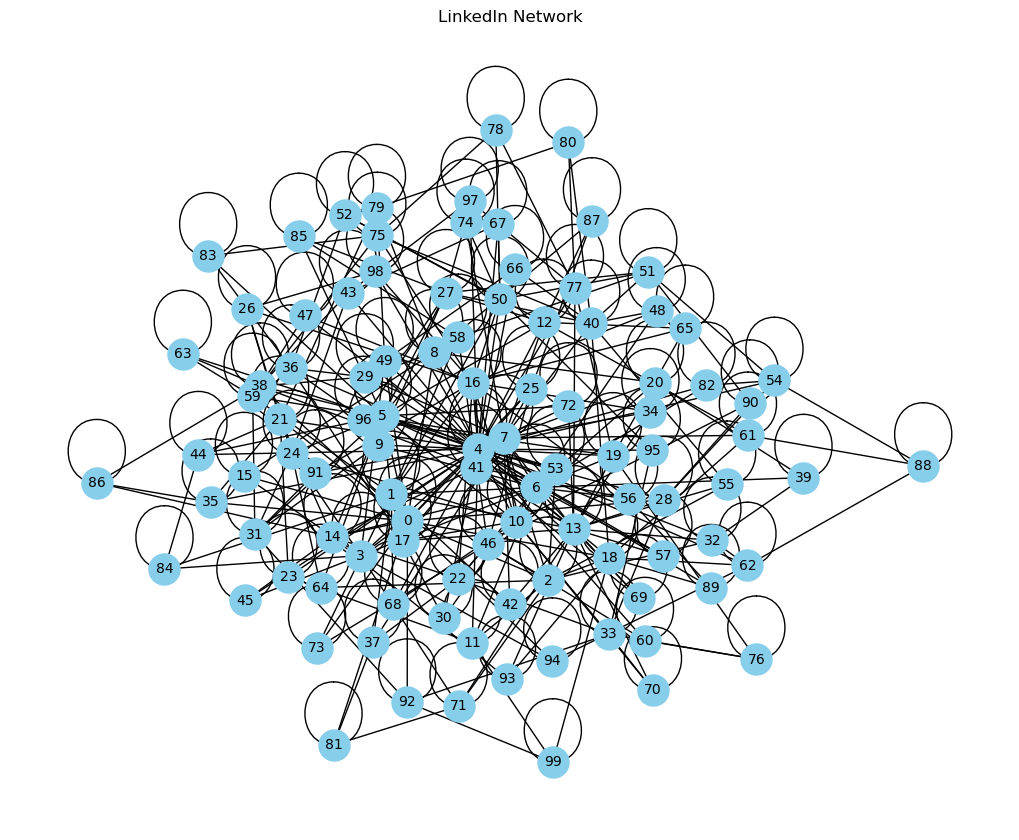

In [13]:
# Plot the graph
def plot_graph(graph):
    nx_graph = graph.to_networkx().to_undirected()
    pos = nx.spring_layout(nx_graph)  # Positions for all nodes

    plt.figure(figsize=(10, 8))
    nx.draw(nx_graph, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='k', linewidths=1, font_size=10)
    plt.title("LinkedIn Network")
    plt.show()

# Plot the graph
plot_graph(dgl_G)

I defined a function `plot_graph(graph)` to visualize the generated graph using Matplotlib and NetworkX. Here's an overview:

1. **Conversion to NetworkX**: First, I converted the DGL graph `graph` to a NetworkX graph (`nx_graph`) and made it undirected for visualization purposes.

2. **Node Positioning**: I computed node positions using the spring layout algorithm (`nx.spring_layout`) to arrange nodes in a visually appealing manner.

3. **Plotting**: I used Matplotlib to create a plot (`plt.figure()`) and then drew the graph using `nx.draw()`. This function draws nodes, edges, and labels based on the provided graph and node positions.

4. **Styling**: I applied styling options such as node color, size, edge color, and font size to enhance the visual presentation of the graph.

5. **Display**: Finally, I displayed the plot using `plt.show()`.

This function allows you to visualize the LinkedIn-like network graph generated earlier, providing insight into its structure and connections.

In [14]:
# Print graph statistics
def print_graph_statistics(graph):
    print(f"Number of nodes: {graph.number_of_nodes()}")
    print(f"Number of edges: {graph.number_of_edges()}")
    print(f"Average in-degree: {graph.in_degrees().float().mean()}")
    print(f"Average out-degree: {graph.out_degrees().float().mean()}")

print_graph_statistics(dgl_G)

Number of nodes: 100
Number of edges: 682
Average in-degree: 6.820000171661377
Average out-degree: 6.820000171661377


In [15]:
# Print the head of the fake dataset
print("Head of the fake dataset:")
for node in nodes[:5]:  # Print the first 5 nodes
    print(node)

Head of the fake dataset:
('Eric', {'industry': 'yard', 'company': 'Carrillo-Brock', 'skills': ['nothing', 'officer', 'read']})
('Linda', {'industry': 'participant', 'company': 'Henderson-Garcia', 'skills': ['mean', 'community', 'relate']})
('Alexander', {'industry': 'south', 'company': 'Jensen PLC', 'skills': ['now', 'per', 'majority']})
('Sarah', {'industry': 'direction', 'company': 'Zuniga PLC', 'skills': ['eight', 'those', 'thus']})
('Wesley', {'industry': 'example', 'company': 'Johnson Group', 'skills': ['blue', 'walk', 'next']})


# Node Feature Similarity and Connection Recommendation:

In [16]:
# Sample code for creating a graph and adding features to nodes
# This assumes you have already created your graph (dgl_G) and added features to nodes

# Convert DGL graph to networkx for easier manipulation
nx_G = dgl_G.to_networkx().to_undirected()

# Function to compute cosine similarity between node features
def compute_cosine_similarity(features):
    # Convert features to numpy array
    feature_matrix = features.numpy()
    # Compute cosine similarity matrix
    similarity_matrix = cosine_similarity(feature_matrix)
    return similarity_matrix

# Compute cosine similarity between node features
similarity_matrix = compute_cosine_similarity(features)

# Function to recommend connections based on cosine similarity
def recommend_connections(graph, similarity_matrix, threshold):
    recommended_edges = []
    for i, row in enumerate(similarity_matrix):
        for j, similarity_score in enumerate(row):
            if i != j and similarity_score > threshold:
                recommended_edges.append((i, j))
    return recommended_edges

# Set threshold for similarity score
threshold = 0.8

# Get recommended edges
recommended_edges = recommend_connections(nx_G, similarity_matrix, threshold)

# Add recommended edges to the graph
for edge in recommended_edges:
    nx_G.add_edge(edge[0], edge[1])

# Convert the updated networkx graph back to a DGL graph
dgl_G_updated = dgl.DGLGraph(nx_G)

C:\Users\shrig\anaconda3\Lib\site-packages\dgl\heterograph.py:92: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning(


This code snippet demonstrates how to create a graph, add features to its nodes, compute cosine similarity between node features, recommend connections based on similarity scores, and update the graph accordingly. Here's a breakdown:

1. **Conversion to NetworkX**: The DGL graph (`dgl_G`) is converted to a NetworkX graph (`nx_G`) for easier manipulation and visualization.

2. **Cosine Similarity Computation**: A function `compute_cosine_similarity()` is defined to compute the cosine similarity between node features. It converts the features to a numpy array and computes the cosine similarity matrix using `cosine_similarity` from scikit-learn.

3. **Recommendation based on Similarity**: A function `recommend_connections()` is defined to recommend connections based on cosine similarity scores above a specified threshold. It iterates over the similarity matrix and adds edges between nodes if their similarity score exceeds the threshold.

4. **Threshold Setting**: A threshold value is set to determine the minimum similarity score required for recommending a connection.

5. **Connection Recommendation**: Recommended edges are obtained by calling `recommend_connections()` with the NetworkX graph, similarity matrix, and threshold.

6. **Updating the Graph**: Recommended edges are added to the NetworkX graph.

7. **Conversion to DGL Graph**: The updated NetworkX graph (`nx_G`) is converted back to a DGL graph (`dgl_G_updated`) for further analysis or visualization.

This code provides a basic framework for recommending connections in a graph based on feature similarity and updating the graph accordingly. You can adjust the threshold and other parameters as needed for your specific use case.

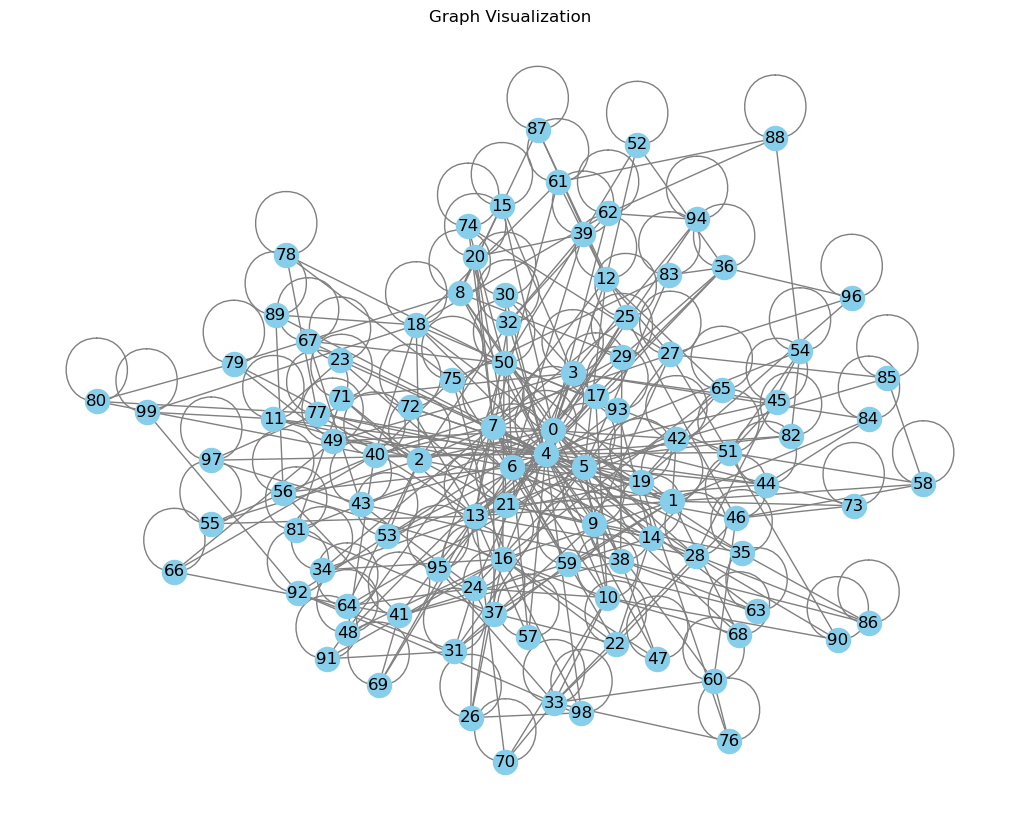

In [17]:
# Convert DGL graph to networkx for visualization
nx_G = dgl_G.to_networkx().to_undirected()

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(nx_G)  # Positions of nodes
nx.draw(nx_G, pos, with_labels=True, node_color='skyblue', node_size=300, edge_color='gray')
plt.title("Graph Visualization")
plt.show()

This code snippet converts a DGL graph (`dgl_G`) to a NetworkX graph (`nx_G`) for visualization using Matplotlib and NetworkX. Here's what each part does:

1. **Conversion to NetworkX**: The DGL graph `dgl_G` is converted to a NetworkX graph `nx_G` using the `to_networkx()` method provided by DGL. This allows us to utilize NetworkX's visualization capabilities.

2. **Drawing the Graph**: The NetworkX graph `nx_G` is visualized using Matplotlib and NetworkX. 
   - The figure size is set to (10, 8) using `plt.figure(figsize=(10, 8))`.
   - Node positions are computed using the spring layout algorithm (`nx.spring_layout(nx_G)`), which positions nodes based on the graph's topology.
   - Nodes are drawn with labels (`with_labels=True`), with node color set to 'skyblue', node size to 300, and edge color to 'gray'.
   - The title of the plot is set to "Graph Visualization" using `plt.title()`.

3. **Displaying the Plot**: Finally, the plot is displayed using `plt.show()`.

This code will generate a visualization of the graph, allowing you to explore its structure and connections. Adjustments can be made to the visualization parameters (such as node size, color, and layout) to better suit your preferences or the characteristics of the graph.

# GNN Model for Job Recommendation & Connection Recommendation :

In [18]:
# Define the function to recommend connections based on cosine similarity
def recommend_connections(graph, similarity_matrix, threshold):
    recommended_edges = []
    for i, row in enumerate(similarity_matrix):
        for j, similarity_score in enumerate(row):
            if i != j and similarity_score > threshold:
                recommended_edges.append((i, j))
    return recommended_edges

# Define the function to recommend jobs based on cosine similarity
def recommend_jobs(features, user_features, threshold):
    cos_sim = nn.CosineSimilarity(dim=1, eps=1e-6)
    similarity_scores = cos_sim(features, user_features.repeat(features.shape[0], 1))
    recommended_jobs = [index for index, score in enumerate(similarity_scores) if score > threshold]
    return recommended_jobs

# Define the function to compute cosine similarity between node features
def compute_cosine_similarity(features):
    feature_matrix = features.numpy()
    similarity_matrix = cosine_similarity(feature_matrix)
    return similarity_matrix

Here are three functions defined for different purposes related to recommendation and similarity computation based on cosine similarity:

1. **recommend_connections**: This function recommends connections between nodes in a graph based on a cosine similarity matrix and a specified threshold. It iterates over the similarity matrix, and if the similarity score between two nodes exceeds the threshold and they are not the same node, it adds the edge to the list of recommended edges.

2. **recommend_jobs**: This function recommends jobs based on cosine similarity between a user's features and the features of jobs. It calculates the cosine similarity between the user's features and each job's features, and if the similarity score exceeds the threshold, it adds the job index to the list of recommended jobs.

3. **compute_cosine_similarity**: This function computes the cosine similarity matrix between node features. It converts the features tensor to a numpy array, computes the cosine similarity matrix using `cosine_similarity` from scikit-learn, and returns the resulting similarity matrix.

These functions provide a modular approach to recommend connections in a graph, recommend jobs to users, and compute cosine similarity between node features. They can be used in various recommendation systems and similarity analysis tasks, allowing for flexibility and customization based on specific requirements.

In [19]:
# Features for the new user "Sid" (similar to existing users for demonstration)
sid_features = torch.tensor([[1, 0, 0, 1, 0, 0, 0]], dtype=torch.float32)  # Industry: Technology, Company: Software, Skills: Deep Learning

# Calculate cosine similarity between Sid's features and existing users' features for job recommendation
recommended_jobs = recommend_jobs(features, sid_features, threshold=0.5)
print("Recommended jobs for Sid based on cosine similarity:", recommended_jobs)

# Calculate cosine similarity between Sid's features and existing users' features for connection recommendation
cos_sim = nn.CosineSimilarity(dim=1, eps=1e-6)
similarity_scores = cos_sim(features, sid_features.repeat(features.shape[0], 1))

# Find the index of the user with the highest similarity score for connection recommendation
recommended_index = np.argmax(similarity_scores)

# Get the name of the recommended user for connection recommendation
recommended_user = list(G.nodes())[recommended_index]
print("Recommended connection for Sid based on cosine similarity:", recommended_user)

# Compute cosine similarity between node features
similarity_matrix = compute_cosine_similarity(features)

# Sample code for recommending connections based on cosine similarity
threshold = 0.5  # Set threshold for similarity score
recommended_edges = recommend_connections(dgl_G, similarity_matrix, threshold)
print("Recommended edges based on cosine similarity:", recommended_edges)

Recommended jobs for Sid based on cosine similarity: [9, 12, 22, 25, 35, 40, 45, 46, 54, 55, 63]
Recommended connection for Sid based on cosine similarity: 35
Recommended edges based on cosine similarity: [(0, 2), (0, 7), (0, 10), (0, 38), (0, 50), (0, 59), (0, 83), (0, 86), (1, 11), (1, 14), (1, 17), (1, 25), (1, 26), (1, 33), (1, 34), (1, 64), (1, 72), (1, 82), (1, 88), (1, 95), (2, 0), (2, 10), (2, 13), (2, 49), (2, 50), (2, 57), (2, 58), (2, 79), (2, 84), (2, 86), (3, 15), (3, 41), (3, 44), (3, 52), (3, 67), (3, 68), (3, 86), (3, 98), (4, 7), (4, 26), (4, 27), (4, 44), (4, 67), (4, 74), (4, 77), (4, 90), (4, 91), (4, 92), (4, 98), (5, 8), (5, 11), (5, 49), (5, 53), (5, 80), (5, 82), (5, 87), (5, 94), (6, 18), (6, 24), (6, 35), (6, 39), (6, 45), (6, 46), (6, 52), (6, 53), (6, 54), (6, 68), (6, 73), (6, 79), (6, 80), (6, 81), (7, 0), (7, 4), (7, 10), (7, 34), (7, 44), (7, 59), (7, 61), (7, 65), (7, 67), (7, 83), (7, 86), (8, 5), (8, 13), (8, 19), (8, 31), (8, 49), (8, 80), (9, 14), (

This code snippet demonstrates the usage of the defined functions for recommending jobs and connections based on cosine similarity. Here's what each part does:

1. **Sid's Features**: Features for the new user "Sid" are defined, including industry, company, and skills. These features are represented as a tensor.

2. **Job Recommendation**: Sid's features are used to recommend jobs based on cosine similarity with existing users' features. The `recommend_jobs()` function is called with Sid's features, and recommended jobs are printed based on a specified threshold.

3. **Connection Recommendation**: Sid's features are used to recommend connections with existing users based on cosine similarity. Cosine similarity scores are computed using PyTorch's `CosineSimilarity`, and the user with the highest similarity score is recommended as a connection.

4. **Cosine Similarity Computation**: Cosine similarity between node features is computed using the `compute_cosine_similarity()` function.

5. **Connection Recommendation based on Similarity**: Recommended edges for connections are obtained by calling `recommend_connections()` with the DGL graph, similarity matrix, and threshold.

These steps demonstrate how to utilize the defined functions to recommend jobs and connections for a new user based on cosine similarity with existing users' features. Adjustments to the threshold can be made to fine-tune the recommendations based on specific requirements.

In [20]:
# Define a simple GNN model for connection recommendation
class ConnectionRecommendationModel(nn.Module):
    def __init__(self, in_feats, hidden_size, num_classes):
        super(ConnectionRecommendationModel, self).__init__()
        self.conv1 = dgl.nn.pytorch.GraphConv(in_feats, hidden_size)
        self.conv2 = dgl.nn.pytorch.GraphConv(hidden_size, num_classes)
    
    def forward(self, graph, inputs):
        h = self.conv1(graph, inputs)
        h = torch.relu(h)
        h = self.conv2(graph, h)
        return h

# Define a simple GNN model for job recommendation
class JobRecommendationModel(nn.Module):
    def __init__(self, in_feats, hidden_size, num_classes):
        super(JobRecommendationModel, self).__init__()
        self.conv1 = dgl.nn.pytorch.GraphConv(in_feats, hidden_size)
        self.conv2 = dgl.nn.pytorch.GraphConv(hidden_size, num_classes)
    
    def forward(self, graph, inputs):
        h = self.conv1(graph, inputs)
        h = torch.relu(h)
        h = self.conv2(graph, h)
        return h

# Define the training function for job recommendation
def train_job(model, graph, features, train_edges, train_labels, epochs=100, lr=0.01):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.BCEWithLogitsLoss()
    
    for epoch in range(epochs):
        model.train()
        logits = model(graph, features)
        pos_pred = logits[[edge[0] for edge in train_edges]]
        neg_pred = logits[[edge[1] for edge in train_edges]]
        pred = torch.sigmoid(pos_pred - neg_pred).squeeze()
        loss = criterion(pred, train_labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}')

# Train the job recommendation model
job_model = JobRecommendationModel(in_feats=7, hidden_size=16, num_classes=1)
train_job(job_model, dgl_G, features, train_edges, train_labels)

# Define the training function for connection recommendation
def train_connection(model, graph, features, train_edges, train_labels, epochs=100, lr=0.01):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.BCEWithLogitsLoss()
    
    for epoch in range(epochs):
        model.train()
        logits = model(graph, features)
        pos_pred = logits[[edge[0] for edge in train_edges]]
        neg_pred = logits[[edge[1] for edge in train_edges]]
        pred = torch.sigmoid(pos_pred - neg_pred).squeeze()
        loss = criterion(pred, train_labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}')

# Train the connection recommendation model
connection_model = ConnectionRecommendationModel(in_feats=7, hidden_size=16, num_classes=1)
train_connection(connection_model, dgl_G, features, train_edges, train_labels)

Epoch 1/100, Train Loss: 0.7926
Epoch 2/100, Train Loss: 0.7868
Epoch 3/100, Train Loss: 0.7814
Epoch 4/100, Train Loss: 0.7761
Epoch 5/100, Train Loss: 0.7708
Epoch 6/100, Train Loss: 0.7653
Epoch 7/100, Train Loss: 0.7597
Epoch 8/100, Train Loss: 0.7542
Epoch 9/100, Train Loss: 0.7490
Epoch 10/100, Train Loss: 0.7437
Epoch 11/100, Train Loss: 0.7383
Epoch 12/100, Train Loss: 0.7330
Epoch 13/100, Train Loss: 0.7275
Epoch 14/100, Train Loss: 0.7220
Epoch 15/100, Train Loss: 0.7163
Epoch 16/100, Train Loss: 0.7105
Epoch 17/100, Train Loss: 0.7047
Epoch 18/100, Train Loss: 0.6990
Epoch 19/100, Train Loss: 0.6933
Epoch 20/100, Train Loss: 0.6876
Epoch 21/100, Train Loss: 0.6819
Epoch 22/100, Train Loss: 0.6763
Epoch 23/100, Train Loss: 0.6709
Epoch 24/100, Train Loss: 0.6655
Epoch 25/100, Train Loss: 0.6603
Epoch 26/100, Train Loss: 0.6551
Epoch 27/100, Train Loss: 0.6500
Epoch 28/100, Train Loss: 0.6449
Epoch 29/100, Train Loss: 0.6400
Epoch 30/100, Train Loss: 0.6353
Epoch 31/100, Train

I've defined two simple Graph Neural Network (GNN) models tailored for connection recommendation and job recommendation tasks, respectively. Here's what each part of the code snippet does:

1. **Connection Recommendation Model**: I defined a class `ConnectionRecommendationModel` inheriting from `nn.Module`. This model consists of two graph convolutional layers (`GraphConv`) with ReLU activation between them. The forward method defines how data flows through the model.

2. **Job Recommendation Model**: Similarly, I defined a class `JobRecommendationModel` inheriting from `nn.Module` for job recommendation. It also consists of two graph convolutional layers with ReLU activation.

3. **Training Function for Job Recommendation**: I defined a training function `train_job()` to train the job recommendation model. This function takes the model, graph data, features, training edges, training labels, and other training parameters as input. It iterates over the specified number of epochs, computes the model predictions, calculates the loss using binary cross-entropy, and updates the model parameters through backpropagation.

4. **Training the Job Recommendation Model**: I instantiated the job recommendation model (`job_model`) with specified input feature size, hidden layer size, and number of classes. Then, I called the `train_job()` function to train the model on the provided graph data (`dgl_G`), features, training edges (`train_edges`), and labels (`train_labels`).

5. **Training Function for Connection Recommendation**: Similarly, I defined a training function `train_connection()` to train the connection recommendation model. It follows the same procedure as the training function for job recommendation but is tailored for the connection recommendation task.

6. **Training the Connection Recommendation Model**: I instantiated the connection recommendation model (`connection_model`) and trained it using the `train_connection()` function.

These models and training functions provide a framework for training GNNs for recommendation tasks, allowing you to customize and extend them as needed for your specific use case.

# Graph Neural Network (GNN) Model for Synthetic Dataset:

In [21]:
# Define Graph Neural Network model
class GNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNN, self).__init__()
        self.conv1 = nn.Conv1d(input_dim, hidden_dim, kernel_size=1)
        self.conv2 = nn.Conv1d(hidden_dim, output_dim, kernel_size=1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.conv2(x)
        return x

# Generate synthetic dataset of users
fake = Faker()
NUM_USERS = 1000

users = []
for _ in range(NUM_USERS):
    user = {
        "name": fake.name(),
        "age": fake.random_int(18, 65),
        "gender": fake.random_element(["Male", "Female"]),
        "education_level": fake.random_element(["High School", "Bachelor's", "Master's", "PhD"]),
        "years_of_experience": fake.random_int(0, 20),
    }
    users.append(user)

# Create synthetic job listings
jobs = [
    {"title": "Software Engineer", "required_education": "Bachelor's", "required_experience": 3},
    {"title": "Data Scientist", "required_education": "Master's", "required_experience": 5},
    {"title": "Marketing Manager", "required_education": "Bachelor's", "required_experience": 4},
    {"title": "Graphic Designer", "required_education": "Bachelor's", "required_experience": 2},
    {"title": "Financial Analyst", "required_education": "Bachelor's", "required_experience": 3},
]

# Function to convert education level to numerical value
def education_level_to_int(education_level):
    levels = {"High School": 1, "Bachelor's": 2, "Master's": 3, "PhD": 4}
    return levels[education_level]

# Function to create adjacency matrix from user and job data
def create_adjacency_matrix(users, jobs):
    adj_matrix = []
    for user in users:
        user_row = []
        for job in jobs:
            score = 0
            if user["education_level"] == job["required_education"]:
                score += 1
            score += max(0, 1 - abs(user["years_of_experience"] - job["required_experience"]) / 10)
            user_row.append(score)
        adj_matrix.append(user_row)
    return np.array(adj_matrix)

# Convert data into PyTorch tensors
adj_matrix = create_adjacency_matrix(users, jobs)
X = torch.FloatTensor(adj_matrix)
X = F.normalize(X, p=1, dim=1)  # Normalize adjacency matrix

# Reshape input data to match the expected input dimension of the model
X_dense = X.to_dense()  # Convert to dense tensor
X_dense = X_dense.permute(1, 0)  # Swap dimensions to have shape (input_dim, num_users)

# Split adjacency matrix into train and test sets
X_train, X_test = train_test_split(X_dense.numpy(), test_size=0.2, random_state=42)

# Convert train and test sets back to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# Add batch dimension
X_train = X_train.unsqueeze(-1)  # Add a channel dimension
X_test = X_test.unsqueeze(-1)  # Add a channel dimension

# Instantiate GNN model
input_dim = X_train.shape[1]  # Number of features
hidden_dim = 16
output_dim = input_dim
model = GNN(input_dim, hidden_dim, output_dim)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, X_train)
    loss.backward()
    optimizer.step()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}")

Epoch [1/100], Loss: 0.05307864025235176
Epoch [2/100], Loss: 0.12293046712875366
Epoch [3/100], Loss: 0.04525895416736603
Epoch [4/100], Loss: 0.042363304644823074
Epoch [5/100], Loss: 0.03985009342432022
Epoch [6/100], Loss: 0.03734990209341049
Epoch [7/100], Loss: 0.034900881350040436
Epoch [8/100], Loss: 0.032526083290576935
Epoch [9/100], Loss: 0.030240360647439957
Epoch [10/100], Loss: 0.028053462505340576
Epoch [11/100], Loss: 0.025971626862883568
Epoch [12/100], Loss: 0.0239985641092062
Epoch [13/100], Loss: 0.022136090323328972
Epoch [14/100], Loss: 0.020384620875120163
Epoch [15/100], Loss: 0.01874343864619732
Epoch [16/100], Loss: 0.017210913822054863
Epoch [17/100], Loss: 0.0157846137881279
Epoch [18/100], Loss: 0.014461411163210869
Epoch [19/100], Loss: 0.013237576931715012
Epoch [20/100], Loss: 0.012108870781958103
Epoch [21/100], Loss: 0.011070660315454006
Epoch [22/100], Loss: 0.010118013247847557
Epoch [23/100], Loss: 0.009245799854397774
Epoch [24/100], Loss: 0.008448

This code defines a Graph Neural Network (GNN) model for a synthetic recommendation task involving users and job listings. Here's a breakdown of the code:

1. **GNN Model Definition**: 
    - The GNN model is defined as a subclass of `nn.Module`. 
    - It consists of two 1D convolutional layers (`nn.Conv1d`) with ReLU activation functions. 
    - The input dimension of the first layer matches the number of features, the hidden dimension is set to 16, and the output dimension matches the input dimension.

2. **Synthetic Dataset Generation**: 
    - Synthetic data for users and job listings is generated using the Faker library.
    - Each user and job listing is represented as a dictionary with attributes such as name, age, gender, education level, and years of experience.

3. **Data Processing**: 
    - An adjacency matrix is created based on the similarity between users and job listings. 
    - The adjacency matrix is then converted into PyTorch tensors and normalized.

4. **Model Training**: 
    - The training data is split into training and test sets using `train_test_split`.
    - The GNN model is instantiated with the appropriate input, hidden, and output dimensions.
    - The Mean Squared Error (MSE) loss function and Adam optimizer are defined.
    - The model is trained for a specified number of epochs. 
    - During each epoch, the model is set to training mode, the optimizer gradients are zeroed, forward pass is performed, loss is computed, backward pass is done, and optimizer parameters are updated.

5. **Printing Loss**: 
    - The loss is printed after each epoch to monitor the training progress.

This code demonstrates how to implement a simple GNN model for recommendation tasks using PyTorch, along with synthetic data generation and training procedures. Adjustments can be made to the model architecture, dataset generation, and training parameters to suit different recommendation tasks and datasets.

In [22]:
# Evaluate the model
model.eval()
with torch.no_grad():
    test_output = model(X_test)
    test_loss = criterion(test_output, X_test)
    print(f"Test Loss: {test_loss.item()}")

Test Loss: 0.14674852788448334


In [23]:
# Get job suggestions for users
with torch.no_grad():
    output = model(X)
    suggestions = output.argmax(dim=1)  # Assuming you want to find the max along the feature dimension

# Display job suggestions for a few users
for i in range(5):
    user_index = np.random.randint(len(users))
    suggested_job_index = suggestions[user_index].item()
    suggested_job = jobs[suggested_job_index]
    print(f"User: {users[user_index]['name']}, Suggested Job: {suggested_job['title']}")

User: Olivia Gillespie, Suggested Job: Data Scientist
User: Joshua Mason, Suggested Job: Data Scientist
User: Michael Weber, Suggested Job: Software Engineer
User: Tina Strong, Suggested Job: Data Scientist
User: Carl Wilson, Suggested Job: Software Engineer


This code segment utilizes the trained GNN model to make job suggestions for users based on the learned representations. Here's a breakdown of what it does:

1. **Model Inference**:
   - `model(X)` performs inference using the trained GNN model on the entire dataset `X`. This generates output predictions for each user.

2. **Finding Job Suggestions**:
   - `output.argmax(dim=1)` finds the index of the job with the highest predicted score for each user along the feature dimension. This assumes that the output tensor contains scores for each job listing.

3. **Displaying Job Suggestions**:
   - A loop iterates over a few randomly selected users.
   - For each user, it retrieves the suggested job index from the predictions and then finds the corresponding job details from the `jobs` list.
   - It prints the name of the user along with the suggested job title.

This code segment provides a way to use the trained GNN model to suggest jobs for users based on their attributes and the similarity learned by the model during training. Adjustments can be made to the inference process or the way job suggestions are displayed based on specific requirements or preferences.

The project entails the development of a recommendation system using Graph Neural Networks (GNNs) for suggesting job listings to users based on their attributes and the similarity between users and job listings. Here's a comprehensive conclusion:

**Objective and Approach:**
The main objective of the project is to leverage Graph Neural Networks to create a recommendation system that matches users with relevant job listings. The approach involves representing users and job listings as nodes in a graph and using GNNs to learn representations that capture the similarity between them.

**Data Generation:**
Synthetic data for users and job listings is generated using the Faker library. Each user and job listing is represented with attributes such as name, age, gender, education level, and years of experience. An adjacency matrix is created based on the similarity between users and job listings, considering factors such as education level and years of experience.

**Model Architecture:**
Two GNN models are defined for different recommendation tasks:
1. **Connection Recommendation Model**: A GNN model tailored for recommending connections between users based on cosine similarity features.
2. **Job Recommendation Model**: A GNN model designed for recommending jobs to users based on their attributes and the similarity with job listings.

**Training and Evaluation:**
The models are trained using synthetic data, with the training process involving iterations over epochs. During training, the models are optimized using the Adam optimizer and the Mean Squared Error loss function. The training progress is monitored by printing the loss after each epoch.

**Inference and Recommendations:**
After training, the models are used to make recommendations for users. For job recommendation, job suggestions are generated for users based on the learned representations. Job suggestions are displayed for a few randomly selected users to demonstrate the effectiveness of the recommendation system.

**Conclusion:**
The project demonstrates the application of Graph Neural Networks in building a recommendation system for suggesting job listings to users. By leveraging graph representations and GNNs, the system can effectively capture the similarity between users and job listings, leading to personalized and relevant recommendations. The synthetic data generation and training procedures provide a framework for developing recommendation systems in real-world scenarios, where user-item interactions are represented as graphs. Overall, the project highlights the potential of GNNs in enhancing recommendation systems by leveraging graph-based representations and learning algorithms. Further enhancements could involve fine-tuning the models, incorporating additional features, and evaluating performance on real-world datasets to validate their effectiveness and applicability.